<a href="https://colab.research.google.com/github/aniket20june/Big-Data-Project/blob/main/IBRD_Loan_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
bd = pd.read_csv('drive/My Drive/abc.csv', delimiter=',',na_values=['?','??'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969426 entries, 0 to 969425
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   End of Period                 969426 non-null  object 
 1   Loan Number                   969426 non-null  object 
 2   Region                        969426 non-null  object 
 3   Country Code                  969196 non-null  object 
 4   Country                       969426 non-null  object 
 5   Borrower                      962812 non-null  object 
 6   Guarantor Country Code        932459 non-null  object 
 7   Guarantor                     905043 non-null  object 
 8   Loan Type                     969426 non-null  object 
 9   Loan Status                   969426 non-null  object 
 10  Interest Rate                 940839 non-null  float64
 11  Currency of Commitment        0 non-null       float64
 12  Project ID                    931891 non-nul

In [ ]:
bd.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Currency of Commitment,Project ID,Project Name,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,06/30/2020 12:00:00 AM,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NPL,Fully Repaid,4.25,NaN,P037383,RECONSTRUCTION,2.500000e+08,0.00,0.0,2.500000e+08,3.800000e+04,0.0,0.00,0.00,2.499620e+08,2.499620e+08,0,0.0,11/01/1952 12:00:00 AM,05/01/1977 12:00:00 AM,05/09/1947 12:00:00 AM,05/09/1947 12:00:00 AM,06/09/1947 12:00:00 AM,12/31/1947 12:00:00 AM,NaN
1,06/30/2020 12:00:00 AM,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037452,RECONSTRUCTION,1.910442e+08,0.00,0.0,1.910442e+08,1.033722e+08,0.0,-0.01,-0.01,8.767200e+07,8.767200e+07,0,0.0,04/01/1952 12:00:00 AM,10/01/1972 12:00:00 AM,08/07/1947 12:00:00 AM,08/07/1947 12:00:00 AM,09/11/1947 12:00:00 AM,03/31/1948 12:00:00 AM,NaN
2,06/30/2020 12:00:00 AM,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037452,RECONSTRUCTION,3.955788e+06,0.00,0.0,3.955788e+06,0.000000e+00,0.0,0.00,0.00,3.955788e+06,3.955788e+06,0,0.0,04/01/1953 12:00:00 AM,04/01/1954 12:00:00 AM,05/25/1948 12:00:00 AM,08/07/1947 12:00:00 AM,06/01/1948 12:00:00 AM,06/30/1948 12:00:00 AM,NaN
3,06/30/2020 12:00:00 AM,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037362,RECONSTRUCTION,4.000000e+07,0.00,0.0,4.000000e+07,1.777100e+07,0.0,0.00,0.00,2.222900e+07,2.222900e+07,0,0.0,02/01/1953 12:00:00 AM,08/01/1972 12:00:00 AM,08/22/1947 12:00:00 AM,08/22/1947 12:00:00 AM,10/17/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN
4,06/30/2020 12:00:00 AM,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037451,RECONSTRUCTION,1.200000e+07,238016.98,0.0,1.176198e+07,1.619983e+06,0.0,-0.01,-0.01,1.014200e+07,1.014200e+07,0,0.0,07/15/1949 12:00:00 AM,07/15/1972 12:00:00 AM,08/28/1947 12:00:00 AM,08/28/1947 12:00:00 AM,10/24/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN


In [ ]:
a=bd.loc[bd['Loan Status']=='Cancelled']

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19832 entries, 10097 to 602810
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   End of Period                 19832 non-null  object 
 1   Loan Number                   19832 non-null  object 
 2   Region                        19832 non-null  object 
 3   Country Code                  19832 non-null  object 
 4   Country                       19832 non-null  object 
 5   Borrower                      19634 non-null  object 
 6   Guarantor Country Code        18049 non-null  object 
 7   Guarantor                     17399 non-null  object 
 8   Loan Type                     19832 non-null  object 
 9   Loan Status                   19832 non-null  object 
 10  Interest Rate                 19172 non-null  float64
 11  Currency of Commitment        0 non-null      float64
 12  Project ID                    12658 non-null  object 
 

In [ ]:
bd['Loan Status'].value_counts()

Repaid                 384204
Fully Repaid           308667
Disbursed               83405
Disbursing              61115
Repaying                49344
Cancelled               19832
Fully Cancelled         15685
Fully Disbursed         13625
Fully Transferred       10500
Disbursing&Repaying      6400
Terminated               5098
Approved                 4728
Effective                3647
Signed                   3174
Negotiated                  1
Draft                       1
Name: Loan Status, dtype: int64

In [ ]:
bd['Interest Rate'].isnull().sum()

28587

In [ ]:
bd['Region'].value_counts()

LATIN AMERICA AND CARIBBEAN     214101
EAST ASIA AND PACIFIC           149682
EUROPE AND CENTRAL ASIA         128267
Latin America and Caribbean      84679
MIDDLE EAST AND NORTH AFRICA     79643
East Asia and Pacific            59240
AFRICA                           58549
Europe and Central Asia          50380
SOUTH ASIA                       36236
Middle East and North Africa     31362
OTHER                            26735
Africa                           23811
South Asia                       13673
Other                            10758
AFRICA WEST                       1179
AFRICA EAST                       1131
Name: Region, dtype: int64

In [ ]:
bd['Region'].replace('AFRICA','Africa',inplace=True)
bd['Region'].replace('LATIN AMERICA AND CARIBBEAN','Latin America and Caribbean',inplace=True)
bd['Region'].replace('SOUTH ASIA','South Asia',inplace=True)
bd['Region'].replace('EAST ASIA AND PACIFIC','East Asia and Pacific',inplace=True)
bd['Region'].replace('EUROPE AND CENTRAL ASIA','Europe and Central Asia',inplace=True)
bd['Region'].replace('MIDDLE EAST AND NORTH AFRICA','Middle East and North Africa',inplace=True)
bd['Region'].replace('OTHER','Other',inplace=True)
bd['Region'].replace('AFRICA EAST','Africa East',inplace=True)
bd['Region'].replace('AFRICA WEST','Africa West',inplace=True)

In [ ]:
bd['Region'].value_counts()

Latin America and Caribbean     298780
East Asia and Pacific           208922
Europe and Central Asia         178647
Middle East and North Africa    111005
Africa                           82360
South Asia                       49909
Other                            37493
Africa West                       1179
Africa East                       1131
Name: Region, dtype: int64

In [ ]:
bd['Country'].value_counts()

Indonesia                                 69595
Brazil                                    51184
China                                     48386
Mexico                                    42082
World                                     37493
India                                     35073
Turkey                                    34229
Morocco                                   32113
Philippines                               30458
Colombia                                  29735
Argentina                                 27914
Tunisia                                   25398
Peru                                      19604
Thailand                                  15163
Algeria                                   14801
Korea, Republic of                        14718
Malaysia                                  14716
Ecuador                                   14502
Pakistan                                  13023
Chile                                     12555
Egypt, Arab Republic of                 

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
bd['Country'].isnull().sum()

0

In [ ]:
bd['Country'].value_counts()

Indonesia                                 69595
Brazil                                    51184
China                                     48386
Mexico                                    42082
World                                     37493
India                                     35073
Turkey                                    34229
Morocco                                   32113
Philippines                               30458
Colombia                                  29735
Argentina                                 27914
Tunisia                                   25398
Peru                                      19604
Thailand                                  15163
Algeria                                   14801
Korea, Republic of                        14718
Malaysia                                  14716
Ecuador                                   14502
Pakistan                                  13023
Chile                                     12555
Egypt, Arab Republic of                 

In [ ]:
bd['End of Period'].isnull().sum()

0

In [ ]:
bd['Loan Number'].isnull().sum()

0

In [ ]:
bd['Country Code'].isnull().sum()

230

In [ ]:
bd['Borrower'].isnull().sum()

6614

In [ ]:
bd["Borrower"].fillna(value=str(bd['Country']), inplace = True)

In [ ]:
bd['Borrower'].isnull().sum()

0

In [ ]:
bd['Guarantor'].isnull().sum()

64383

In [ ]:
bd["Guarantor"].fillna(value=str(bd['Country']), inplace = True)

In [ ]:
bd['Guarantor'].isnull().sum()

0

In [ ]:
bd['Loan Type'].isnull().sum()

0

In [ ]:
bd['Loan Type'].value_counts()

POOL LOAN     217509
NON POOL      187190
FSL           173155
SNGL CRNCY    115542
SCP USD        64059
CPL            53935
NPL            46299
IFC LOAN       29995
SCL            28865
SCP EUR        15959
SCPD           15893
IFCT            6831
BLOAN           4586
SCPM            3956
GURB            2879
SCP JPY         1206
IFCM             667
BLNR             414
SCPY             299
GUBF              87
Guarantee         54
BLNC              46
Name: Loan Type, dtype: int64

In [ ]:
bd['Loan Status'].isnull().sum()

0

In [ ]:
bd['Loan Status'].value_counts()

Repaid                 384204
Fully Repaid           308667
Disbursed               83405
Disbursing              61115
Repaying                49344
Cancelled               19832
Fully Cancelled         15685
Fully Disbursed         13625
Fully Transferred       10500
Disbursing&Repaying      6400
Terminated               5098
Approved                 4728
Effective                3647
Signed                   3174
Negotiated                  1
Draft                       1
Name: Loan Status, dtype: int64

In [ ]:
bd['Interest Rate'].isnull().sum()

28587

In [ ]:
((bd.loc[bd['Loan Status']=='Cancelled']).loc[(bd.loc[bd['Loan Status']=='Cancelled'])['Interest Rate']==0]).shape

(4518, 33)

In [ ]:
bd['Interest Rate'].fillna(value=0,inplace=True)

In [ ]:
bd['Interest Rate'].isnull().sum()

0

In [ ]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969426 entries, 0 to 969425
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   End of Period                 969426 non-null  object 
 1   Loan Number                   969426 non-null  object 
 2   Region                        969426 non-null  object 
 3   Country Code                  969196 non-null  object 
 4   Country                       969426 non-null  object 
 5   Borrower                      969426 non-null  object 
 6   Guarantor Country Code        932459 non-null  object 
 7   Guarantor                     969426 non-null  object 
 8   Loan Type                     969426 non-null  object 
 9   Loan Status                   969426 non-null  object 
 10  Interest Rate                 969426 non-null  float64
 11  Currency of Commitment        0 non-null       float64
 12  Project ID                    931891 non-nul

In [ ]:
bd.loc[bd['Original Principal Amount']==0].shape

(32365, 33)

In [ ]:
(bd.loc[bd['Last Disbursement Date'].isnull()==True]).loc[bd['Last Repayment Date'].isnull()==True].shape

(4745, 33)

In [ ]:
bd['Last Repayment Date'].isnull().sum()

4745

In [ ]:
(bd['Last Disbursement Date'][945333])

'03/10/1988 12:00:00 AM'

In [ ]:
bd.columns

Index(['End of Period', 'Loan Number', 'Region', 'Country Code', 'Country',
       'Borrower', 'Guarantor Country Code', 'Guarantor', 'Loan Type',
       'Loan Status', 'Interest Rate', 'Currency of Commitment', 'Project ID',
       'Project Name ', 'Original Principal Amount', 'Cancelled Amount',
       'Undisbursed Amount', 'Disbursed Amount', 'Repaid to IBRD',
       'Due to IBRD', 'Exchange Adjustment', 'Borrower's Obligation',
       'Sold 3rd Party', 'Repaid 3rd Party', 'Due 3rd Party', 'Loans Held',
       'First Repayment Date', 'Last Repayment Date', 'Agreement Signing Date',
       'Board Approval Date', 'Effective Date (Most Recent)',
       'Closed Date (Most Recent)', 'Last Disbursement Date'],
      dtype='object')

In [ ]:
bd=bd.drop(columns=['End of Period','Loan Number','Country Code','Guarantor Country Code','Currency of Commitment','Project ID','Project Name ','First Repayment Date','Agreement Signing Date','Board Approval Date', 'Effective Date (Most Recent)','Closed Date (Most Recent)'],axis=1)

In [ ]:
bd.columns

Index(['Region', 'Country', 'Borrower', 'Guarantor', 'Loan Type',
       'Loan Status', 'Interest Rate', 'Original Principal Amount',
       'Cancelled Amount', 'Undisbursed Amount', 'Disbursed Amount',
       'Repaid to IBRD', 'Due to IBRD', 'Exchange Adjustment',
       'Borrower's Obligation', 'Sold 3rd Party', 'Repaid 3rd Party',
       'Due 3rd Party', 'Loans Held', 'Last Repayment Date',
       'Last Disbursement Date'],
      dtype='object')

In [ ]:
bd['Last Disbursement Date'].fillna(value='00/00/0000',inplace=True)
bd['Last Repayment Date'].fillna(value='00/00/0000',inplace=True)

In [ ]:
(bd['Last Disbursement Date'][969424])[0:10]

'10/11/1983'

In [ ]:
bd['Ld']=0

In [ ]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969426 entries, 0 to 969425
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Region                     969426 non-null  object 
 1   Country                    969426 non-null  object 
 2   Borrower                   969426 non-null  object 
 3   Guarantor                  969426 non-null  object 
 4   Loan Type                  969426 non-null  object 
 5   Loan Status                969426 non-null  object 
 6   Interest Rate              969426 non-null  float64
 7   Original Principal Amount  969426 non-null  float64
 8   Cancelled Amount           969426 non-null  float64
 9   Undisbursed Amount         969426 non-null  float64
 10  Disbursed Amount           969426 non-null  float64
 11  Repaid to IBRD             969426 non-null  float64
 12  Due to IBRD                969426 non-null  float64
 13  Exchange Adjustment        96

In [ ]:
def func(row):
  a=row['Last Disbursement Date']
  d=int(a[6:10])*365
  d+=int(a[3:5])*30
  d+=int(a[0:2])
  return(d)

In [ ]:
bd['Ld'] = bd.apply (lambda row: func(row), axis=1)

In [ ]:
def func1(row):
  a=row['Last Repayment Date']
  d=int(a[6:10])*365
  d+=int(a[3:5])*30
  d+=int(a[0:2])
  return(d)

In [ ]:
bd['Rd'] = bd.apply (lambda row: func1(row), axis=1)

In [ ]:
bd['Diffday']=bd['Rd']-bd['Ld']

In [ ]:
bd=bd.drop(columns=['Last Repayment Date','Last Disbursement Date','Ld','Rd'],axis=1)

In [ ]:
def func2(row):
  a=row['Diffday']
  if(a<0):
    return(0)
  else:
    return(a)

In [ ]:
bd['Diffday']=bd.apply(lambda row: func2(row),axis=1)

In [ ]:
bd.head()

,Region,Country,Borrower,Guarantor,Loan Type,Loan Status,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,Diffday
0,Europe and Central Asia,France,CREDIT NATIONAL,France,NPL,Fully Repaid,4.25,2.500000e+08,0.00,0.0,2.500000e+08,3.800000e+04,0.0,0.00,0.00,2.499620e+08,2.499620e+08,0,0.0,721640
1,Europe and Central Asia,Netherlands,0 Fran...,0 Fran...,NPL,Fully Repaid,4.25,1.910442e+08,0.00,0.0,1.910442e+08,1.033722e+08,0.0,-0.01,-0.01,8.767200e+07,8.767200e+07,0,0.0,719820
2,Europe and Central Asia,Netherlands,0 Fran...,0 Fran...,NPL,Fully Repaid,4.25,3.955788e+06,0.00,0.0,3.955788e+06,0.000000e+00,0.0,0.00,0.00,3.955788e+06,3.955788e+06,0,0.0,713244
3,Europe and Central Asia,Denmark,0 Fran...,0 Fran...,NPL,Fully Repaid,4.25,4.000000e+07,0.00,0.0,4.000000e+07,1.777100e+07,0.0,0.00,0.00,2.222900e+07,2.222900e+07,0,0.0,719818
4,Europe and Central Asia,Luxembourg,0 Fran...,0 Fran...,NPL,Fully Repaid,4.25,1.200000e+07,238016.98,0.0,1.176198e+07,1.619983e+06,0.0,-0.01,-0.01,1.014200e+07,1.014200e+07,0,0.0,720237


In [ ]:
sns.set(rc={'figure.figsize':(20,50)})

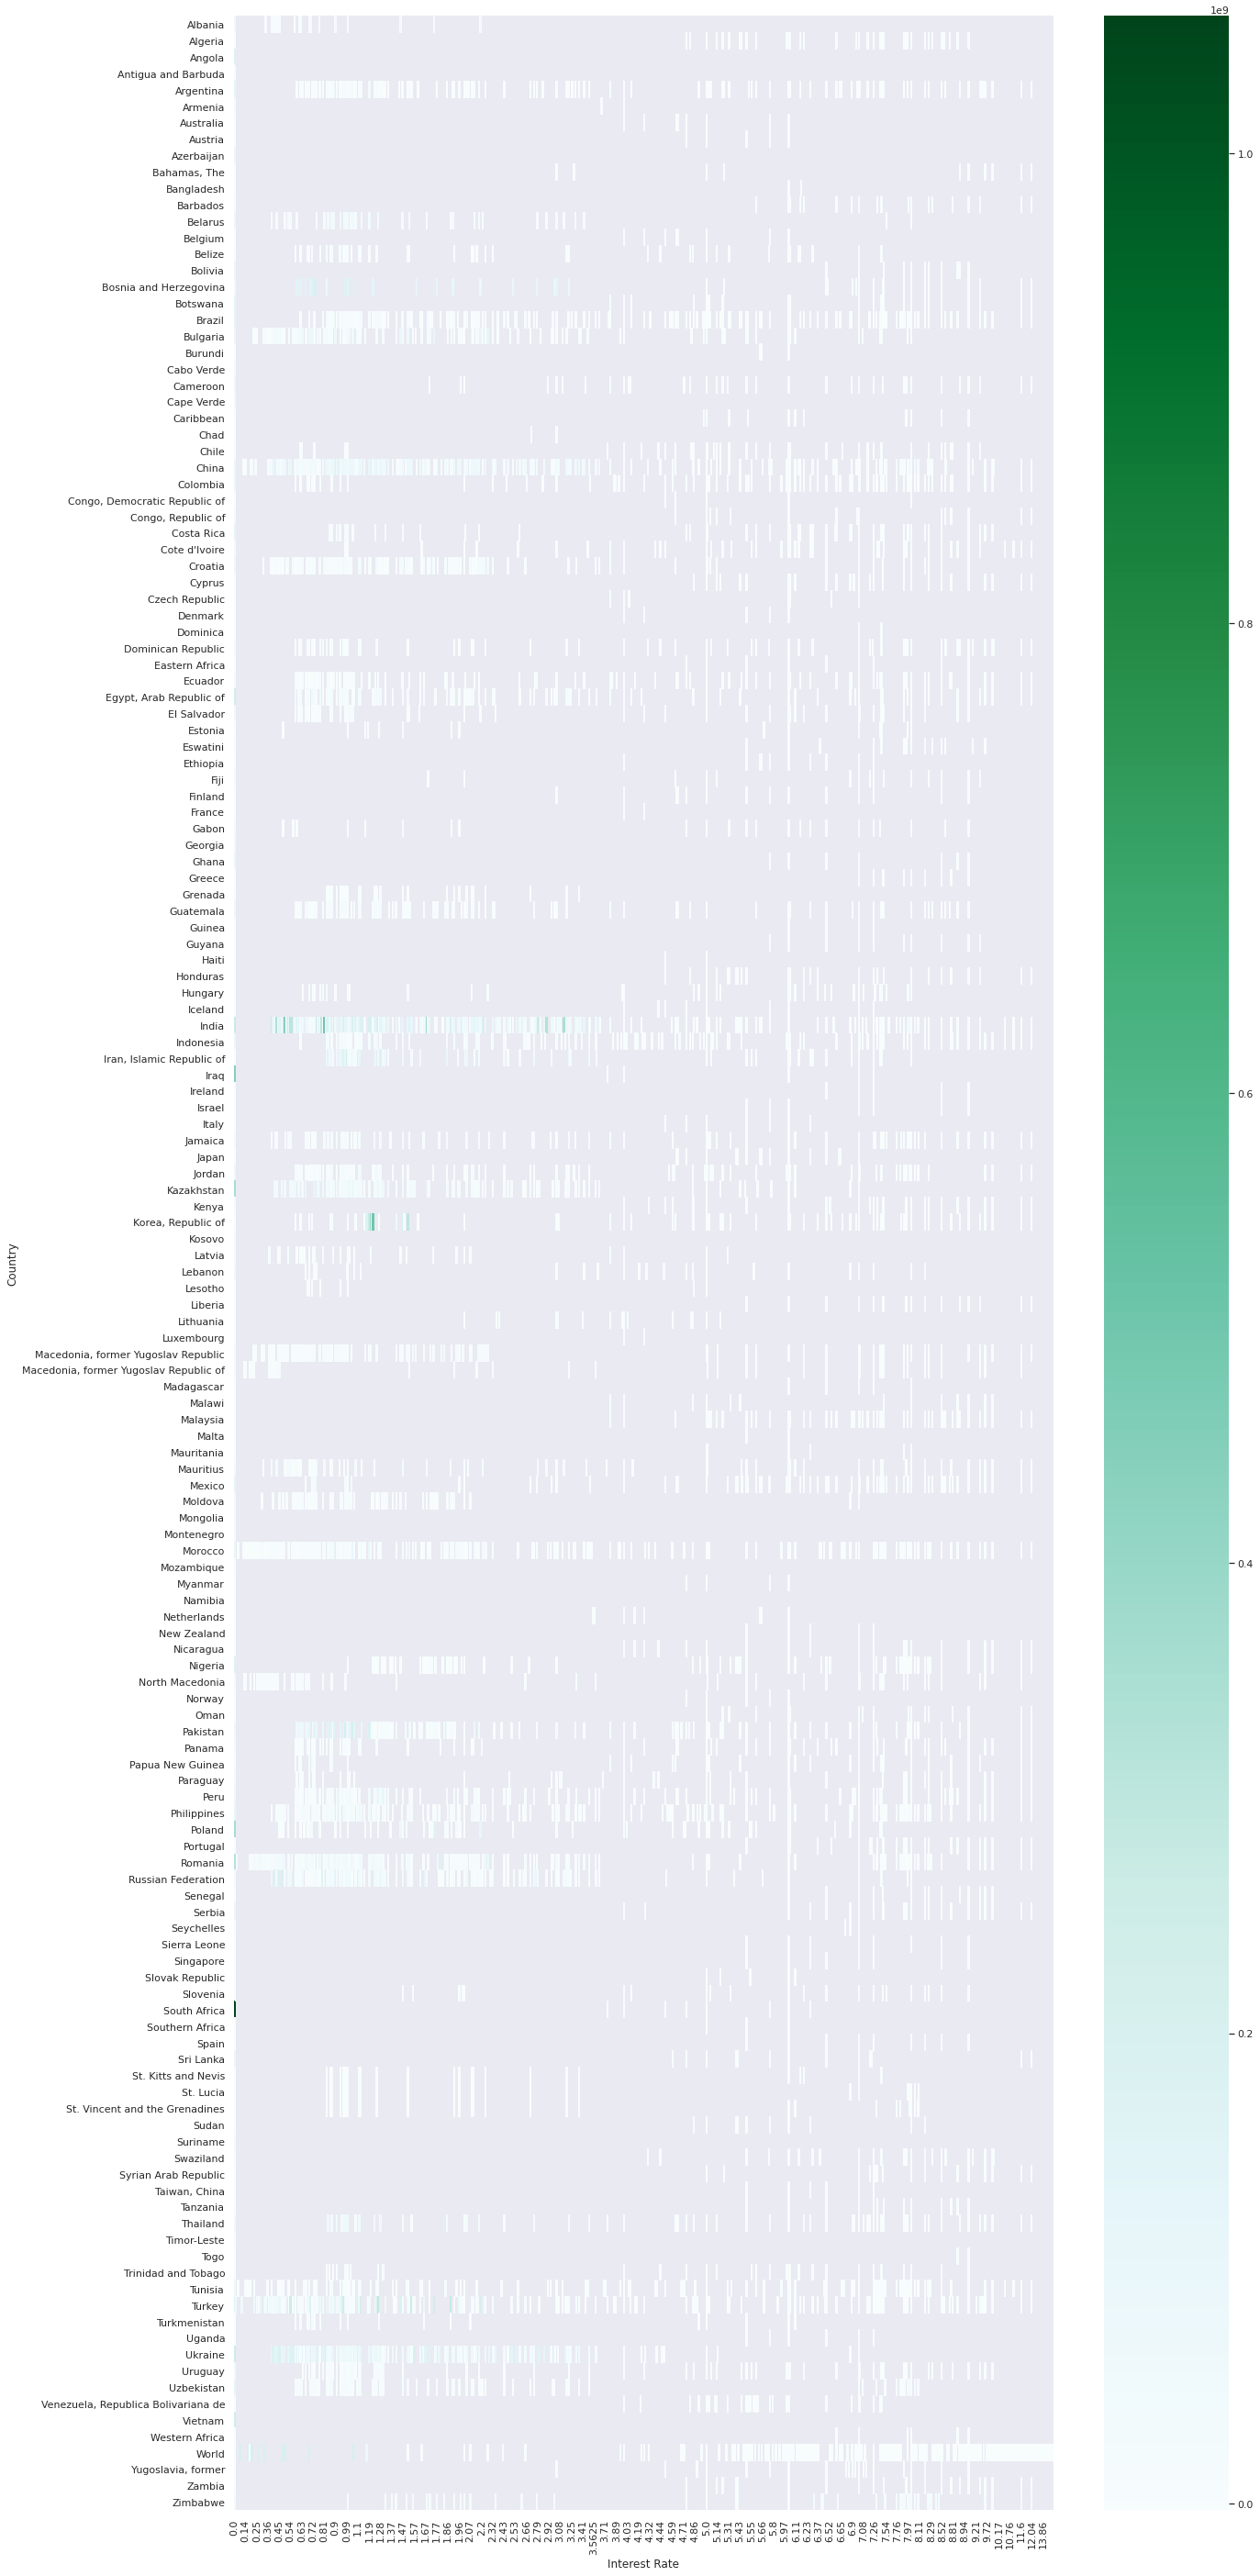

In [ ]:
heatmap=pd.pivot_table(bd,values='Loans Held', index=['Country'],columns='Interest Rate')
sns.heatmap(heatmap, cmap="BuGn")

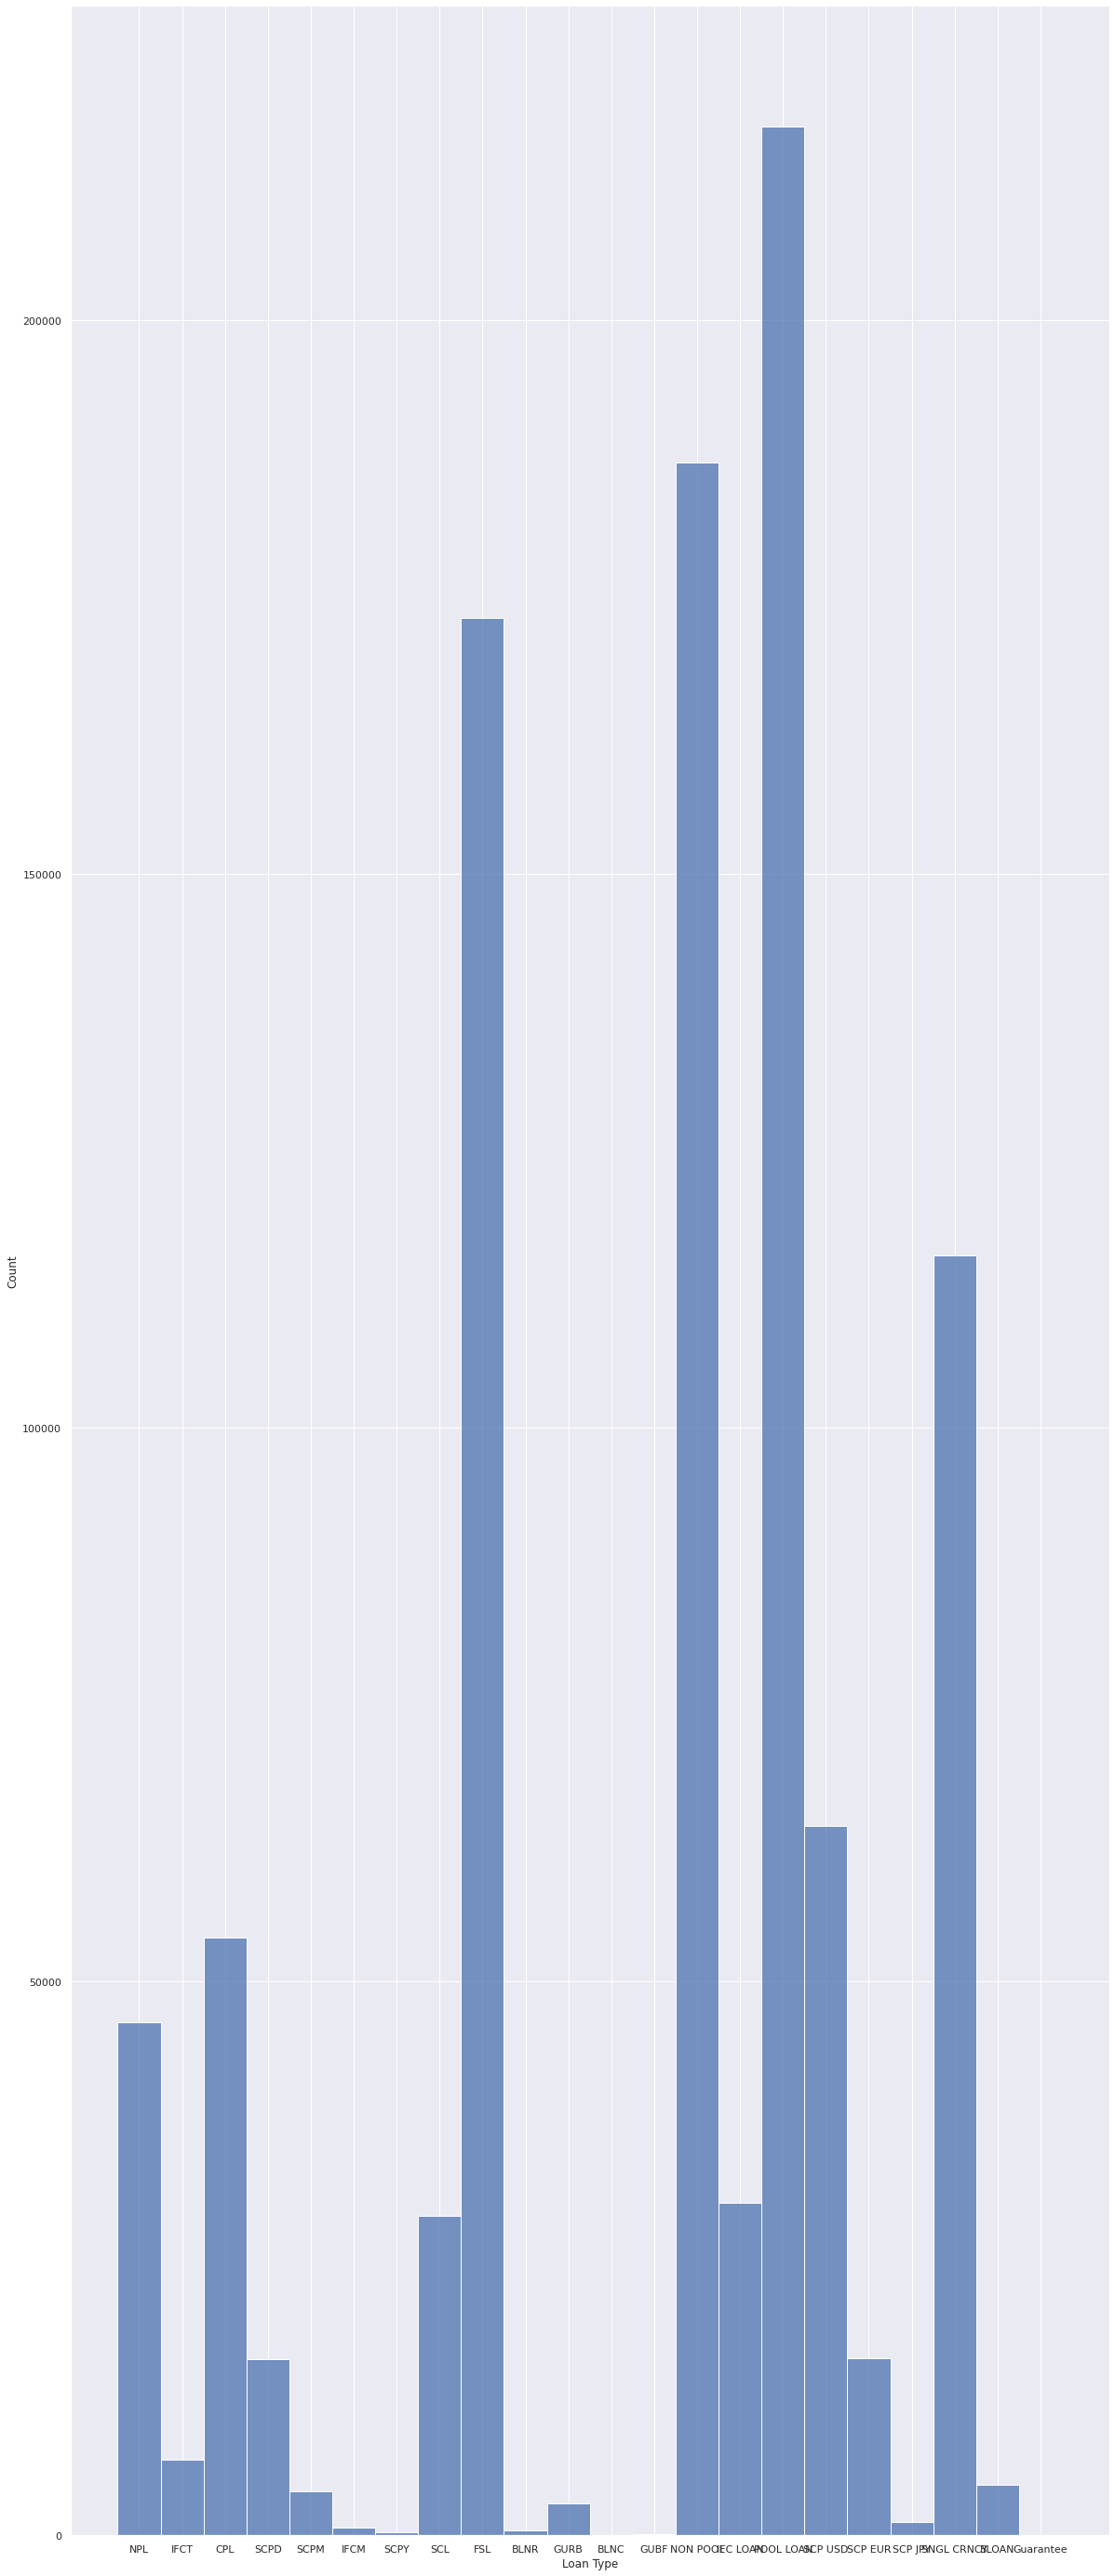

In [ ]:
sns.histplot(x=bd['Loan Type'])

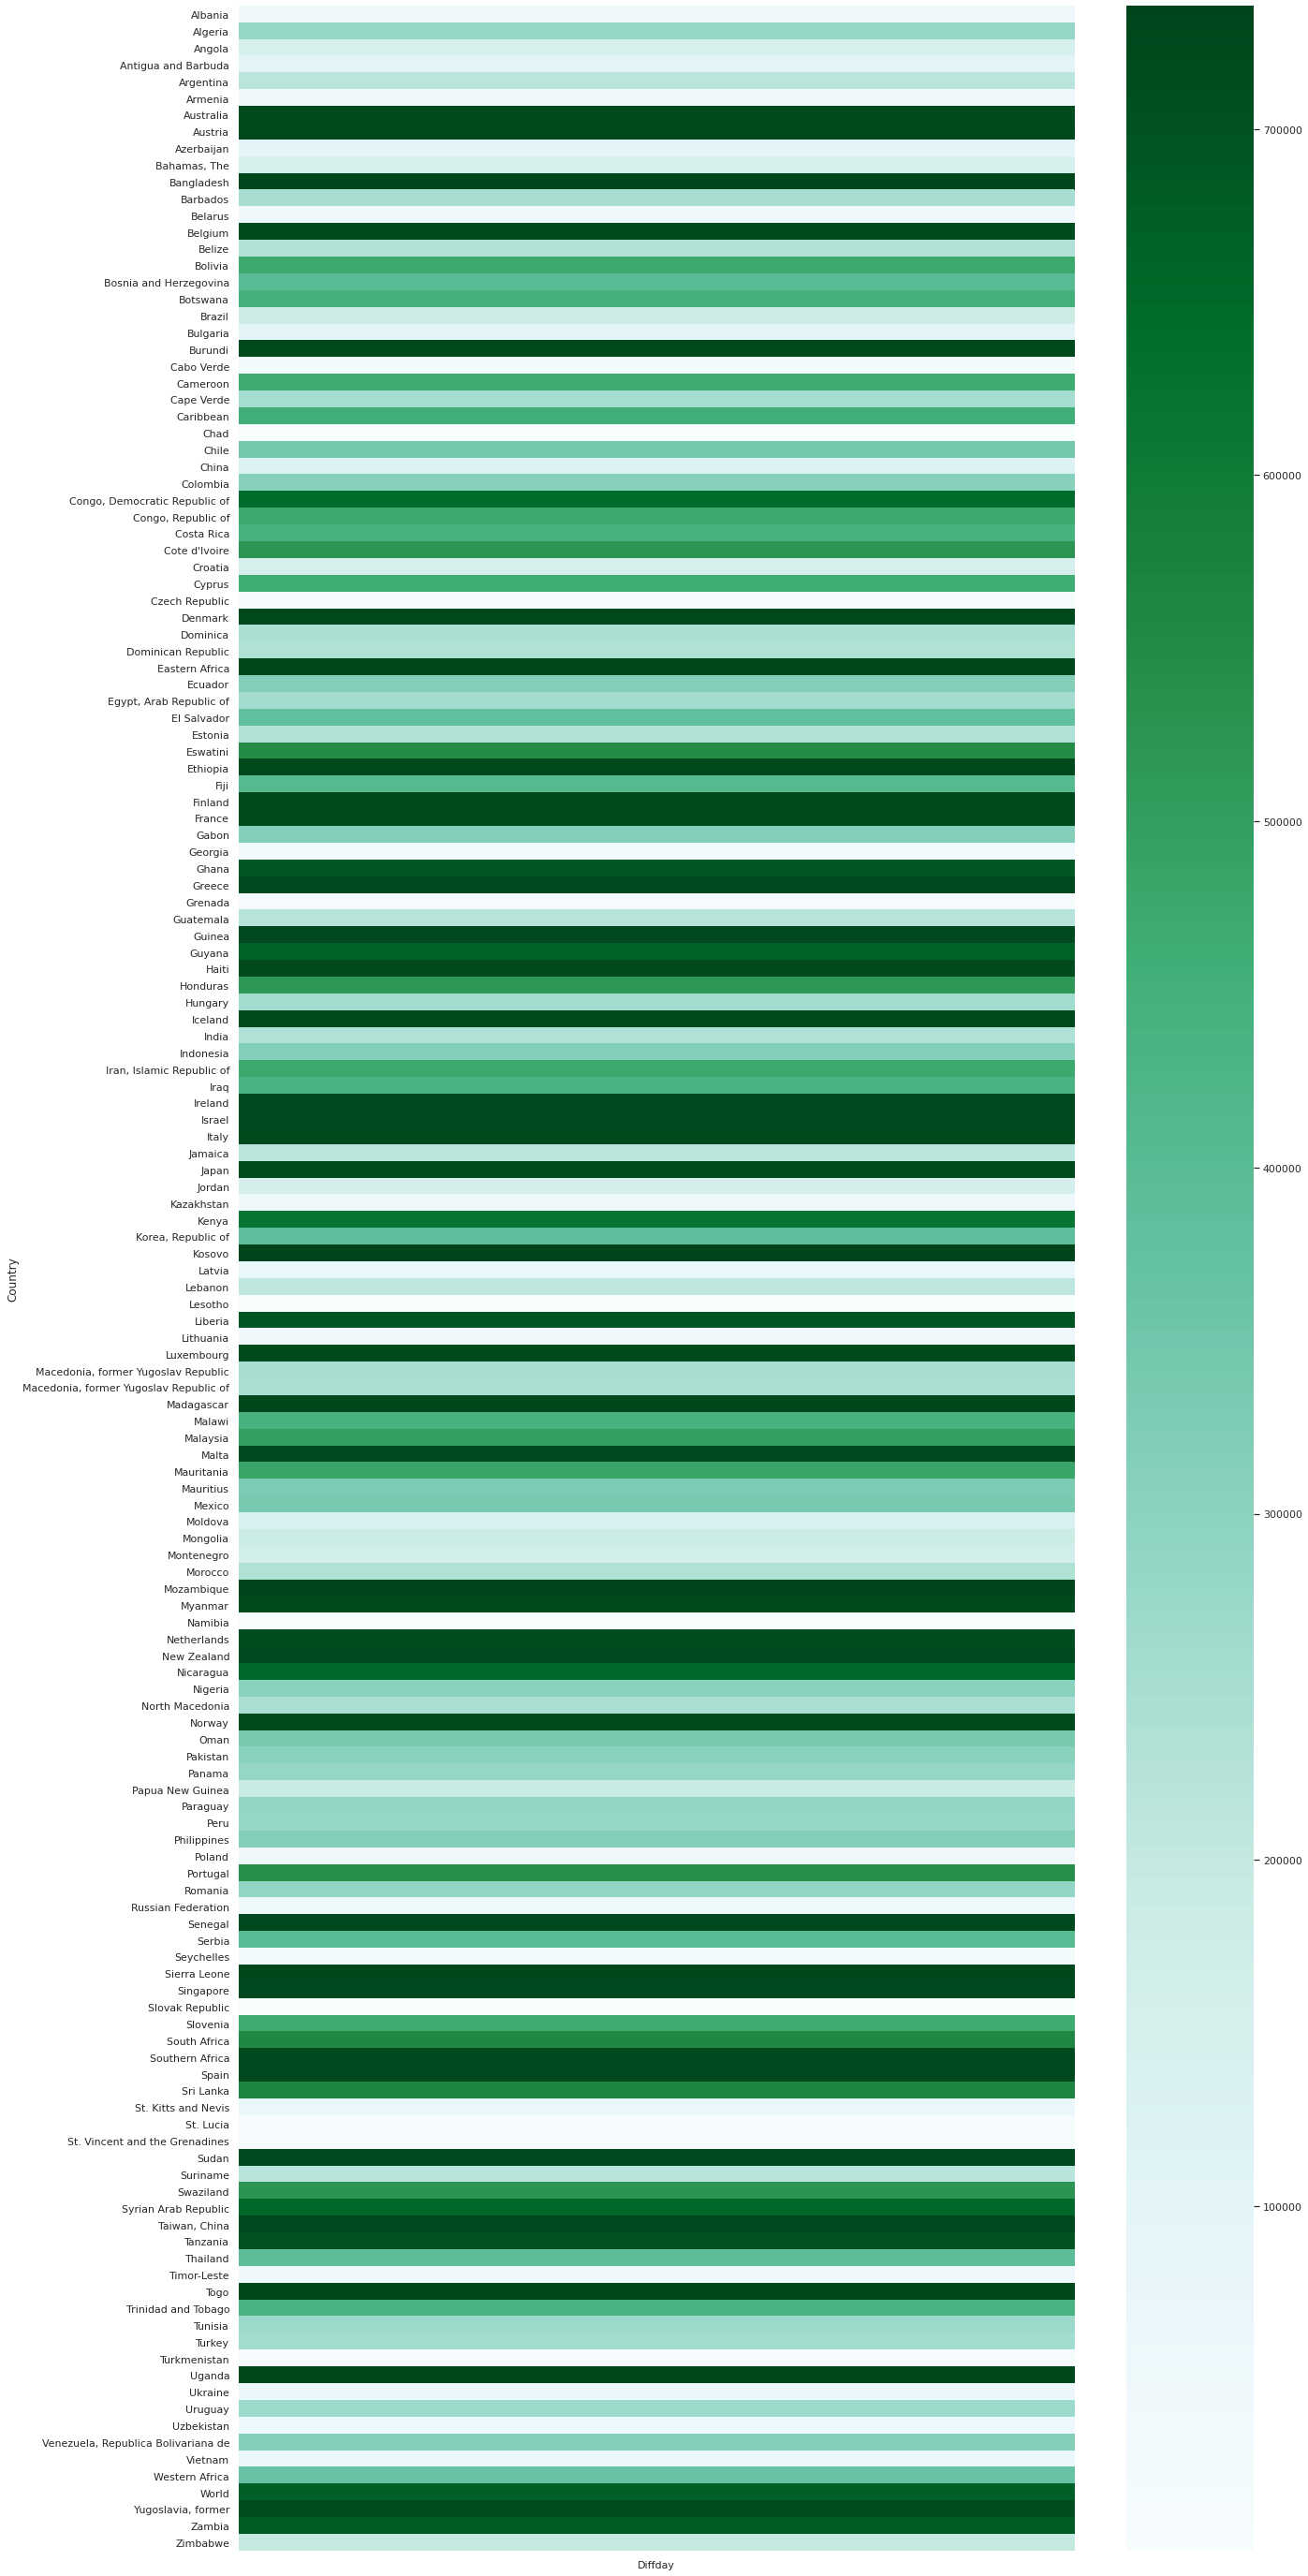

In [ ]:
heatmap1=pd.pivot_table(bd,values='Diffday', index=['Country'])
sns.heatmap(heatmap1, cmap="BuGn")

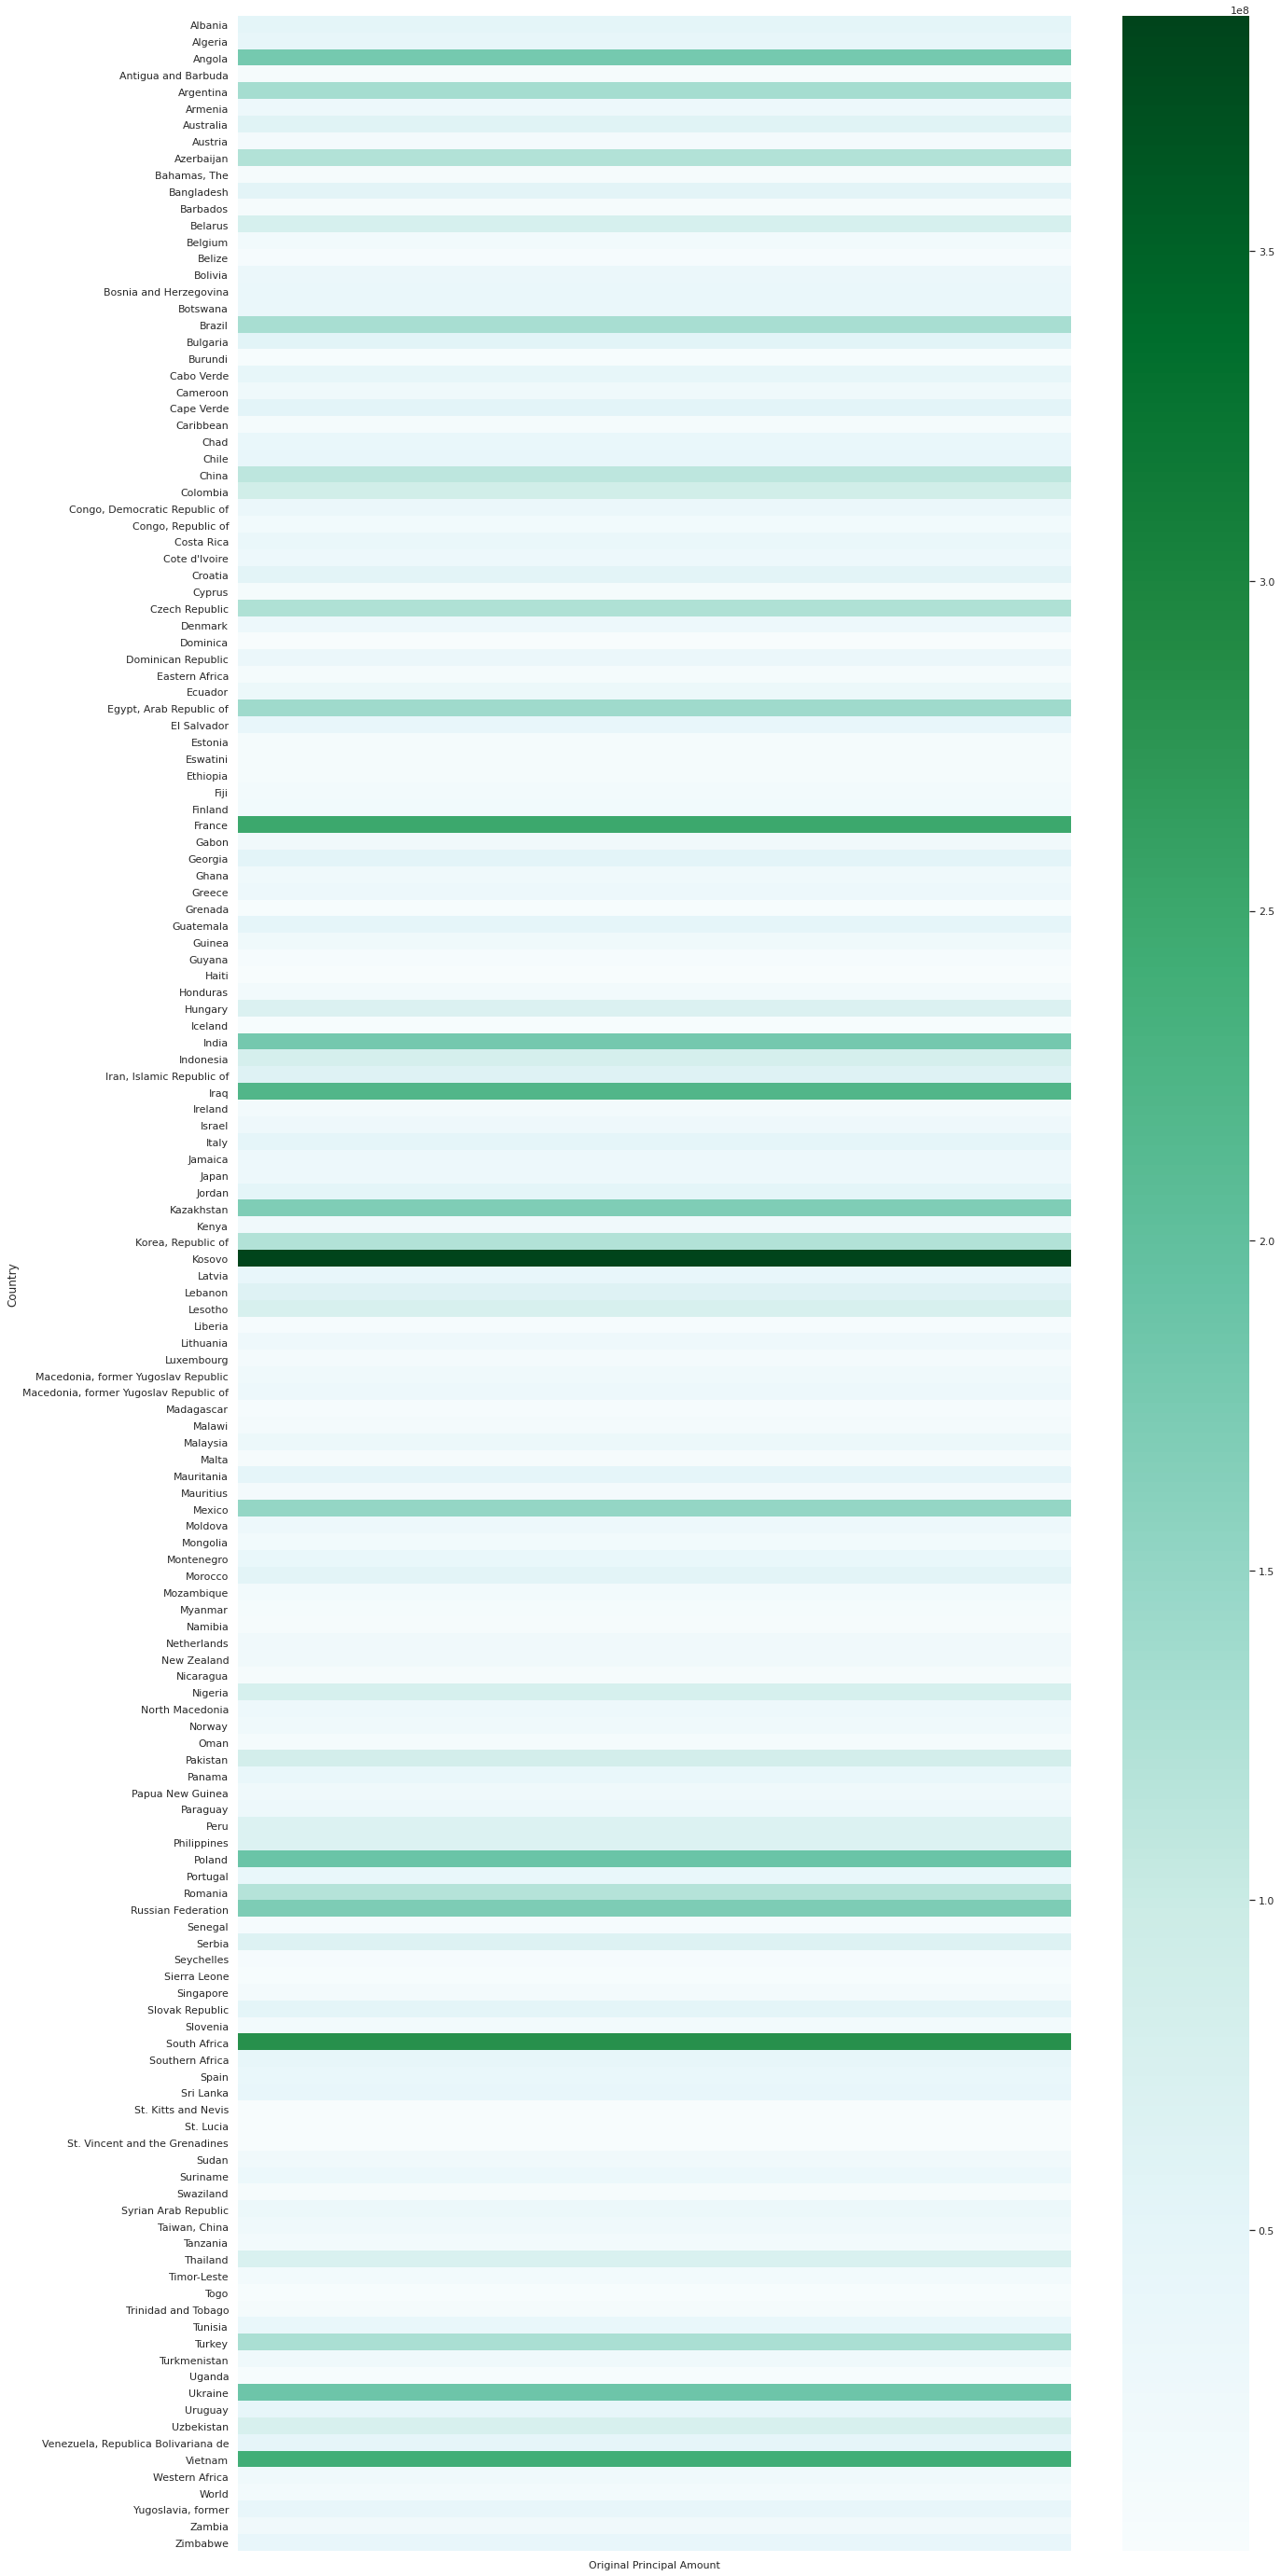

In [ ]:
heatmap2=pd.pivot_table(bd,values='Original Principal Amount', index=['Country'])
sns.heatmap(heatmap2, cmap="BuGn")

In [ ]:
bd['Loan Status'].value_counts()

Repaid                 384204
Fully Repaid           308667
Disbursed               83405
Disbursing              61115
Repaying                49344
Cancelled               19832
Fully Cancelled         15685
Fully Disbursed         13625
Fully Transferred       10500
Disbursing&Repaying      6400
Terminated               5098
Approved                 4728
Effective                3647
Signed                   3174
Negotiated                  1
Draft                       1
Name: Loan Status, dtype: int64

In [ ]:
def func3(row):
  a=row['Loan Status']
  if(a in ['Cancelled','Fully Cancelled','Terminated']):
    return(0)
  else:
    return(1)
bd['Passed'] = bd.apply (lambda row: func3(row), axis=1)

In [ ]:
bd['Passed'].value_counts()

1    928811
0     40615
Name: Passed, dtype: int64

In [ ]:
bd.columns

Index(['Region', 'Country', 'Borrower', 'Guarantor', 'Loan Type',
       'Loan Status', 'Interest Rate', 'Original Principal Amount',
       'Cancelled Amount', 'Undisbursed Amount', 'Disbursed Amount',
       'Repaid to IBRD', 'Due to IBRD', 'Exchange Adjustment',
       'Borrower's Obligation', 'Sold 3rd Party', 'Repaid 3rd Party',
       'Due 3rd Party', 'Loans Held', 'Diffday', 'Passed'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
con=input('Enter Country')
a=bd.loc[bd['Country']==con]
y=a['Passed'].values
a=a.drop(columns=['Passed','Country'],axis=1)
a=pd.get_dummies(a,drop_first=True)
x=a.values
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(xtrain,ytrain)
pred=rf.predict(xtest)
from sklearn.metrics import accuracy_score
acsc=accuracy_score(ytest,pred)
print(acsc)

Enter CountryIndia
1.0


In [ ]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

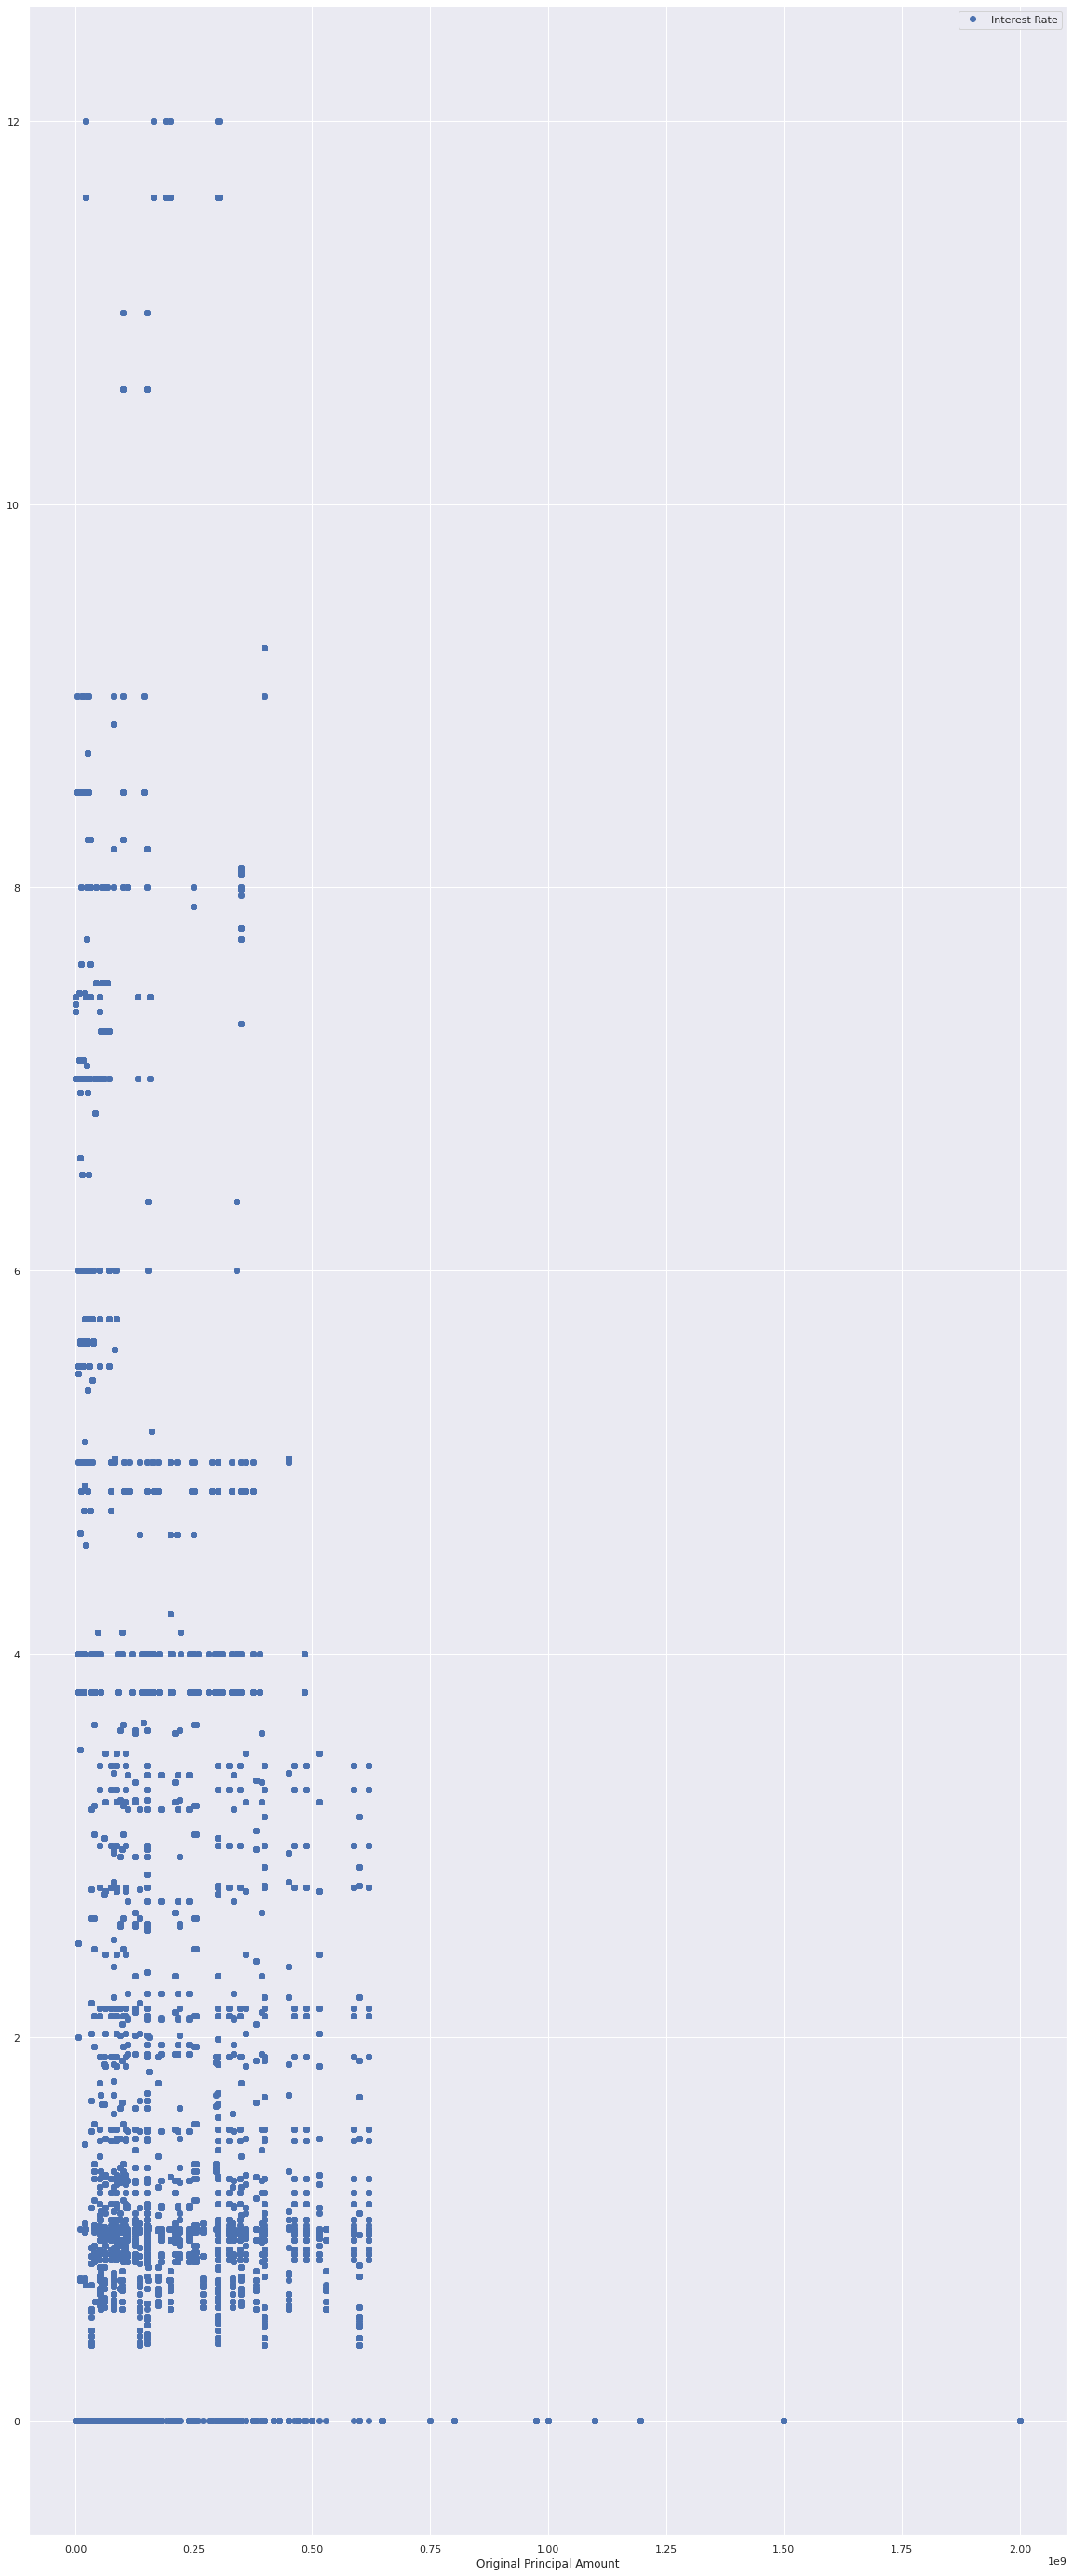

In [ ]:
a.plot(x='Original Principal Amount',y='Interest Rate',style='o')

In [ ]:
con=input('Enter Country')
a=bd.loc[bd['Country']==con]
y=a['Interest Rate'].values
a=a.drop(columns=['Interest Rate','Country'],axis=1)
a=pd.get_dummies(a,drop_first=True)
x=a.values
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
print(model.intercept_)
print(model.coef_)
pred=model.predict(xtest)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest,pred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest,pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest,pred)))

Enter CountryIndia
5.807311455168057
[ 4.11239412e-08 -4.33139531e-08  1.58673336e+00 -4.51322979e-07
  4.13071324e-07  1.05781401e+00 -5.28919714e-01  5.28919796e-01
  2.88381031e-07  8.67100026e-08 -1.19904087e-13 -1.58673340e+00
  3.49501608e-06 -1.93938230e+00 -3.28426916e+00 -3.35058125e+00
 -8.14330380e-01 -2.87846675e+00 -2.63939314e+00 -2.85215200e+00
 -3.41369651e+00 -2.26363441e+00 -1.79959227e+00 -9.76336994e-01
 -4.58051555e-01 -2.86188310e+00 -2.82603103e+00 -2.66877489e+00
 -1.29322999e+00 -5.48315496e+00 -3.64781204e+00 -2.65078938e+00
 -2.49667603e+00 -3.20726542e+00 -2.78993458e+00 -2.96412311e+00
 -6.40070571e-02 -2.91779292e+00 -2.77047702e+00 -2.75068186e+00
 -2.61367134e+00 -2.78592020e+00 -2.90576446e+00  1.03850250e+00
 -4.58419027e+00 -2.04505923e+00 -1.35255728e+00 -1.20101772e+00
 -1.34975614e-01 -2.97366857e+00 -3.05093403e+00 -2.73729752e+00
 -3.33702998e+00  1.06832375e+00  2.26452906e+00  2.54513257e+00
  2.65775582e+00  8.71058553e-01  2.73145144e+00  2.4

In [ ]:
arr=['India','China','Japan','France','Italy','Brazil','Korea, Republic of','Russian Federation','Spain','Australia']

In [ ]:
newdf=bd[bd['Country'].isin(arr)]

In [ ]:
newdf.shape

(165876, 21)

In [ ]:
pd.crosstab(index=newdf['Interest Rate'],columns=newdf['Country'])

Country,Australia,Brazil,China,France,India,Italy,Japan,"Korea, Republic of",Russian Federation,Spain
Interest Rate,,,,,,,,,,
0.000,7,16773,14204,1,7114,8,31,357,902,12
0.120,0,0,31,0,0,0,0,0,0,0
0.140,0,0,5,0,0,0,0,0,0,0
0.180,0,0,6,0,0,0,0,0,0,0
0.190,0,0,6,0,0,0,0,0,0,0
0.240,0,0,6,0,0,0,0,0,0,0
0.360,0,0,59,0,0,0,0,0,0,0
0.370,0,0,6,0,0,0,0,0,0,0
0.390,0,0,11,0,24,0,0,0,12,0


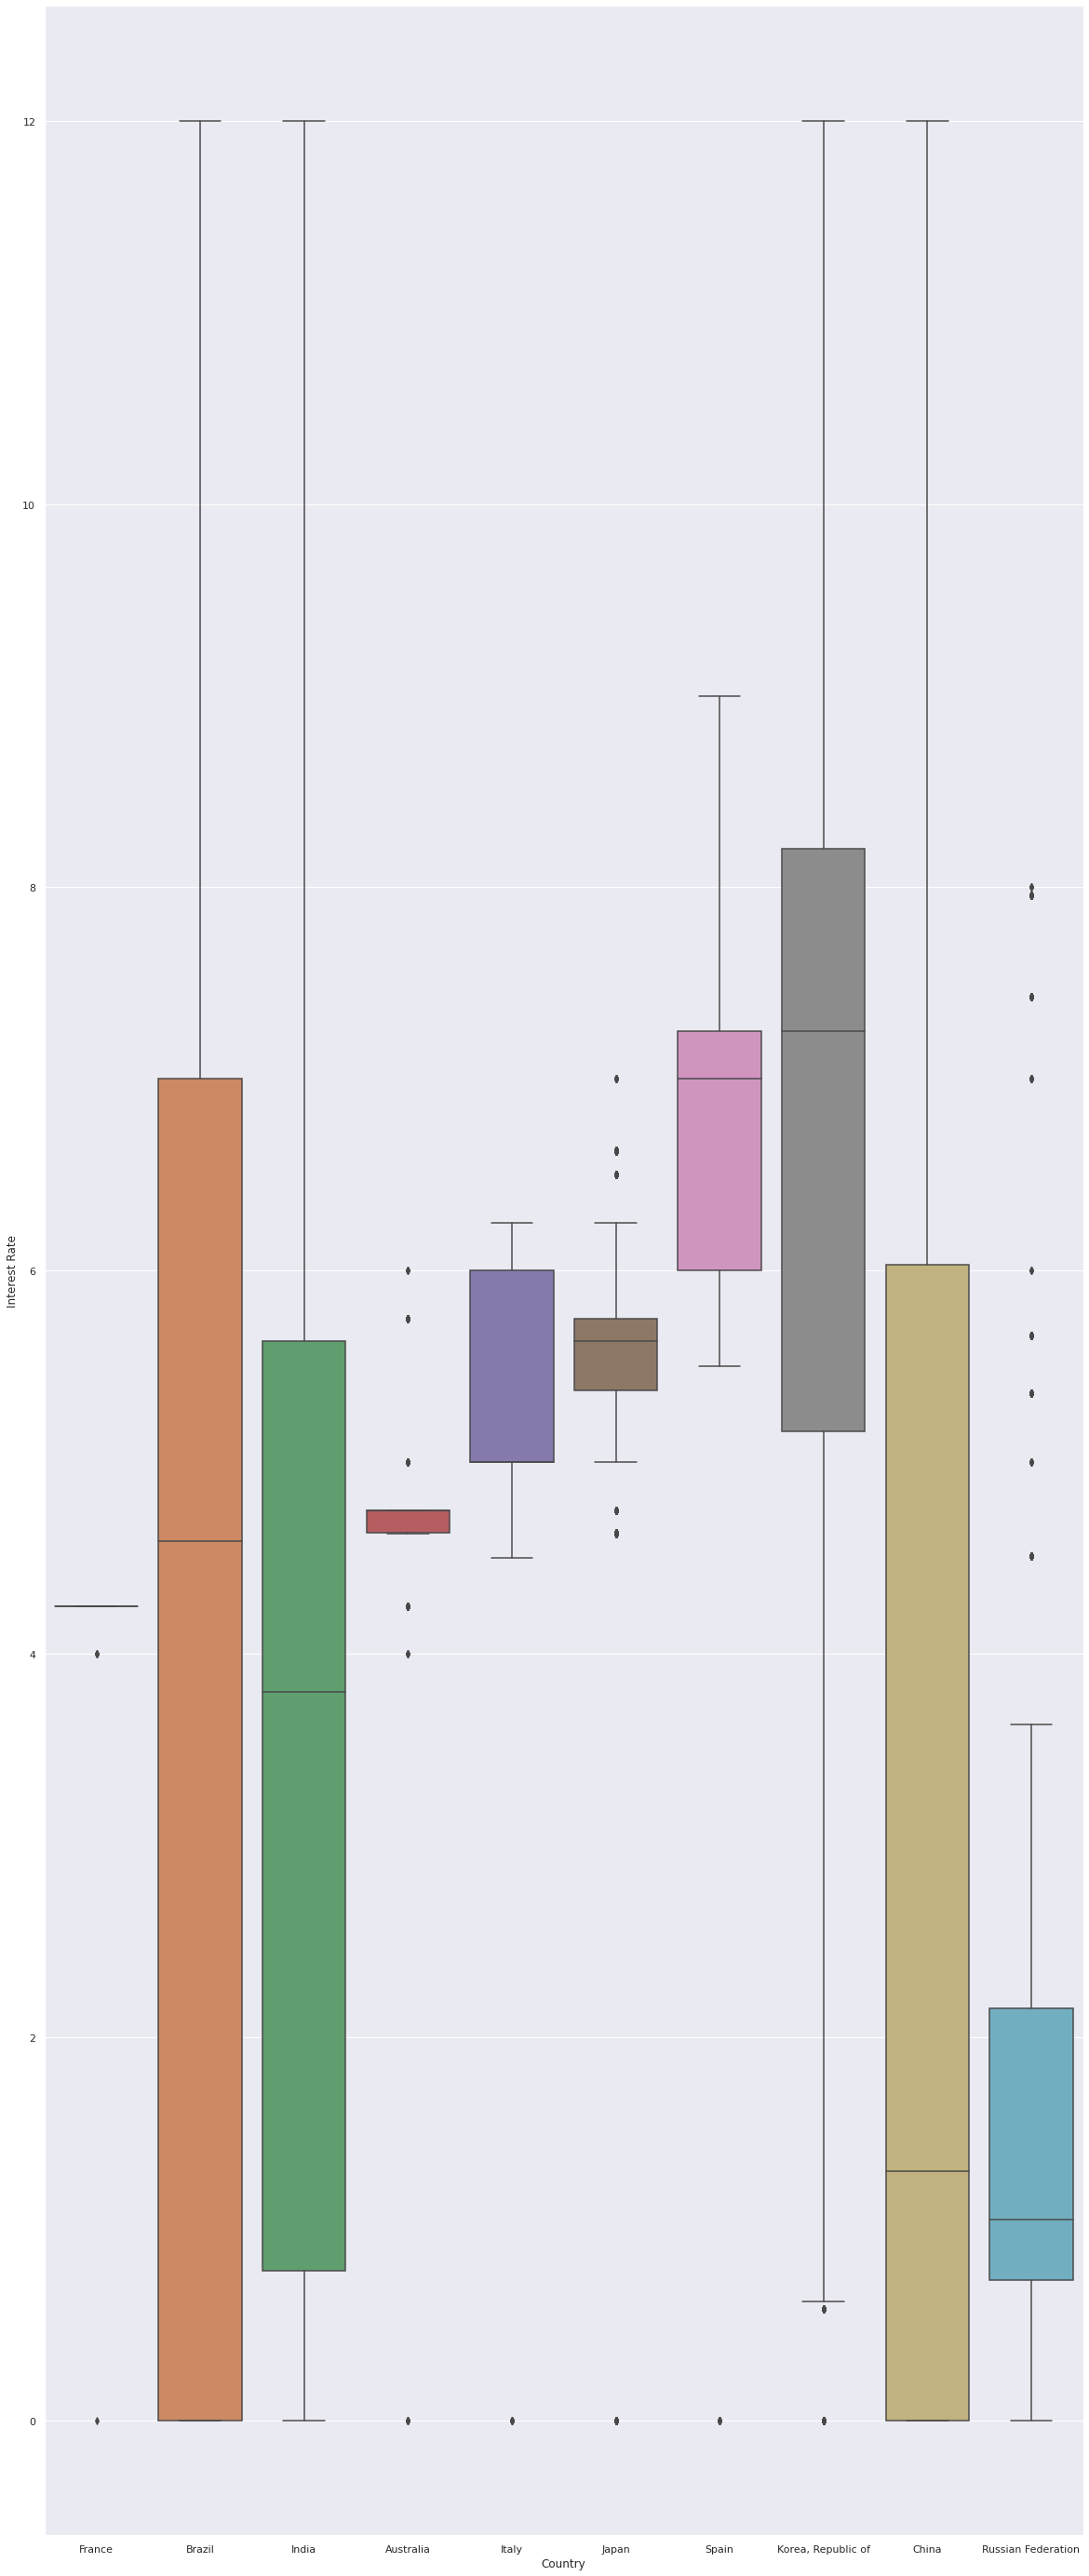

In [ ]:
x=sns.boxplot(x="Country", y="Interest Rate", data=newdf)

In [ ]:
arr=['Myanmar','Congo, Republic of','Mozambique','Uganda','Haiti','Ethiopia','Tanzania','Uzbekistan','Zambia','Pakistan']
newdf=bd[bd['Country'].isin(arr)]
newdf.shape

(27206, 21)

In [ ]:
pd.crosstab(index=newdf['Interest Rate'],columns=newdf['Country'])

Country,"Congo, Republic of",Ethiopia,Haiti,Mozambique,Myanmar,Pakistan,Tanzania,Uganda,Uzbekistan,Zambia
Interest Rate,,,,,,,,,,
0.000,206,127,1,230,3,3602,27,9,681,32
0.580,0,0,0,0,0,0,0,0,6,0
0.590,0,0,0,0,0,5,0,0,16,0
0.600,0,0,0,0,0,4,0,0,4,0
0.620,0,0,0,0,0,12,0,0,18,0
0.630,0,0,0,0,0,0,0,0,4,0
0.640,0,0,0,0,0,5,0,0,0,0
0.660,0,0,0,0,0,5,0,0,27,0
0.680,0,0,0,0,0,5,0,0,0,0


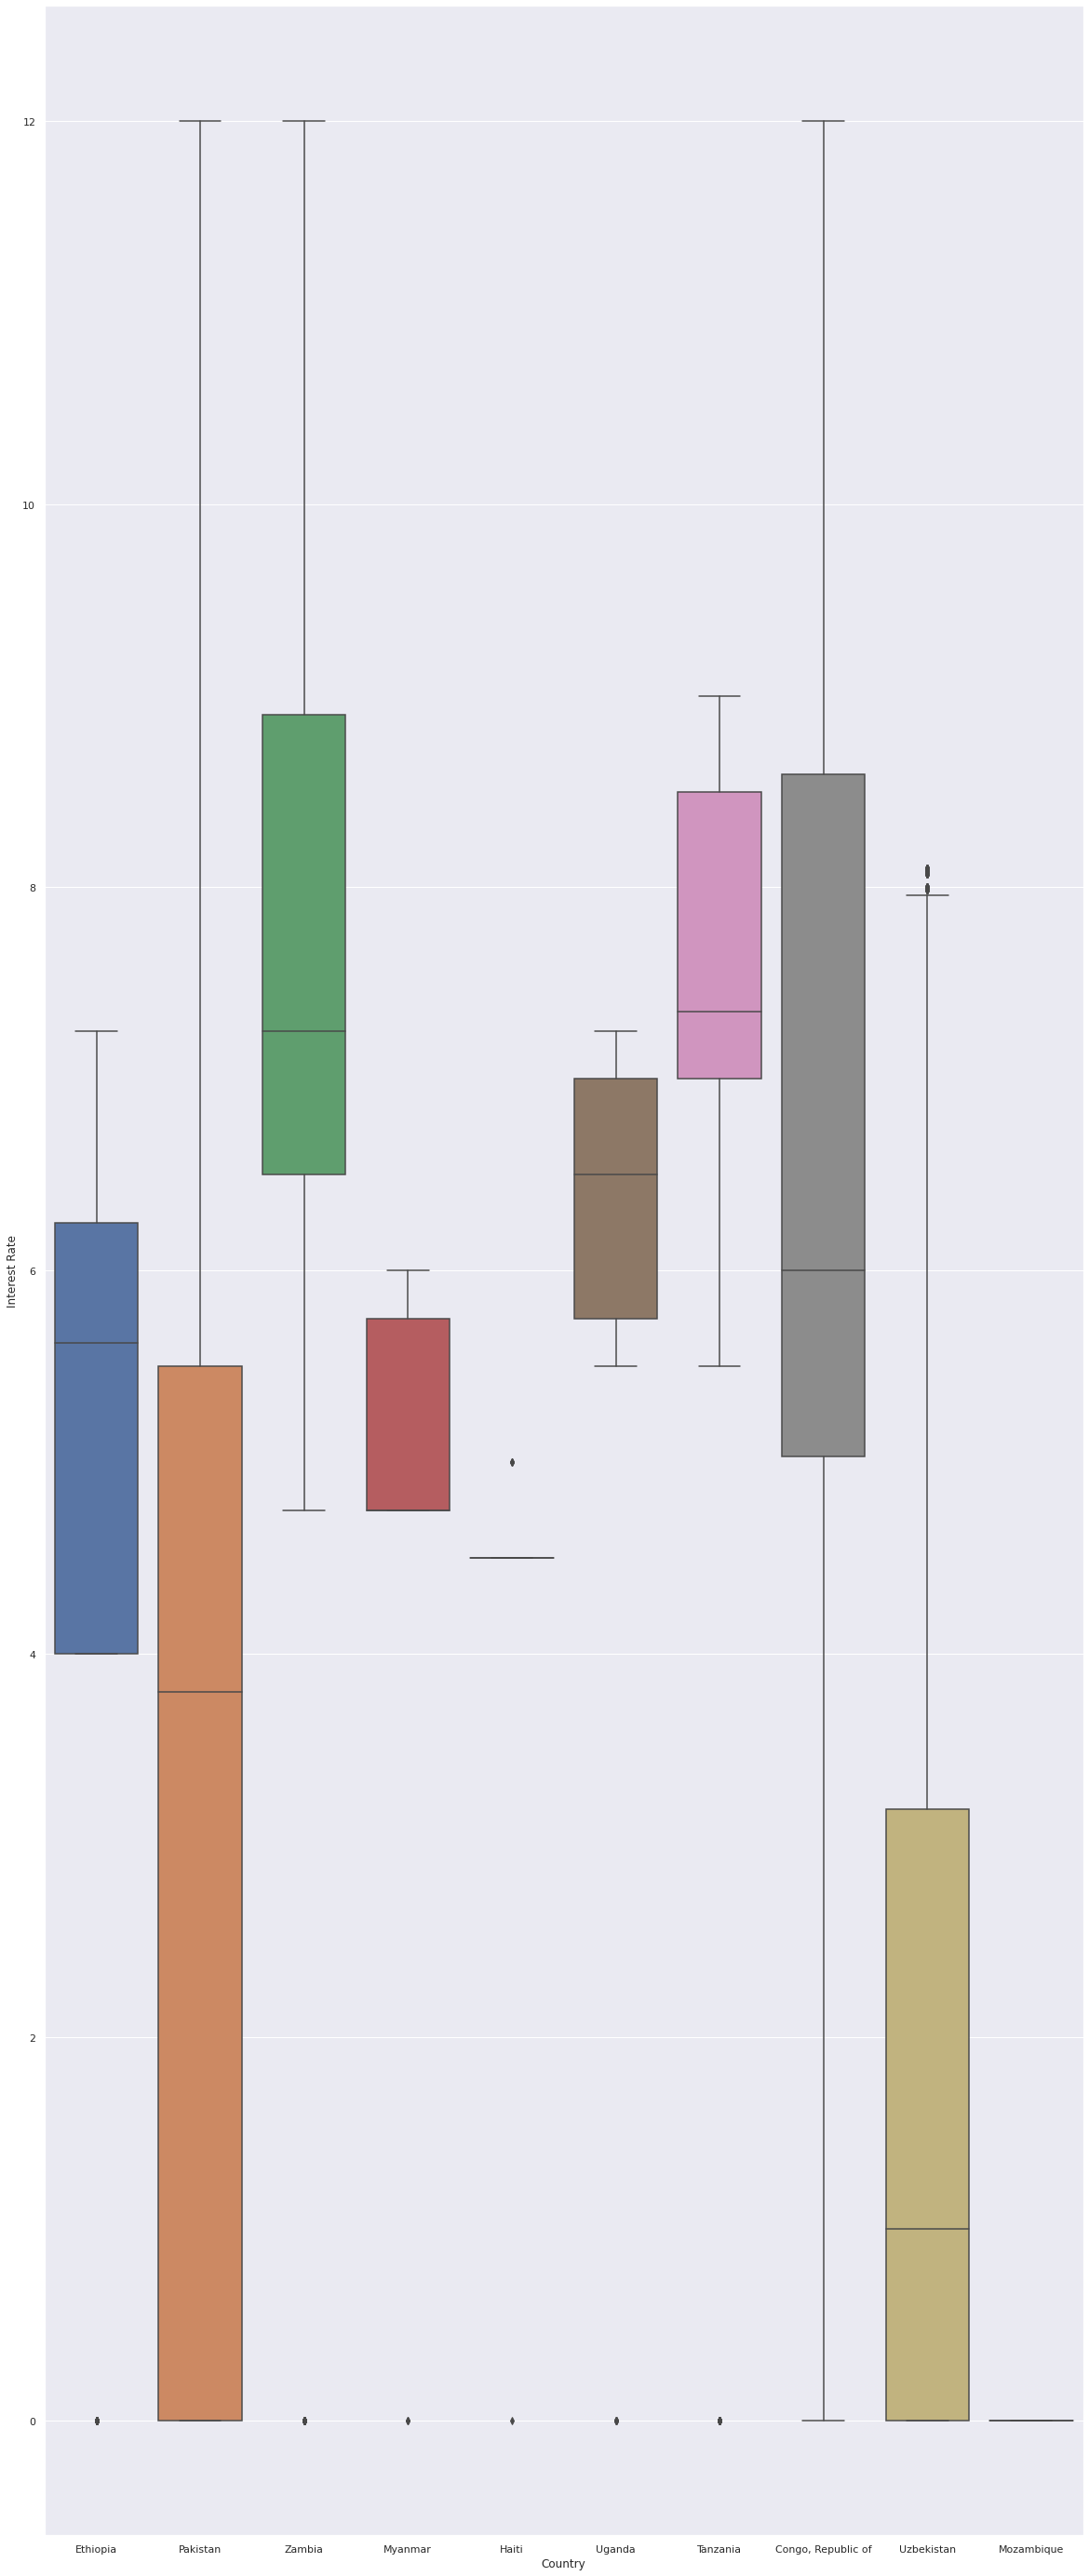

In [ ]:
ax=sns.boxplot(x="Country", y="Interest Rate", data=newdf)

In [ ]:
(bd.loc[bd['Country']=='India'])['Undisbursed Amount'].sum()

1180120432510.5999

In [ ]:
arr1=['India','China','Japan','France','Italy','Brazil','Korea, Republic of','Russian Federation','Spain','Australia','Myanmar','Congo, Republic of','Mozambique','Uganda','Haiti','Ethiopia','Tanzania','Uzbekistan','Zambia','Pakistan']
arr2=[]
arr3=[]
for a in arr1:
  arr2.append((bd.loc[bd['Country']==a])['Undisbursed Amount'].sum())
  arr3.append((bd.loc[bd['Country']==a])['Disbursed Amount'].sum())

In [ ]:
arr2

[1180120432510.5999,
 824778426361.71,
 0.0,
 0.0,
 0.0,
 465852925075.39,
 0.0,
 31708081317.350006,
 0.0,
 0.0,
 0.0,
 7825270146.84,
 283646421.16,
 0.0,
 0.0,
 0.0,
 0.0,
 58081209522.21001,
 0.0,
 138129675616.55]

In [ ]:
arr3

[4066099871790.67,
 4093521015223.6304,
 99416756441.95999,
 29000000000.0,
 46171248000.0,
 5615591290929.06,
 1722663097973.3696,
 1175660526192.4402,
 48291241420.600006,
 48456680000.0,
 3842377483.12,
 24269702886.39,
 0.0,
 4978985481.08,
 301600000.0,
 12597249357.52,
 41244084893.68,
 88886320210.93,
 67527078119.32001,
 819245285598.53]

In [ ]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

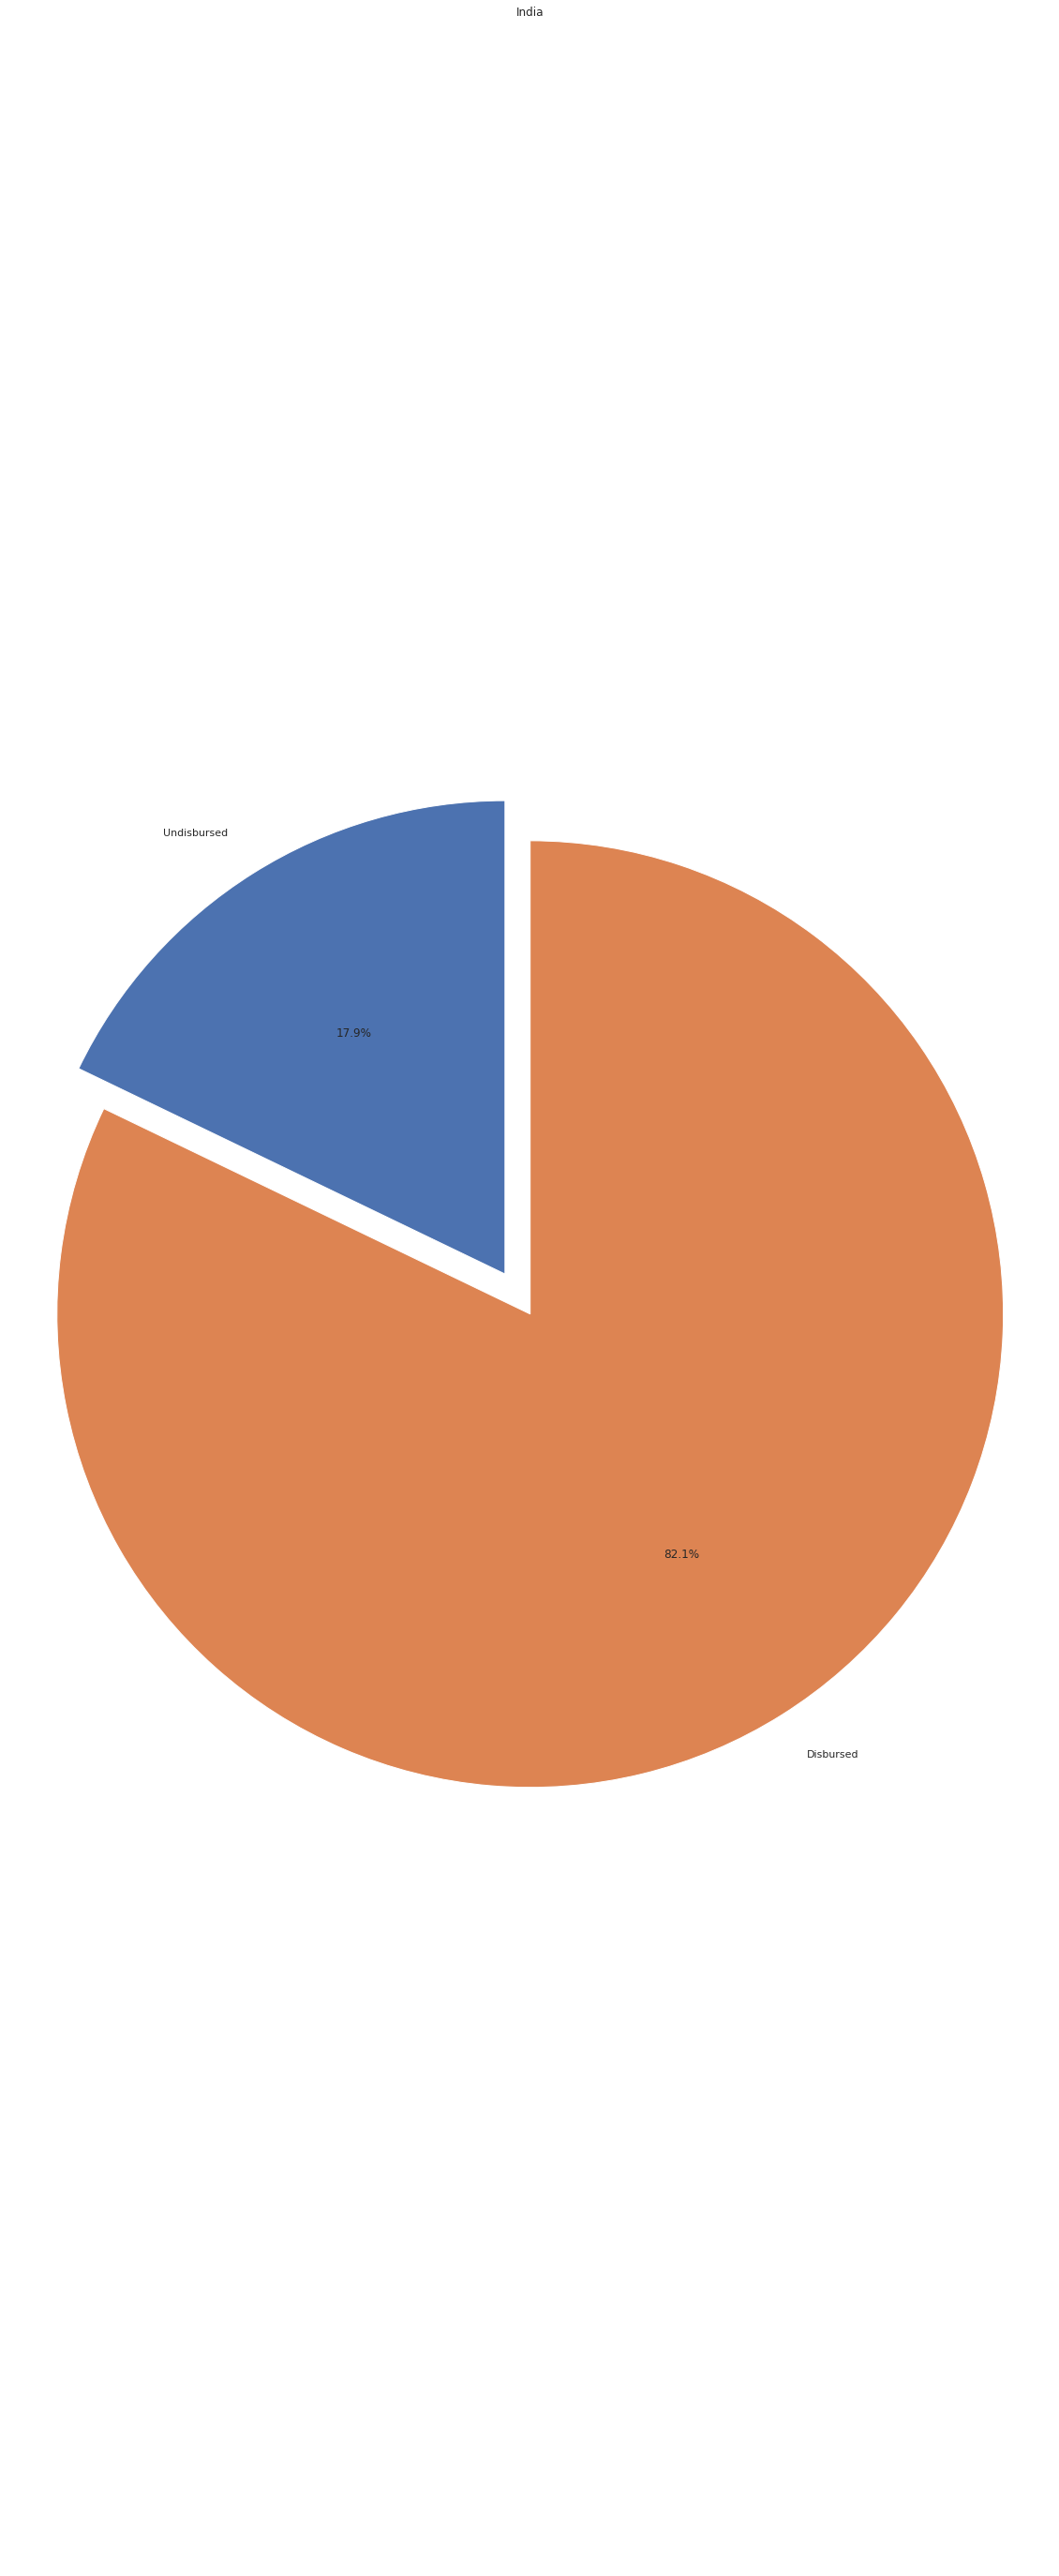

<Figure size 360x360 with 0 Axes>

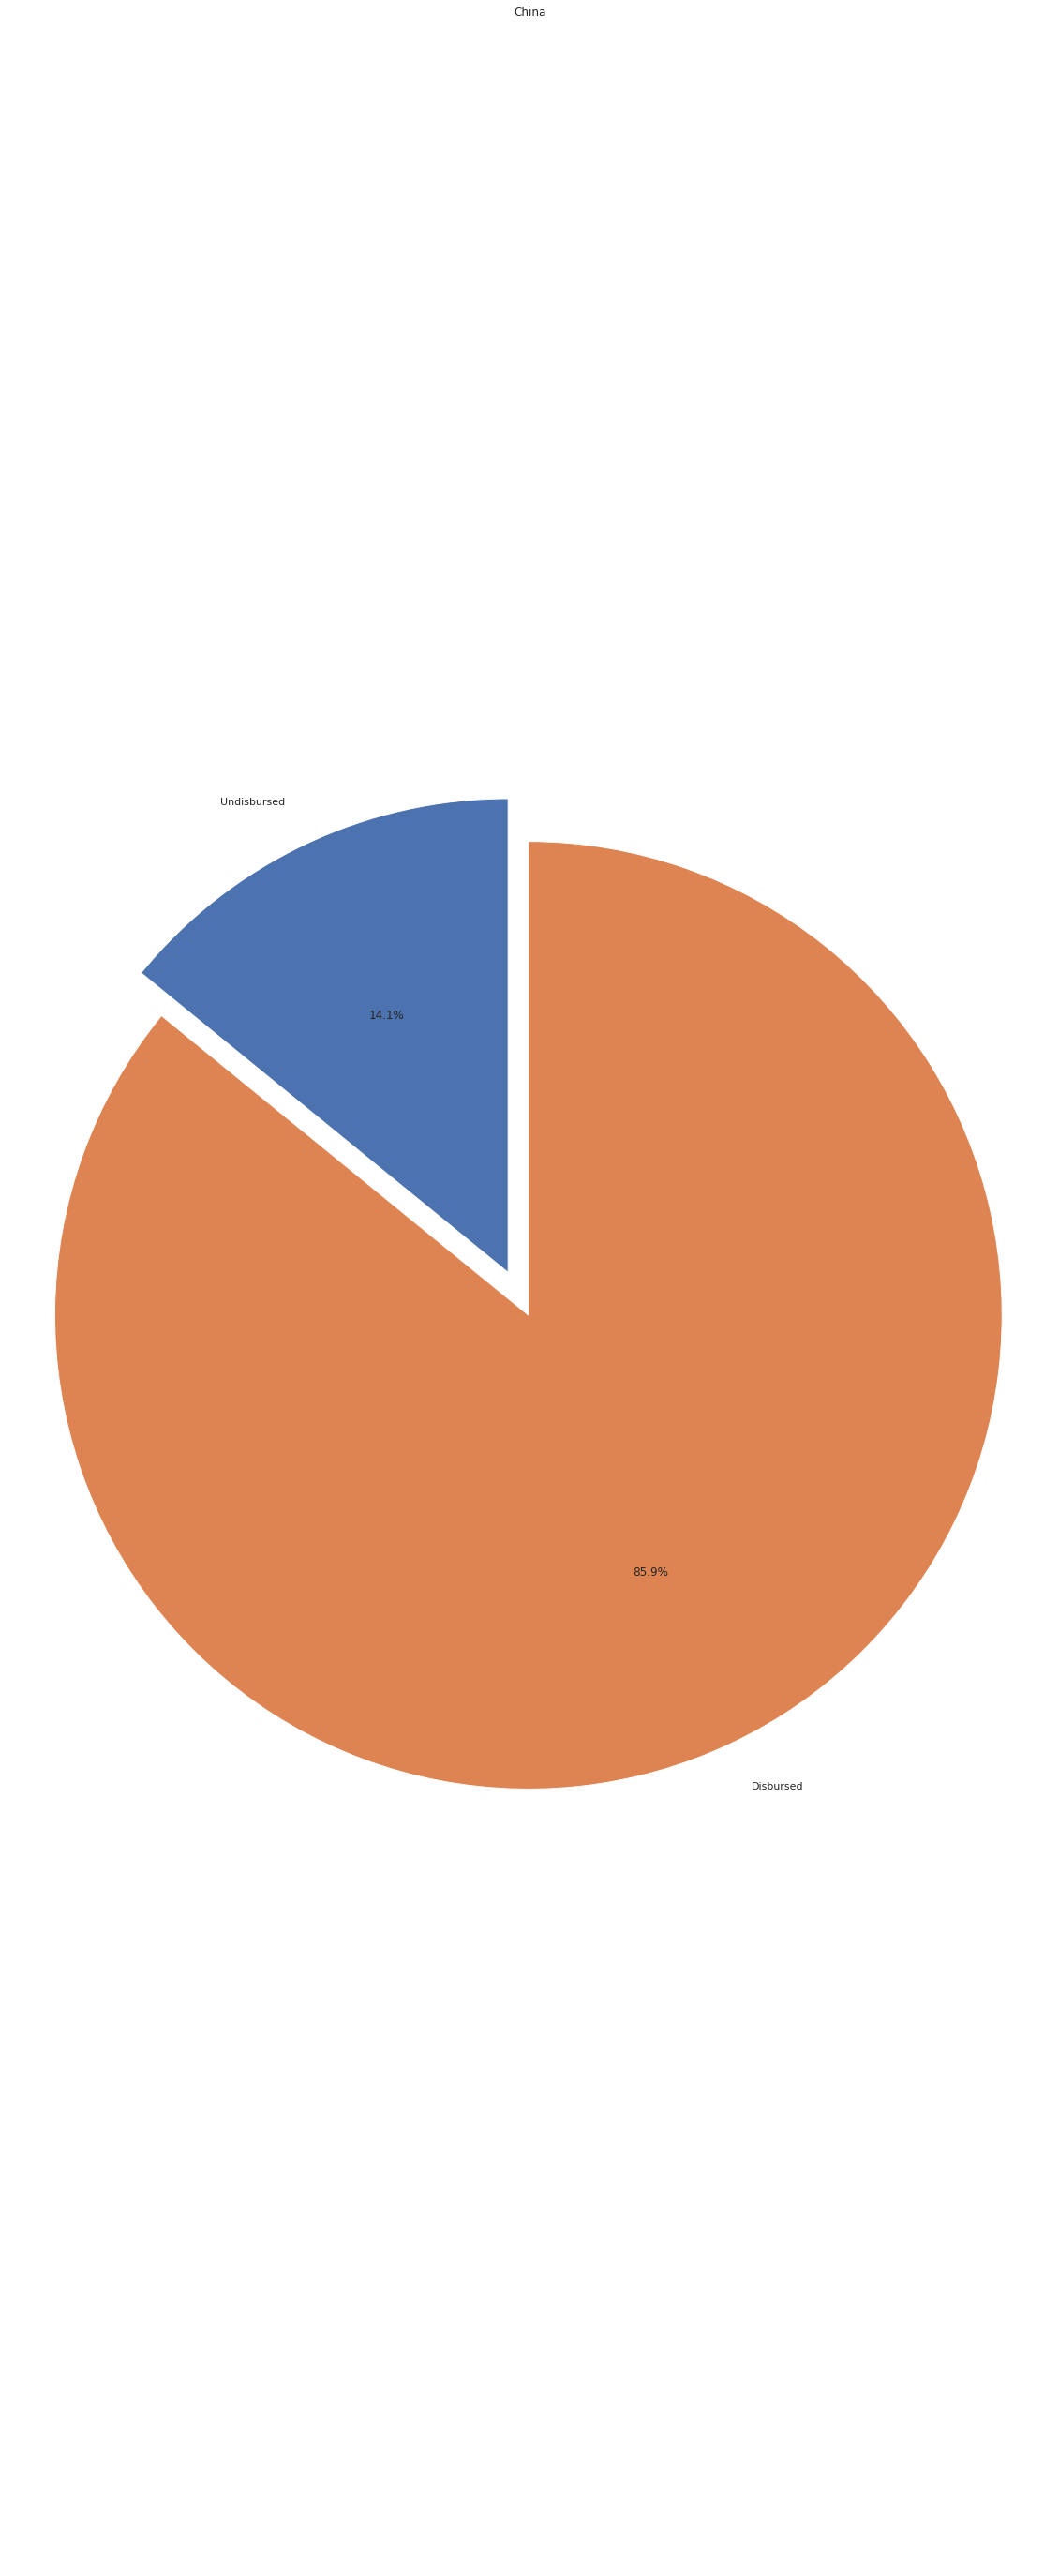

<Figure size 360x360 with 0 Axes>

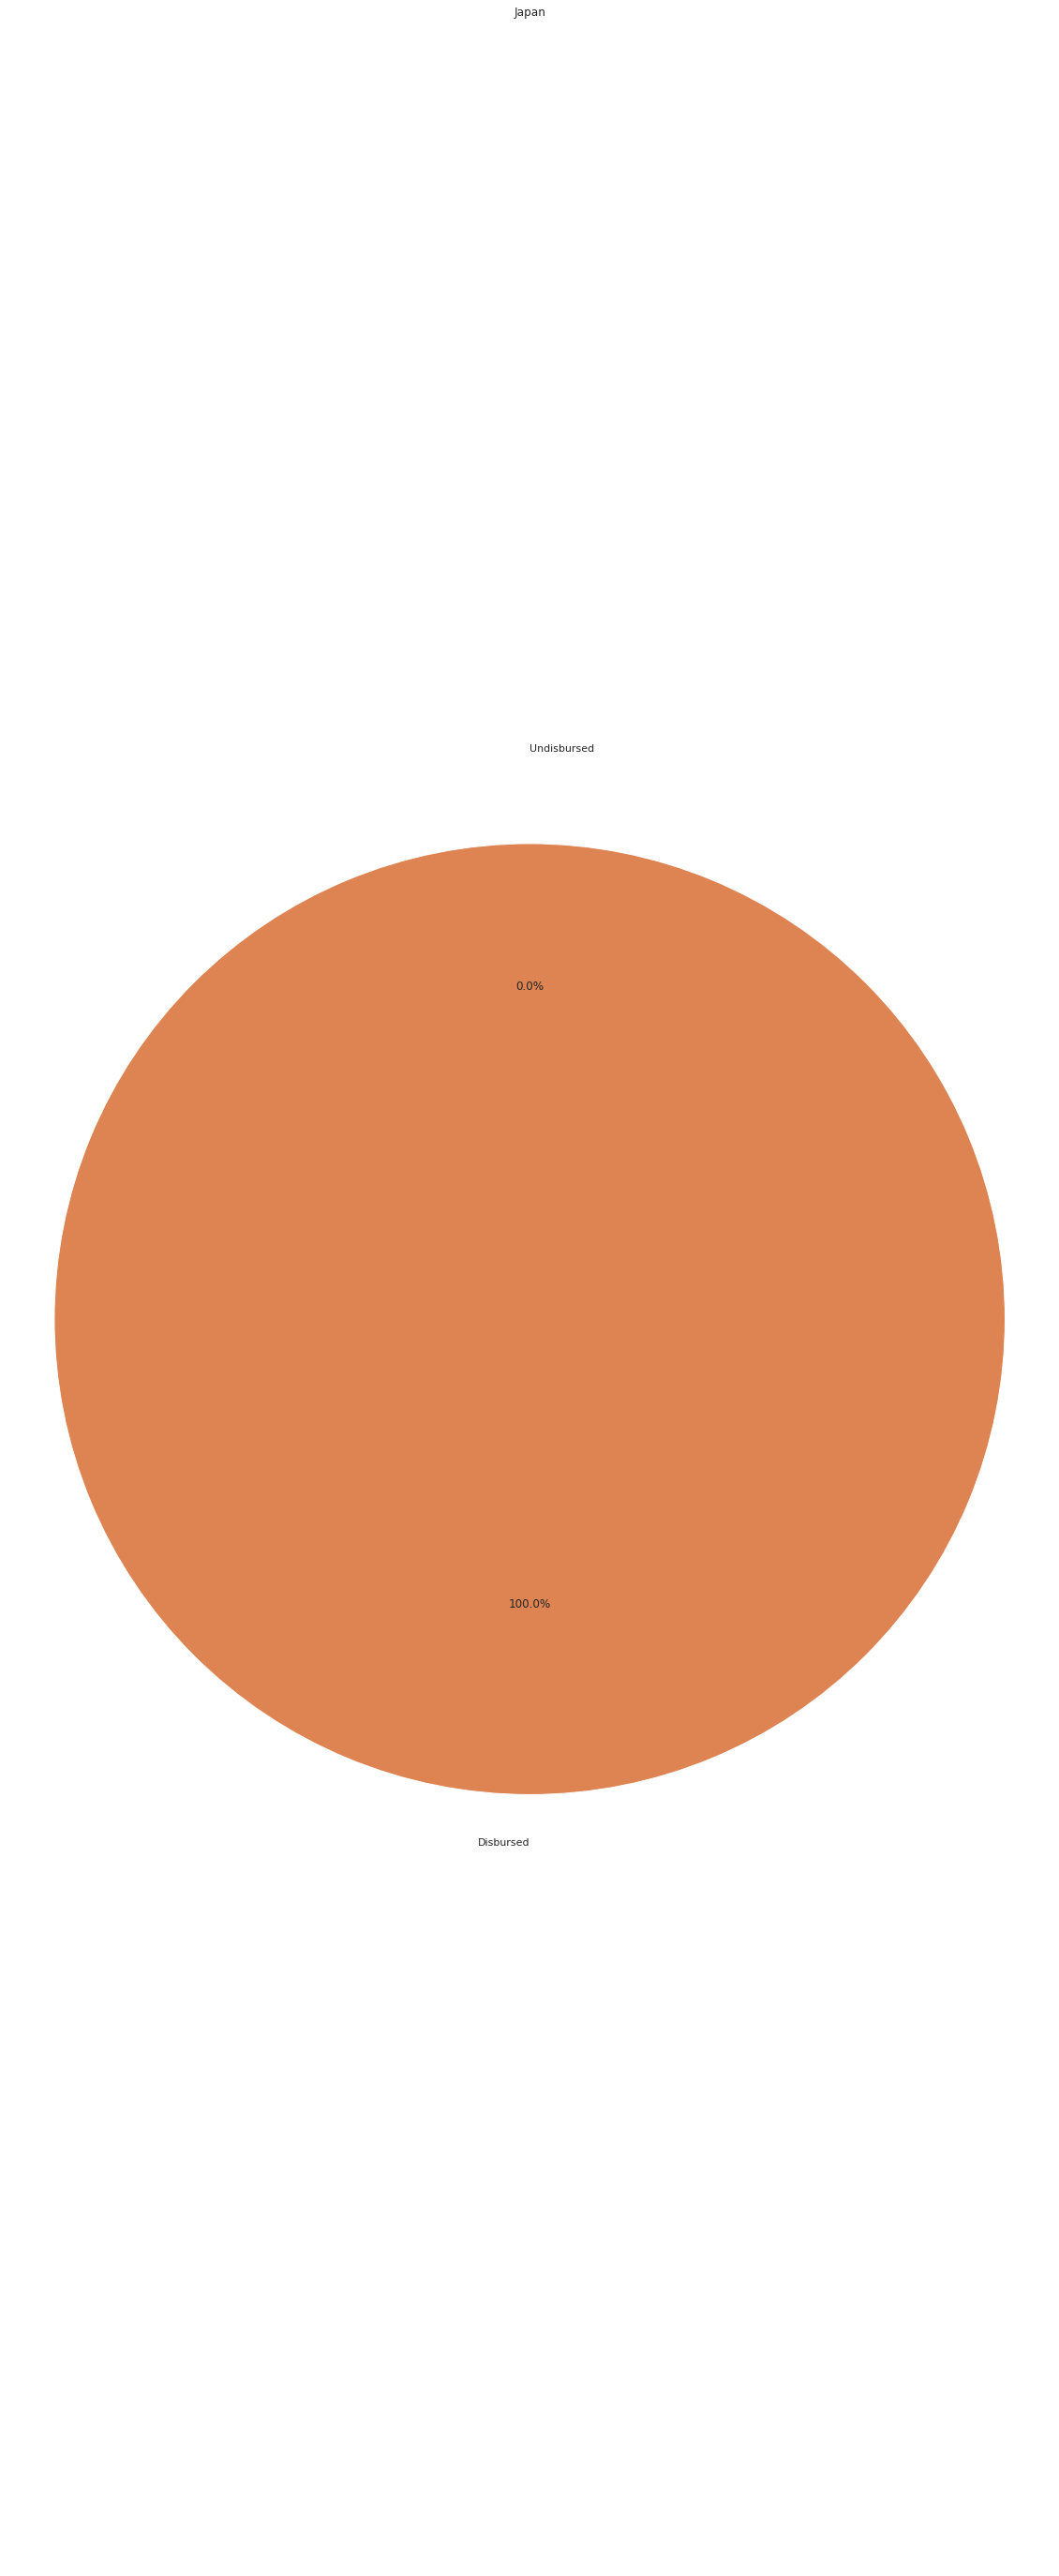

<Figure size 360x360 with 0 Axes>

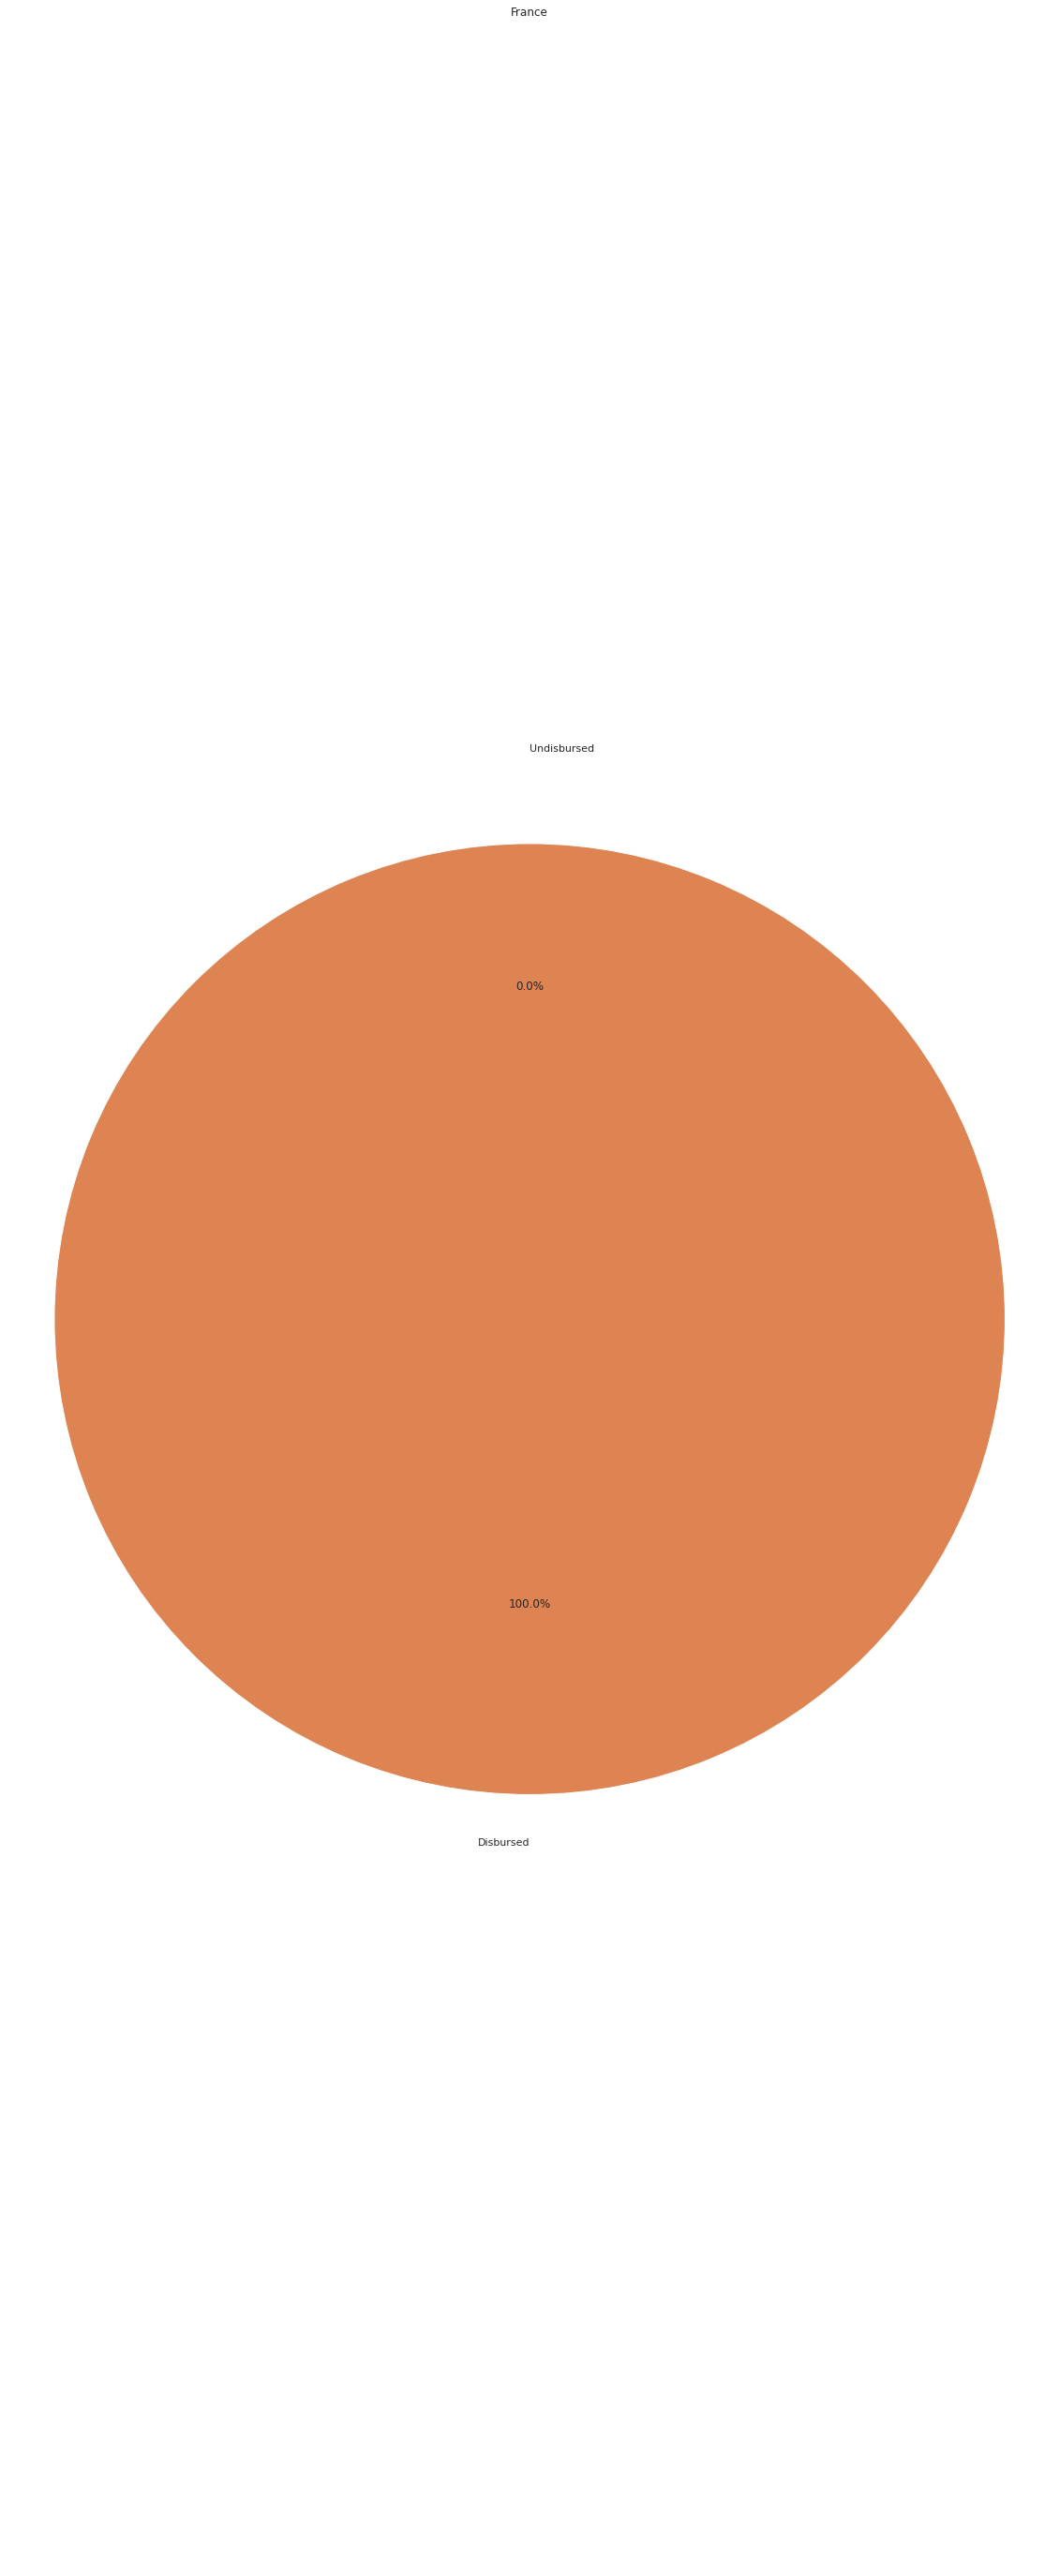

<Figure size 360x360 with 0 Axes>

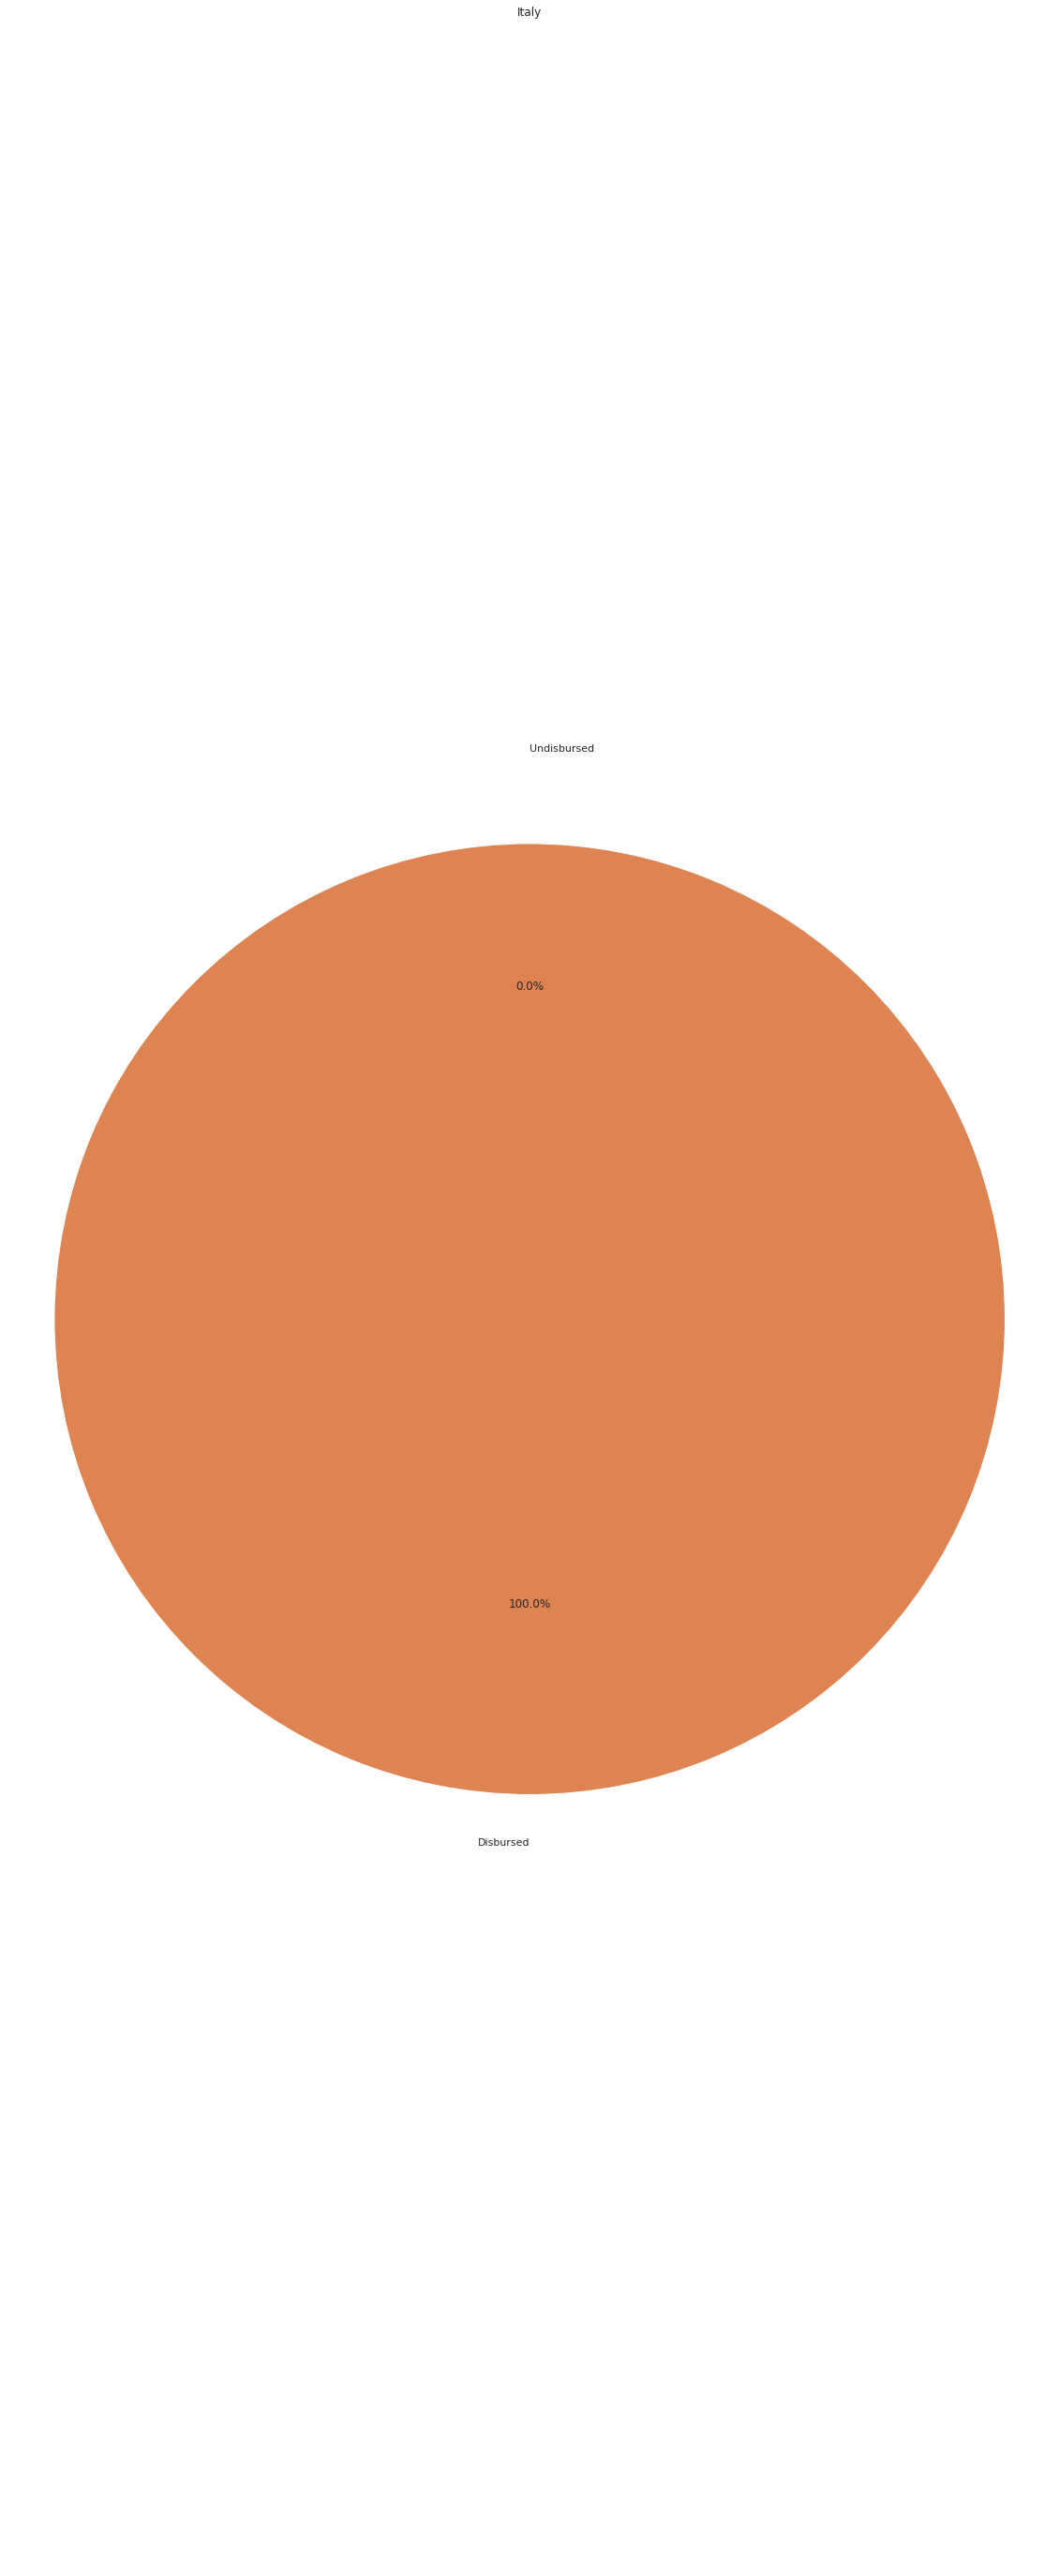

<Figure size 360x360 with 0 Axes>

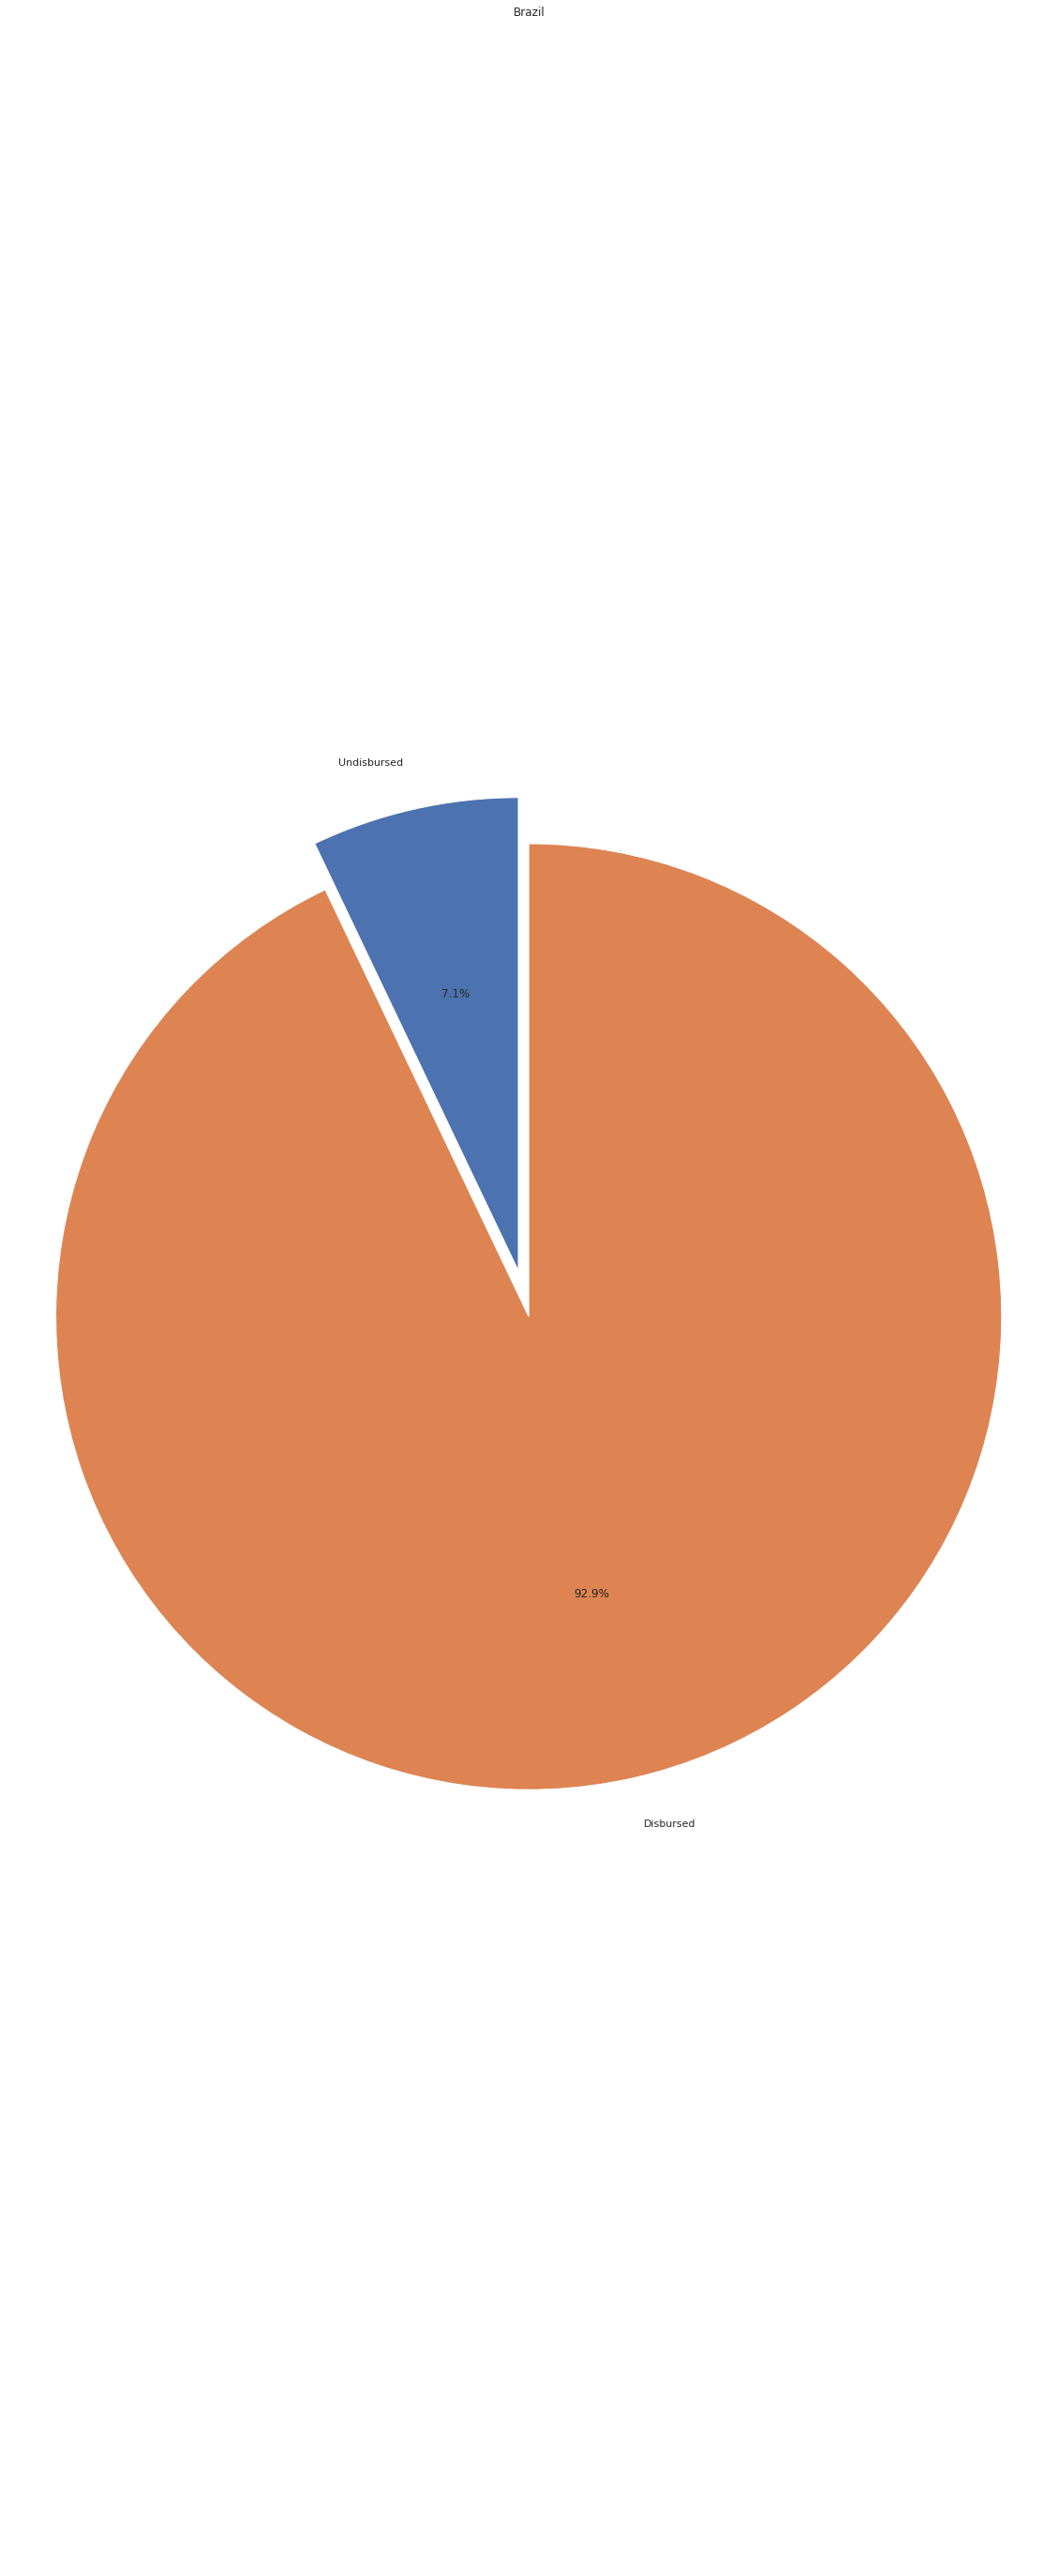

<Figure size 360x360 with 0 Axes>

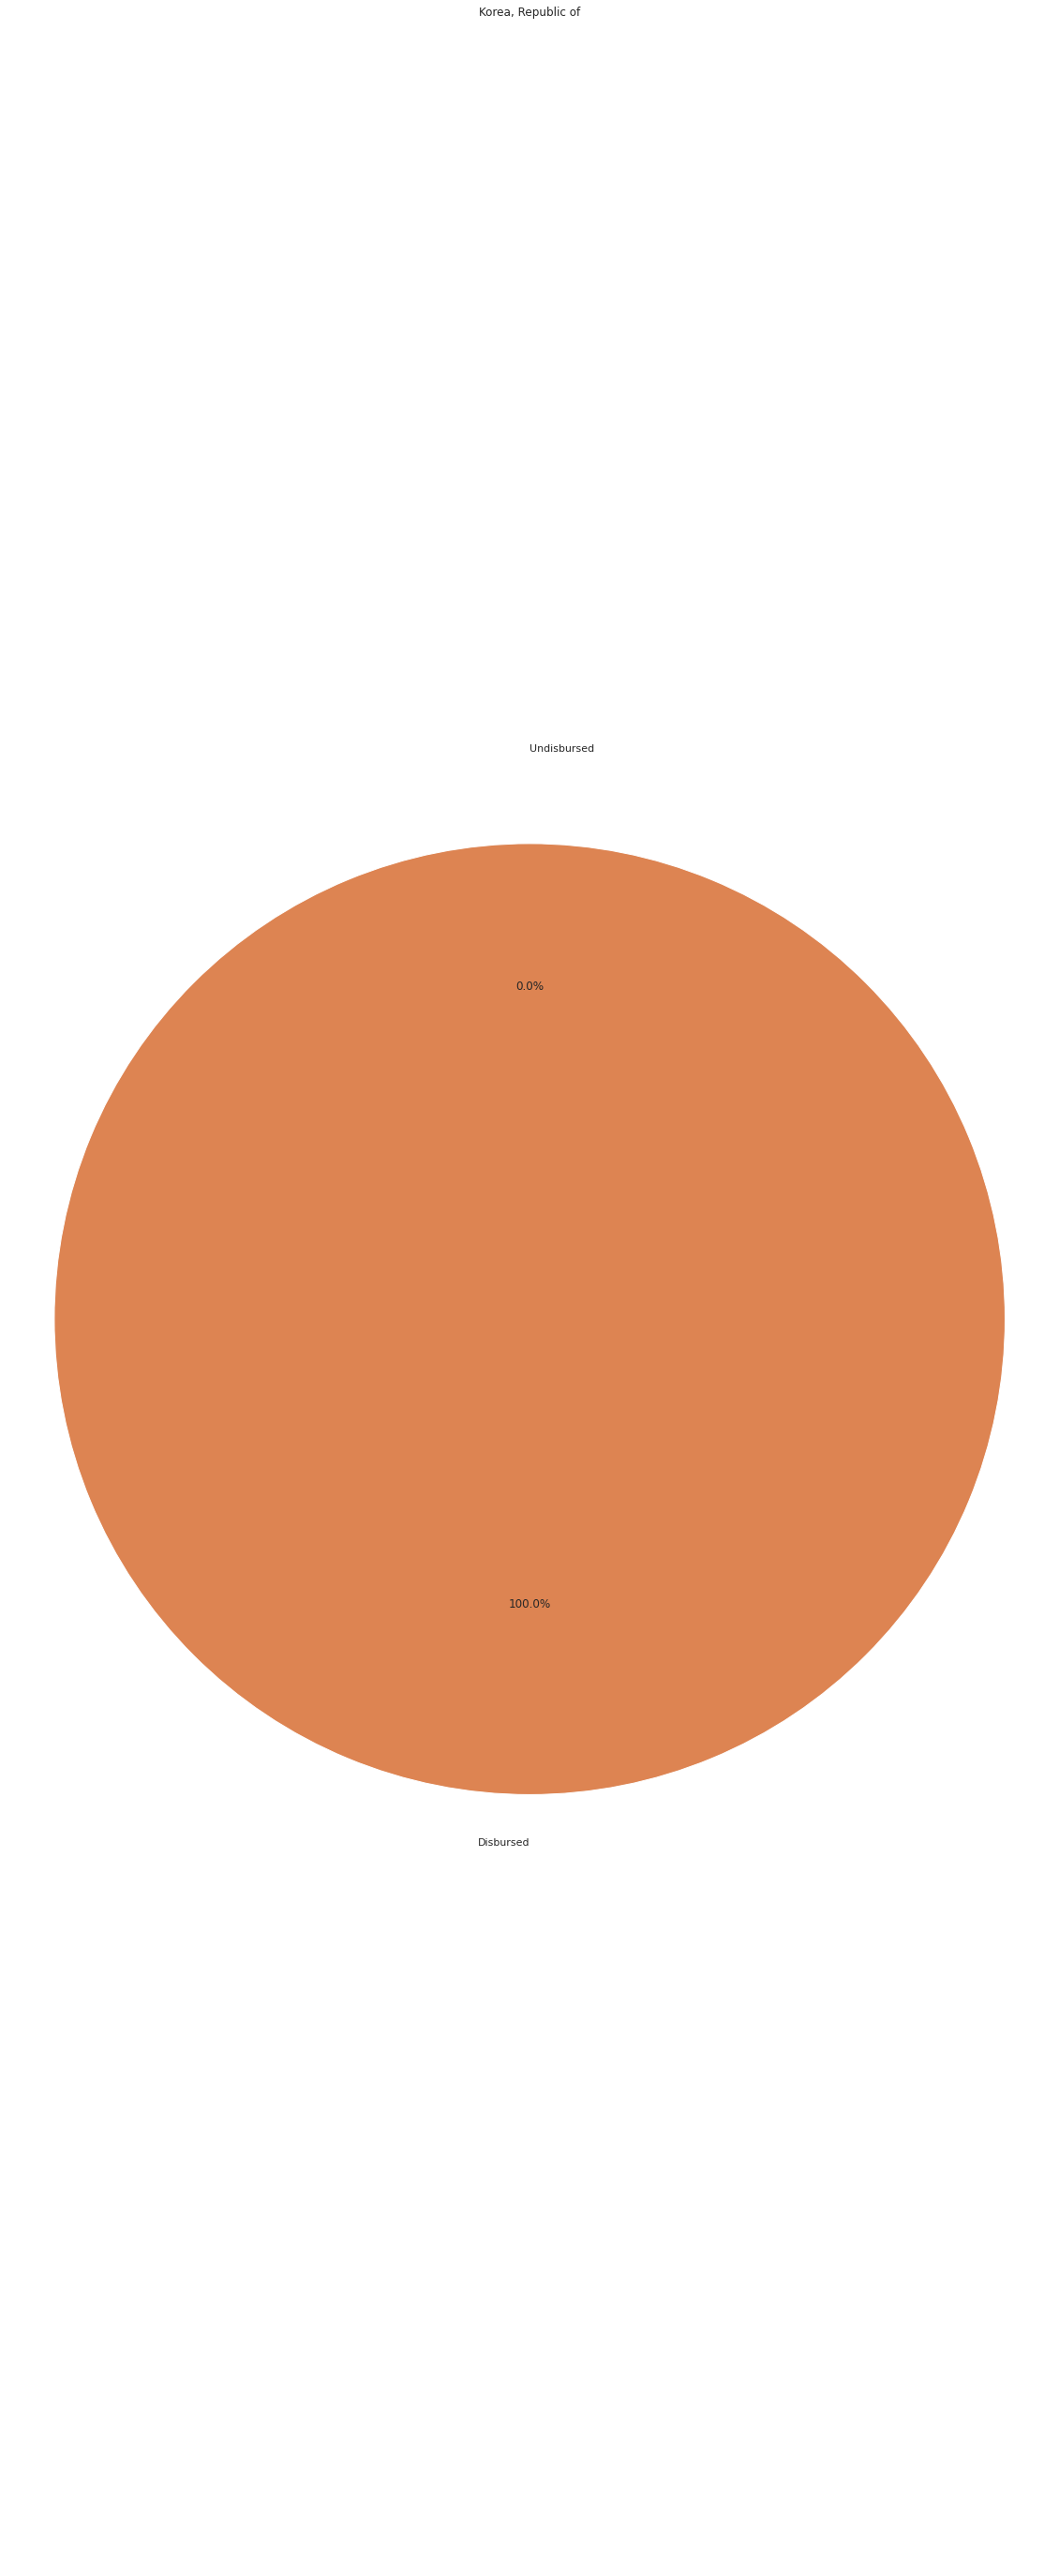

<Figure size 360x360 with 0 Axes>

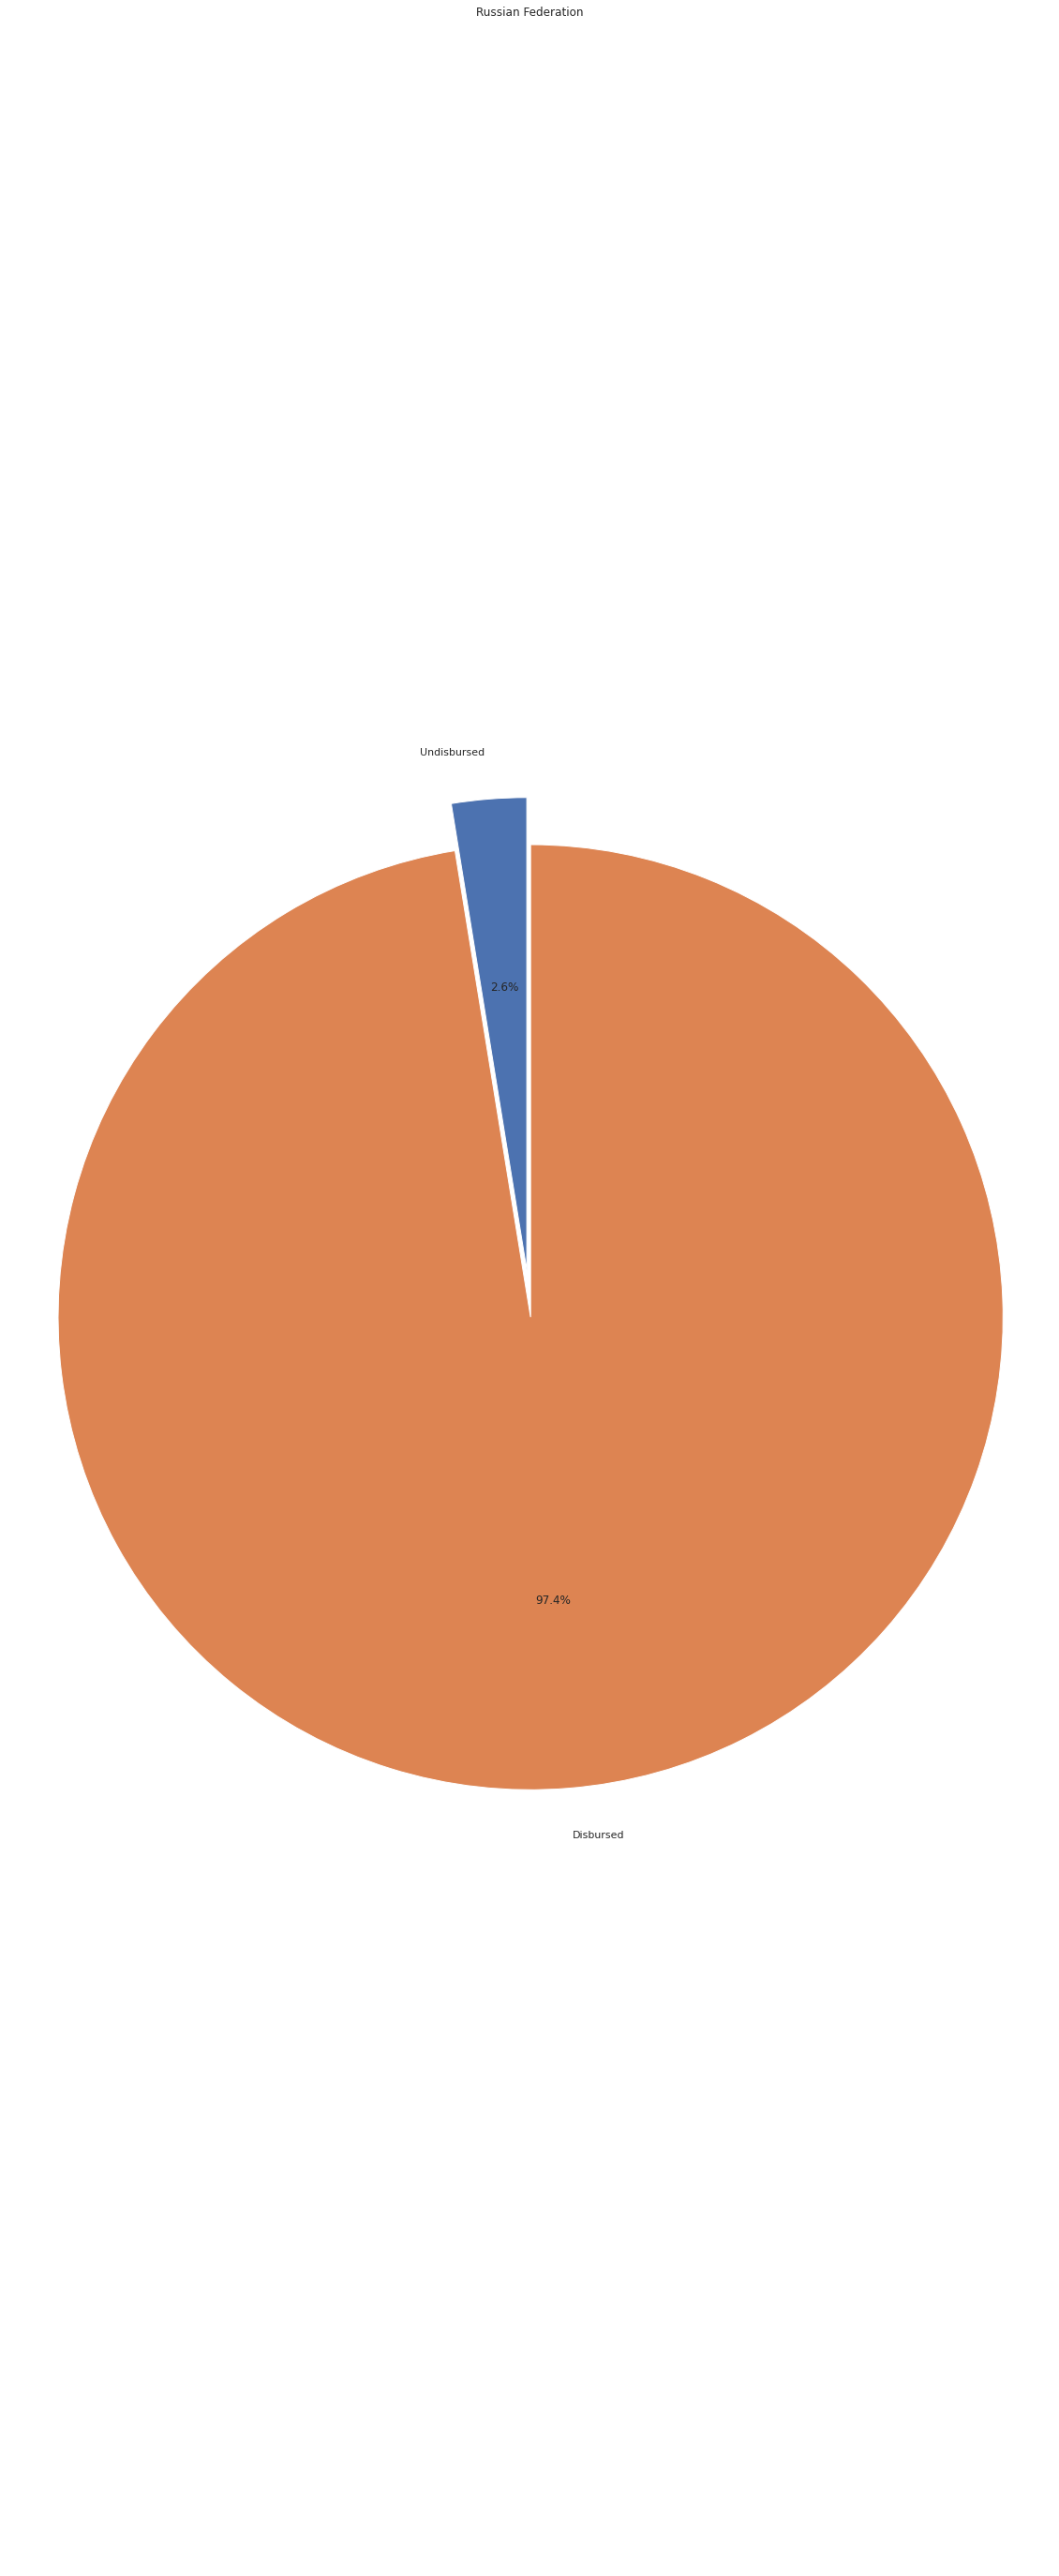

<Figure size 360x360 with 0 Axes>

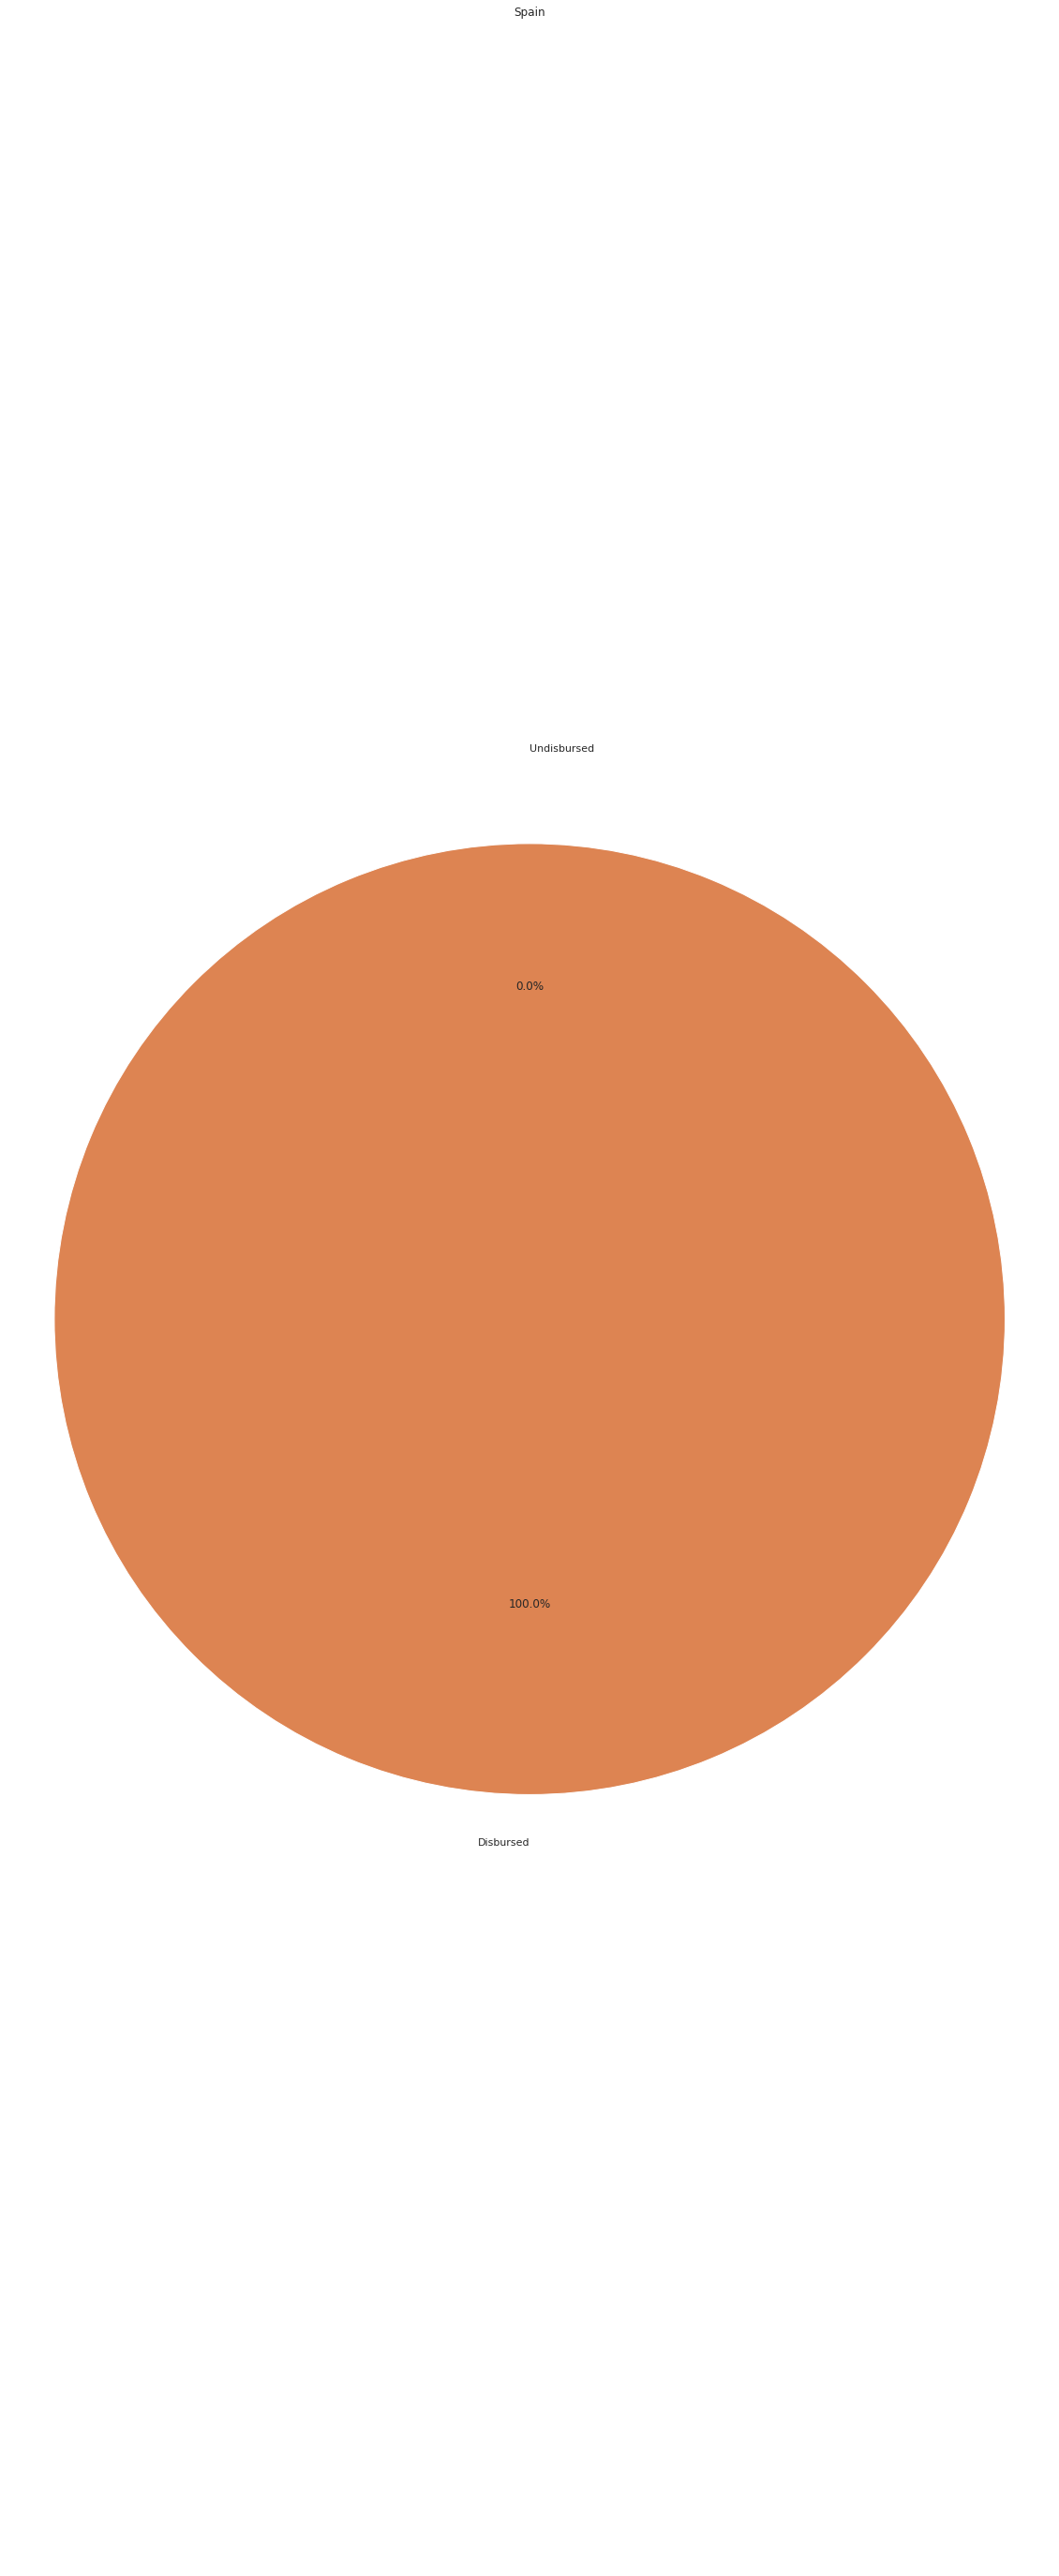

<Figure size 360x360 with 0 Axes>

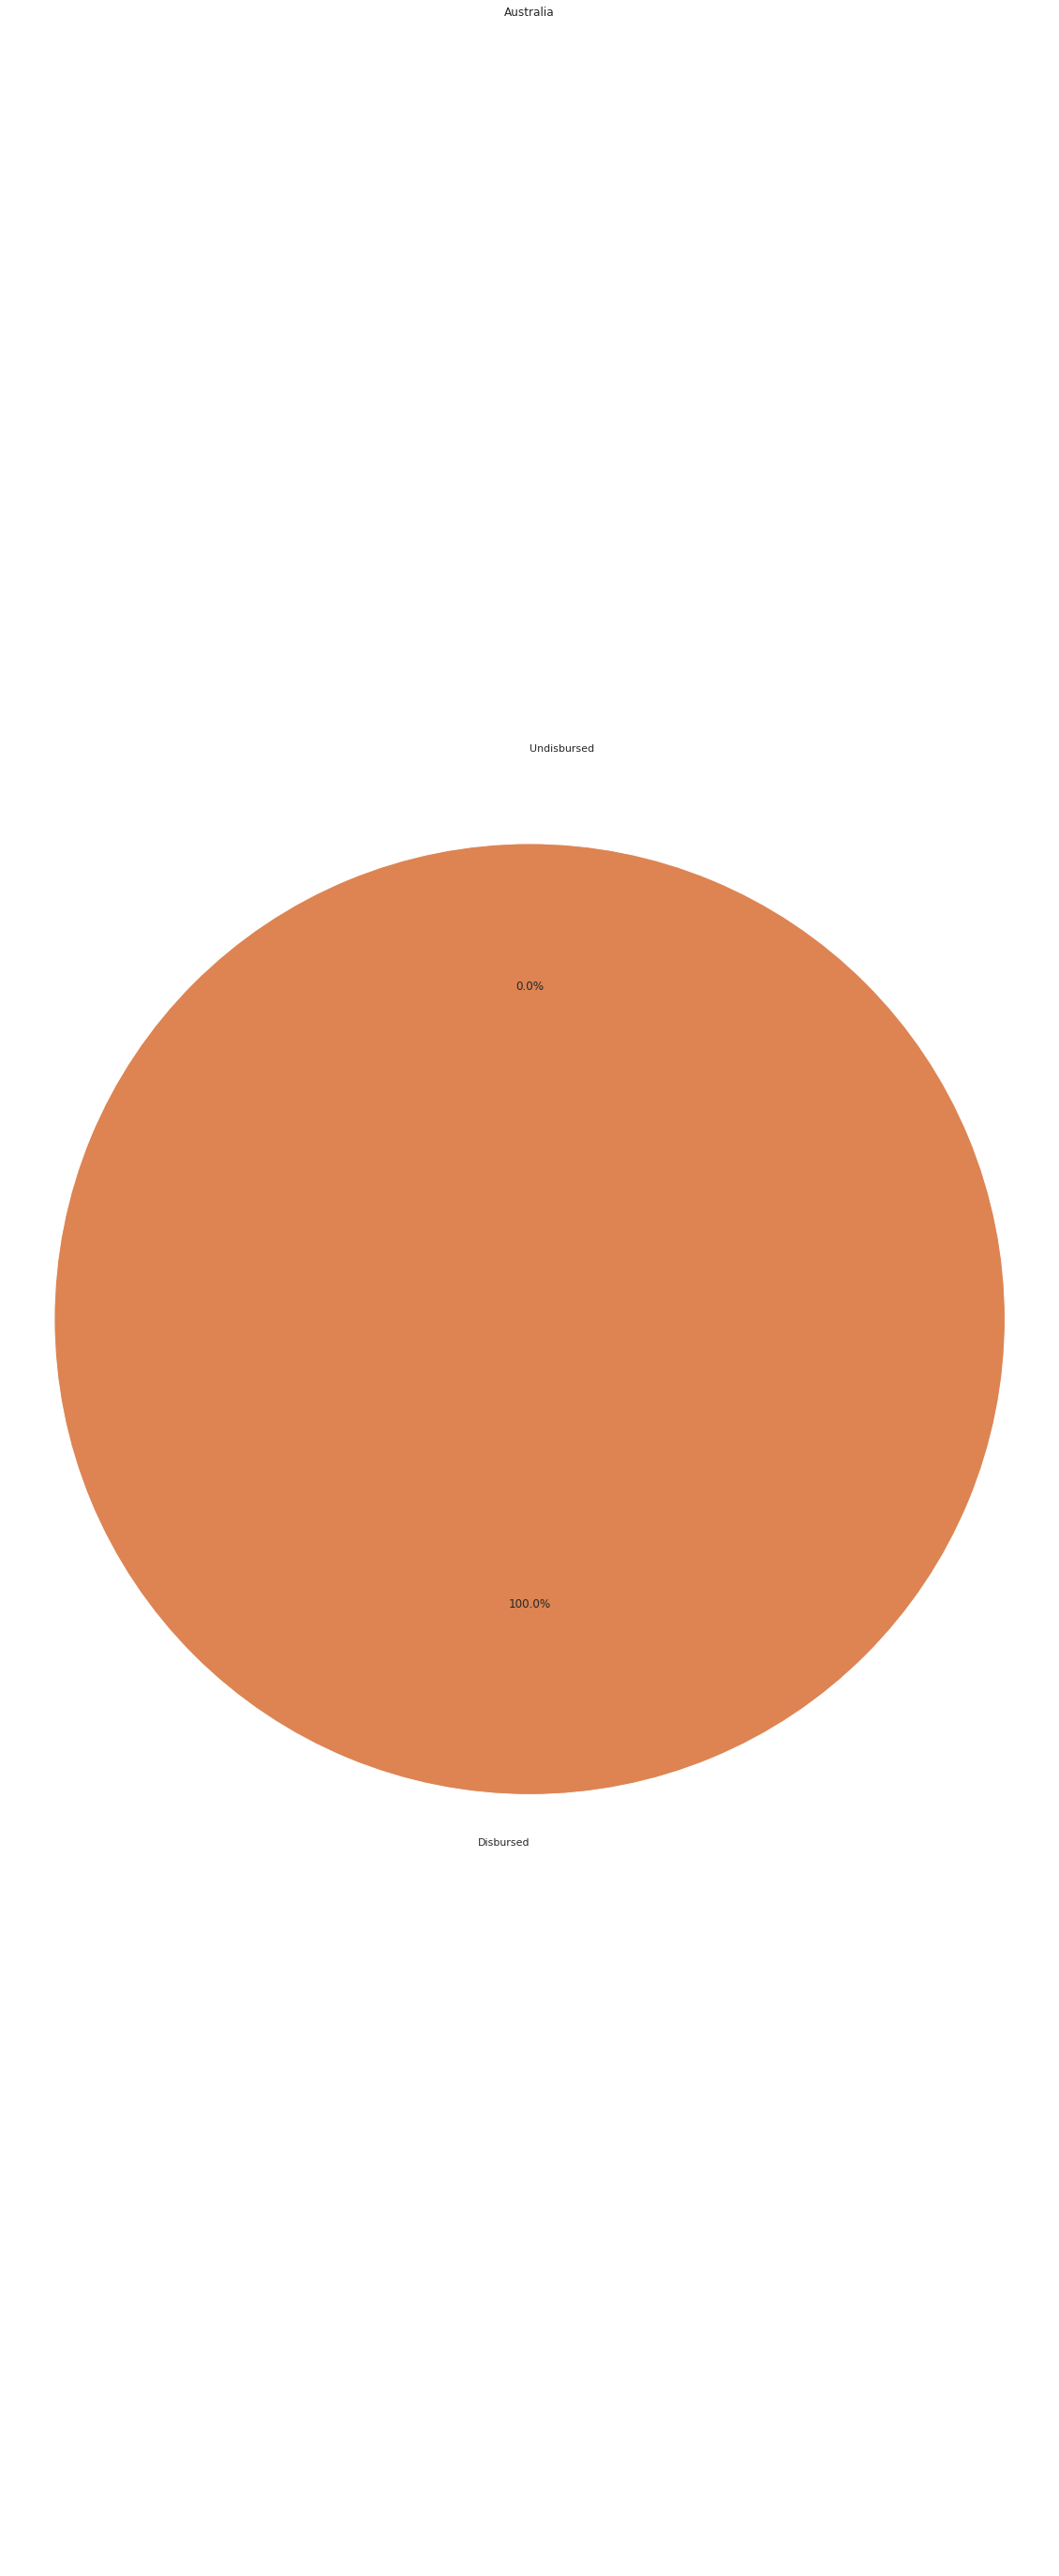

<Figure size 360x360 with 0 Axes>

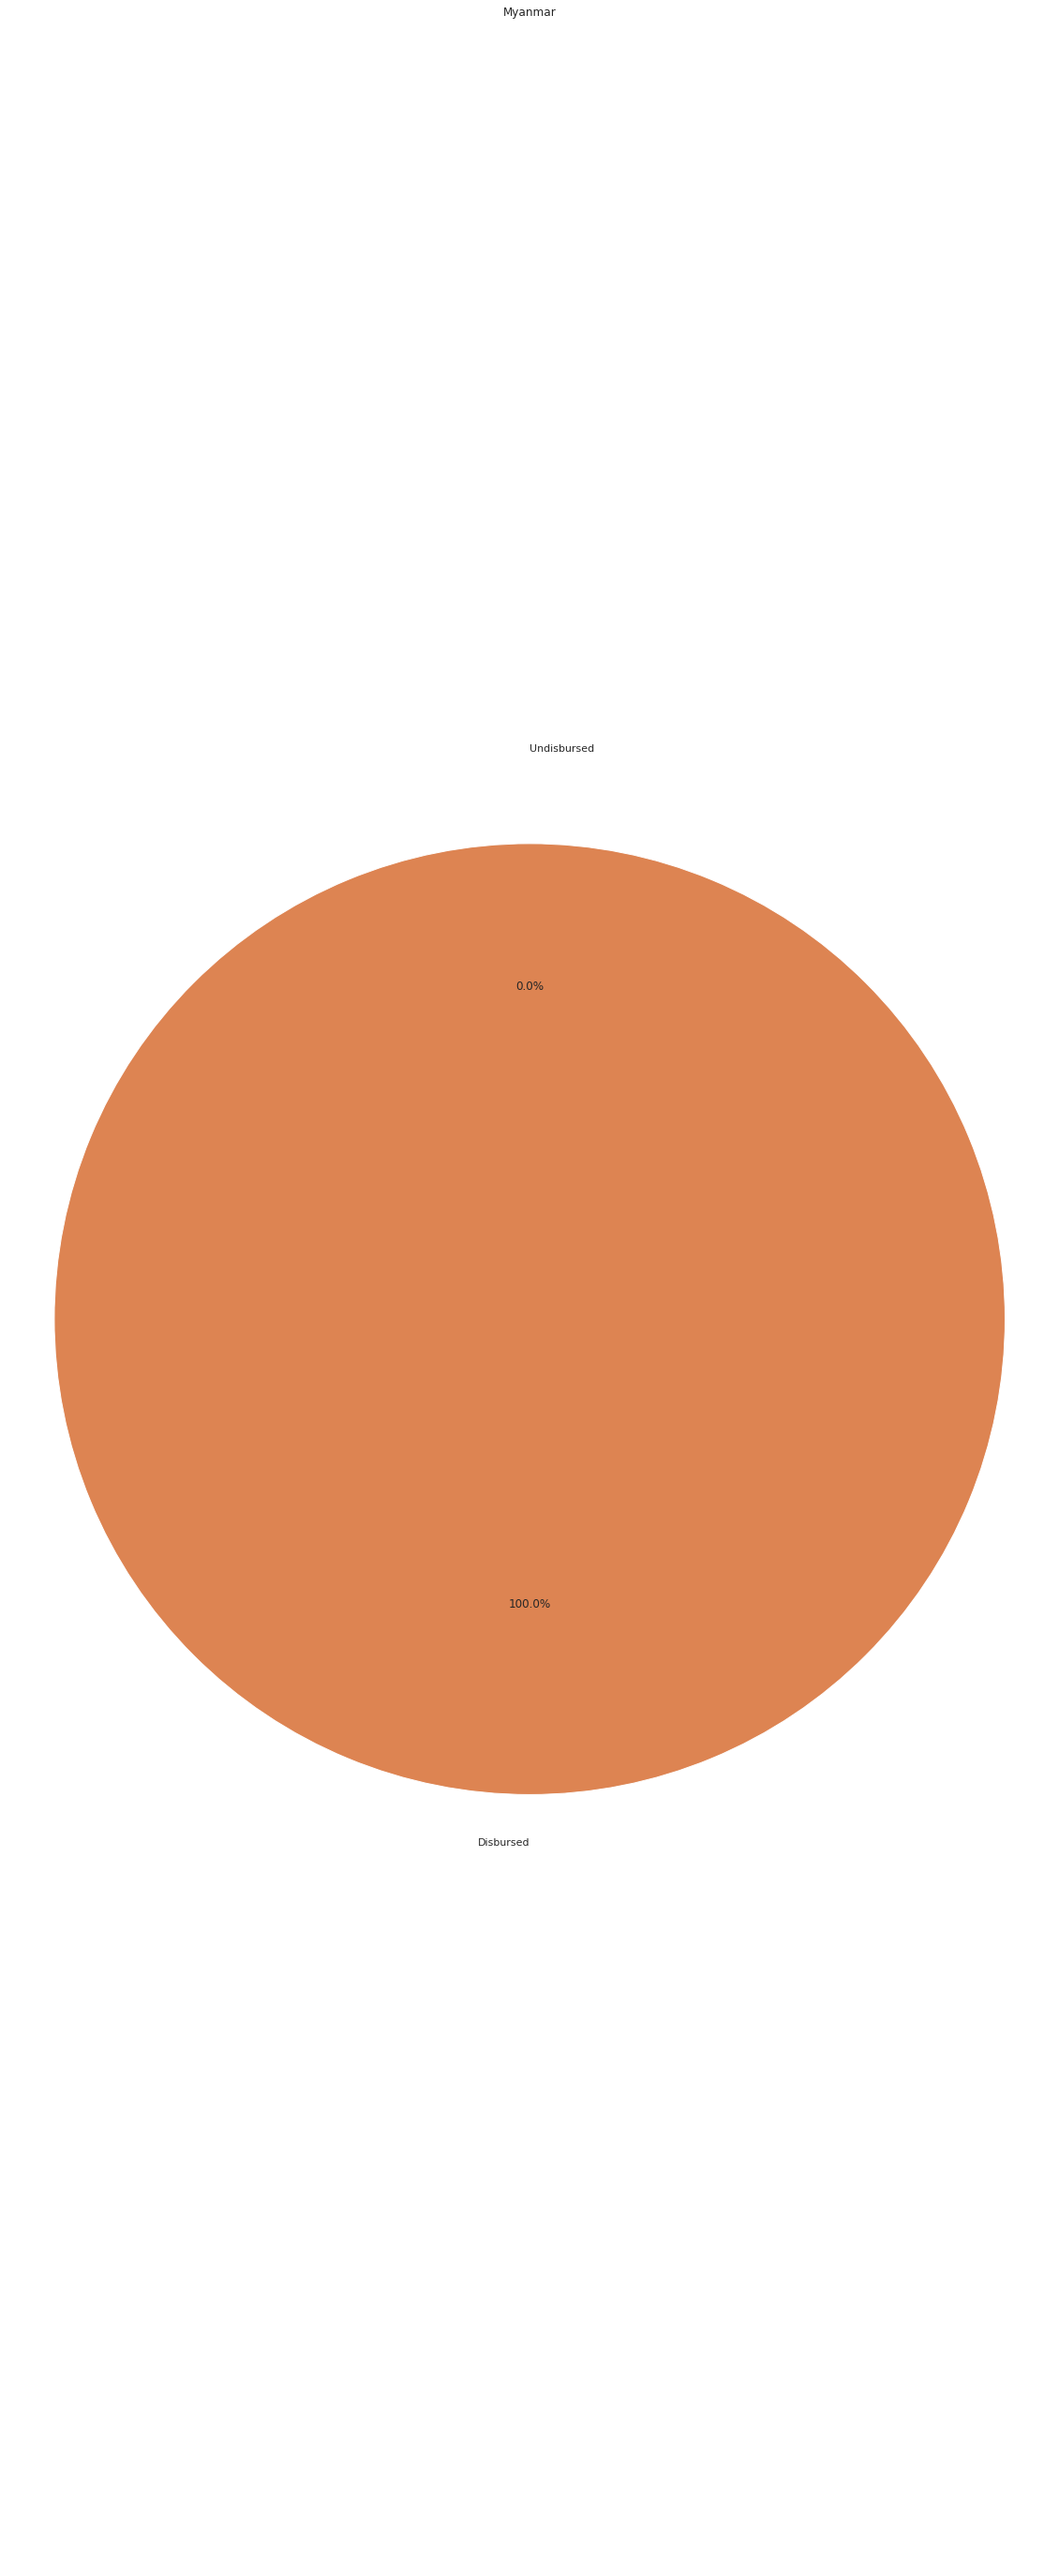

<Figure size 360x360 with 0 Axes>

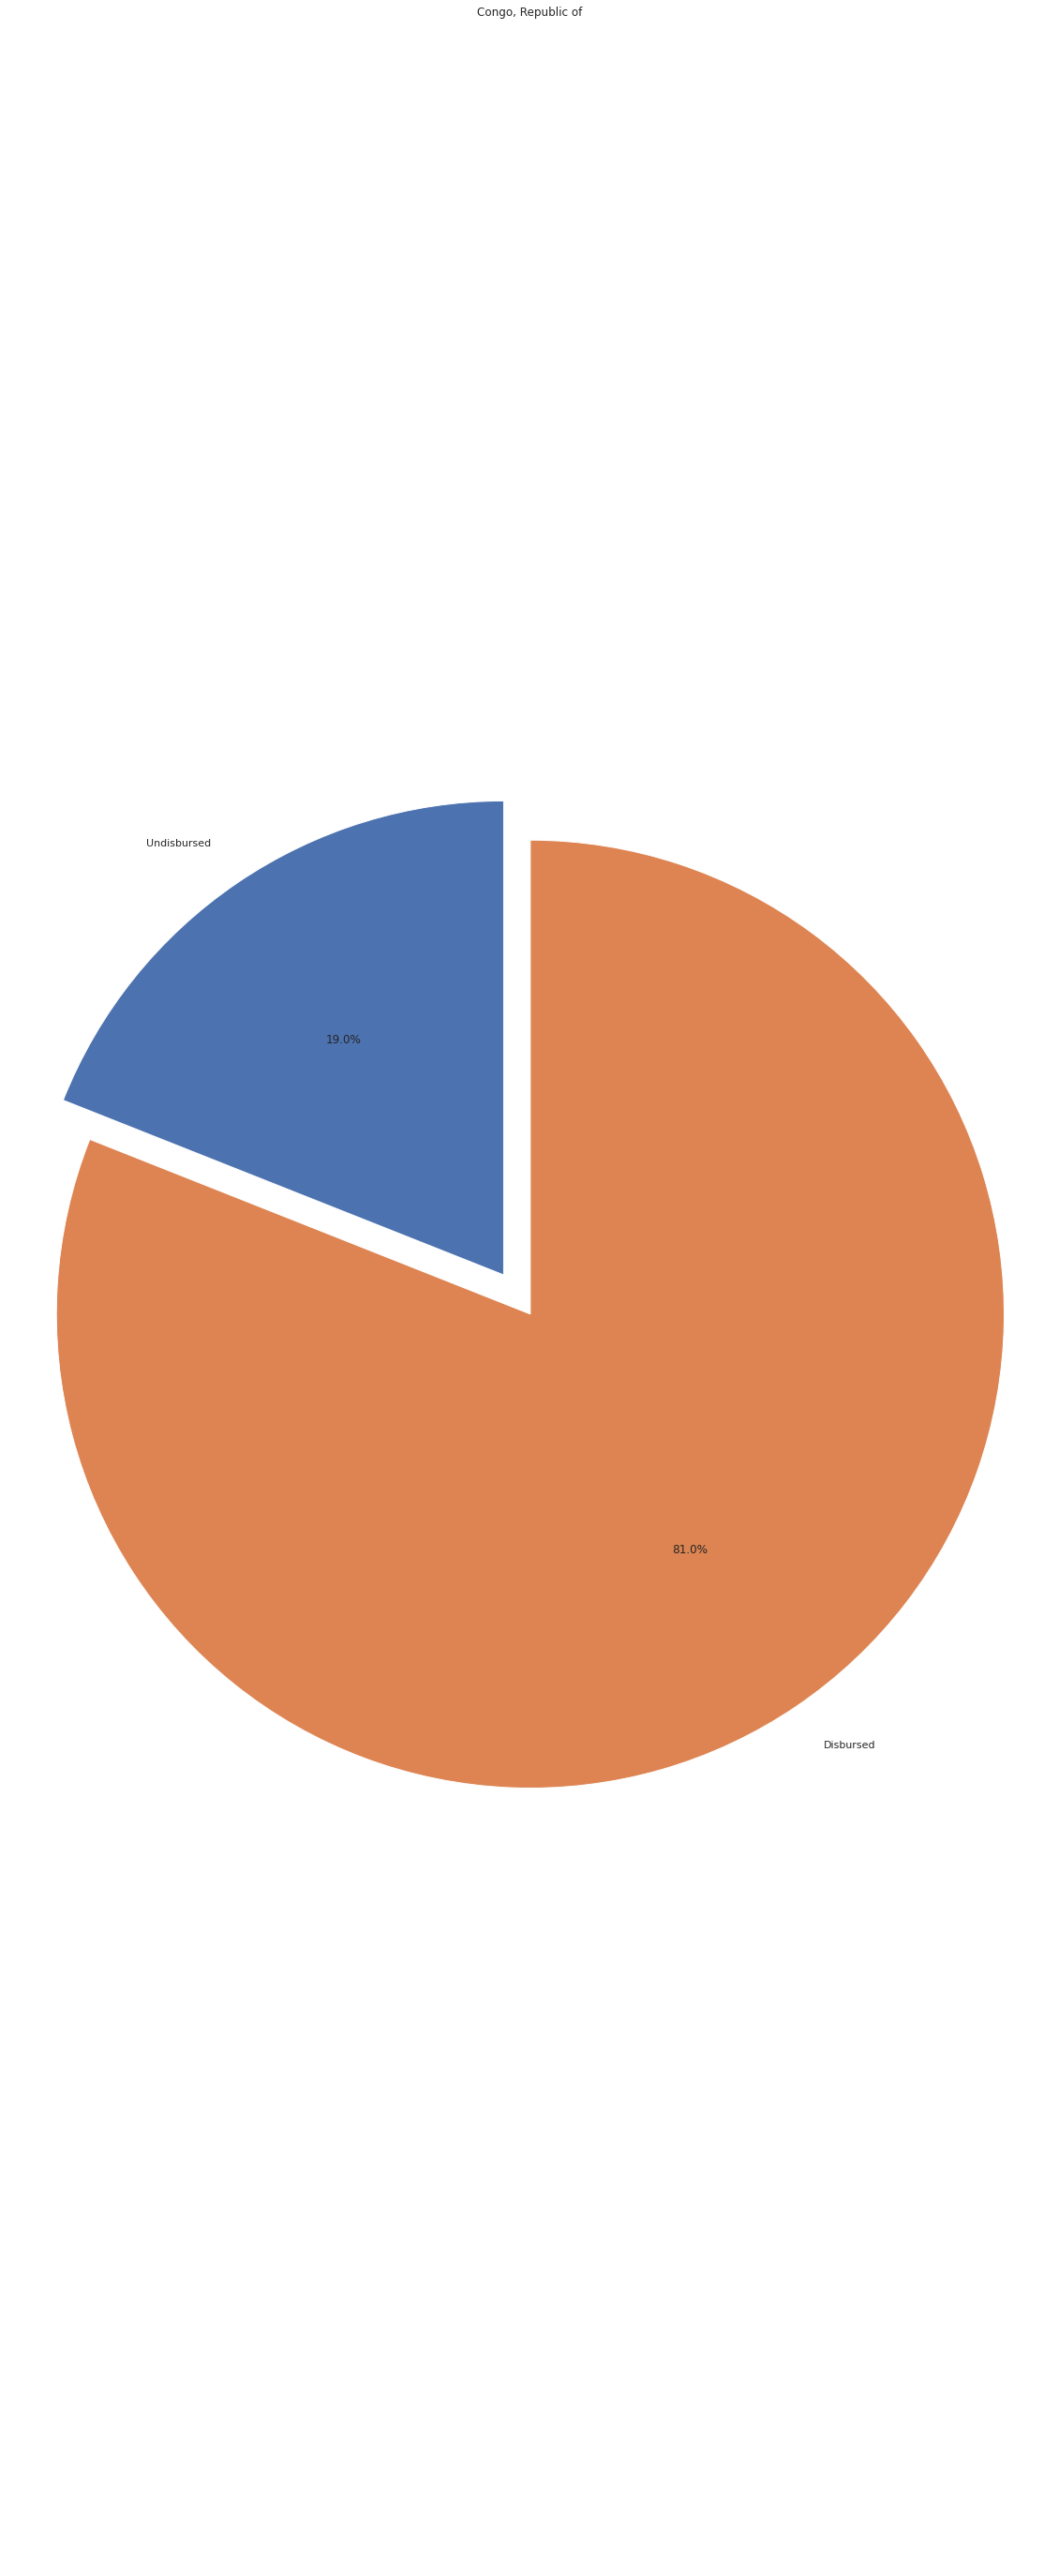

<Figure size 360x360 with 0 Axes>

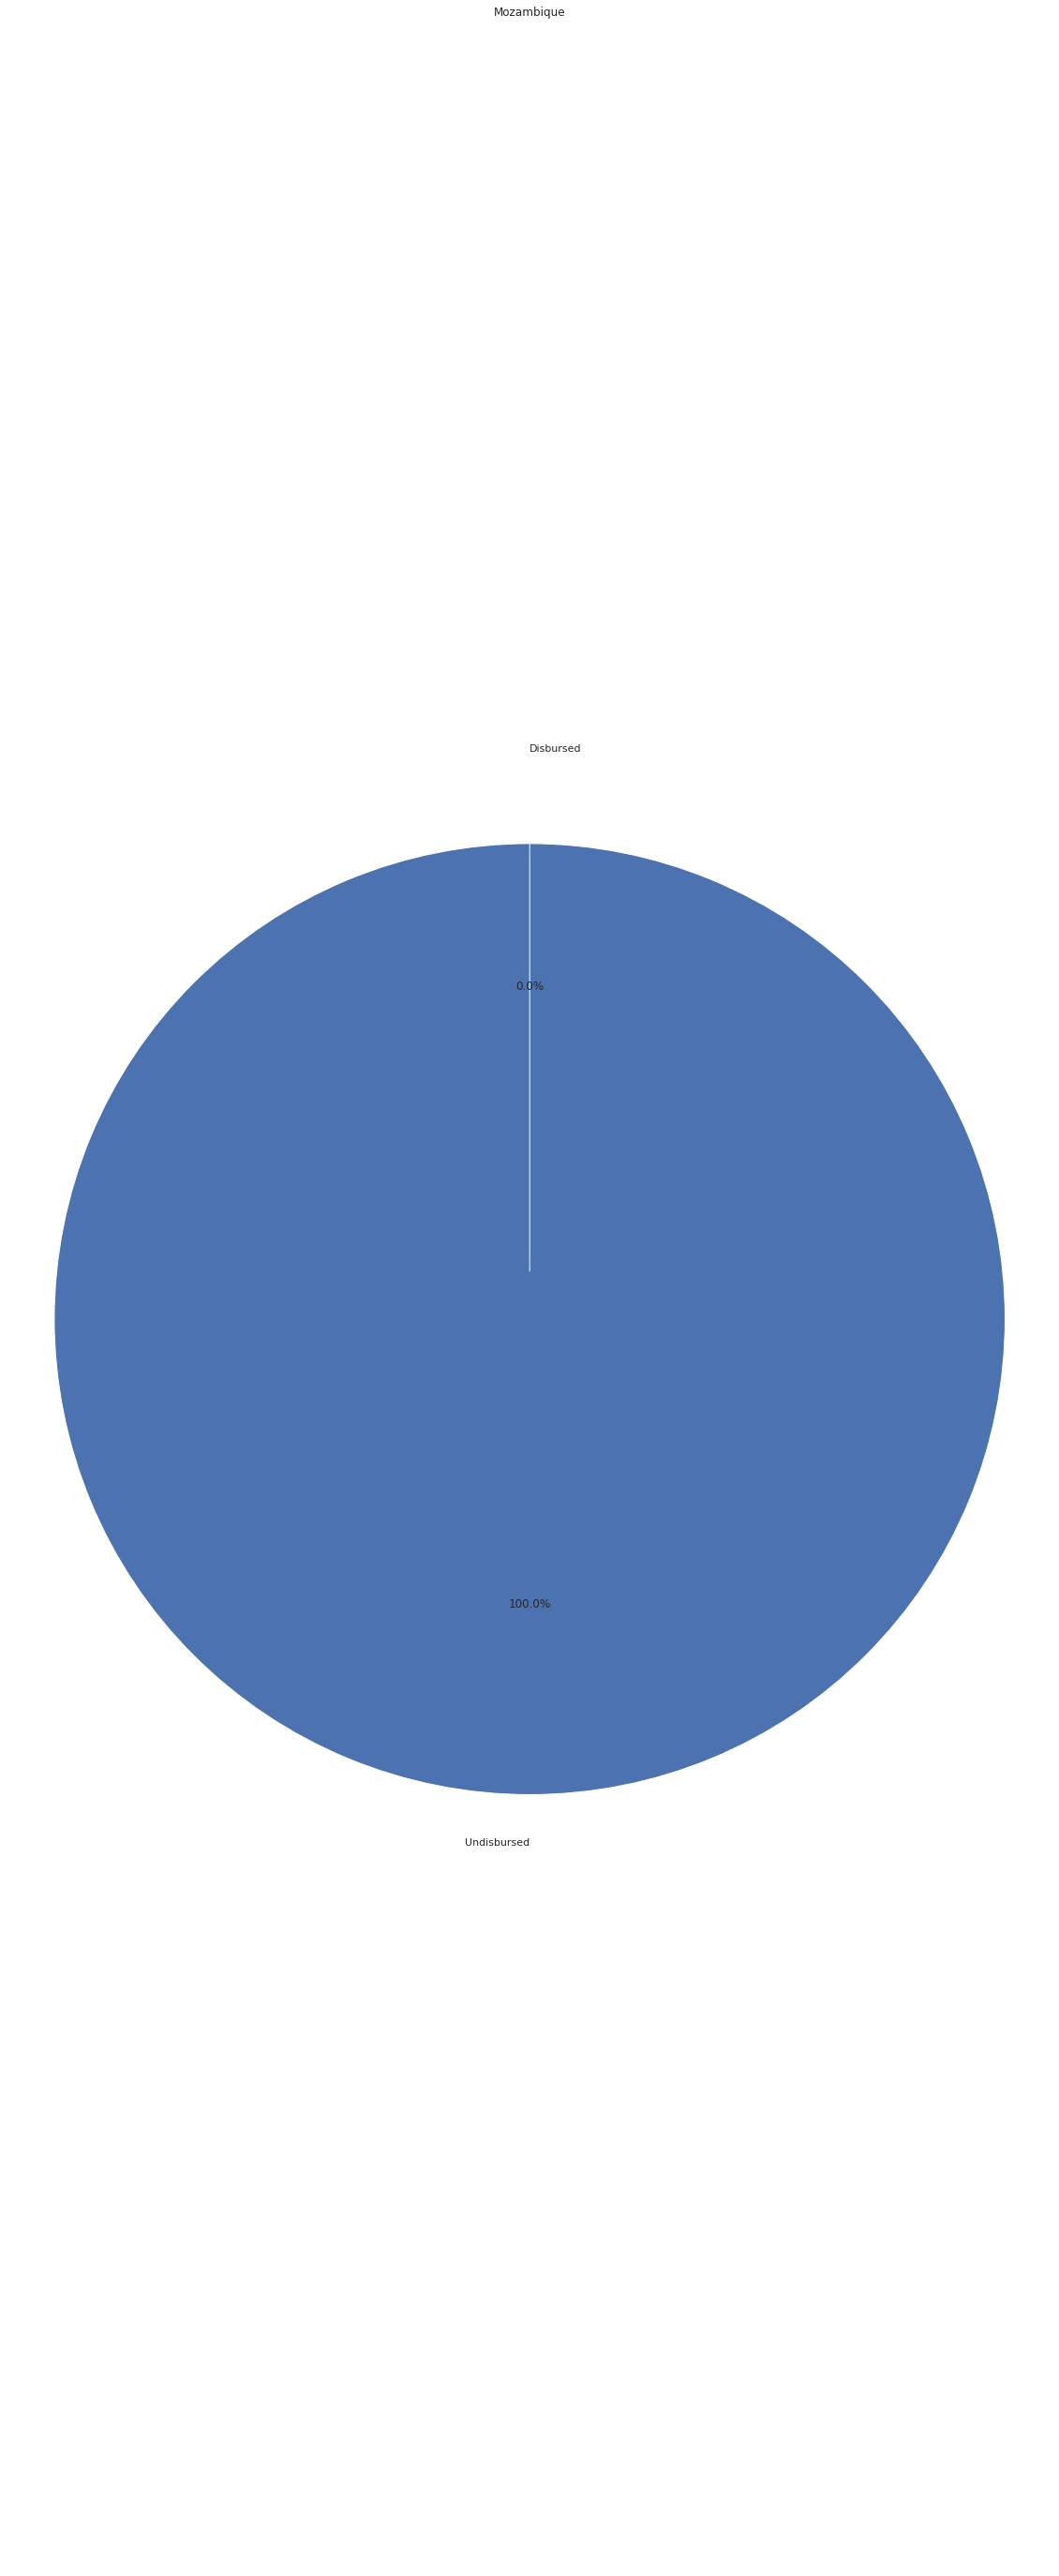

<Figure size 360x360 with 0 Axes>

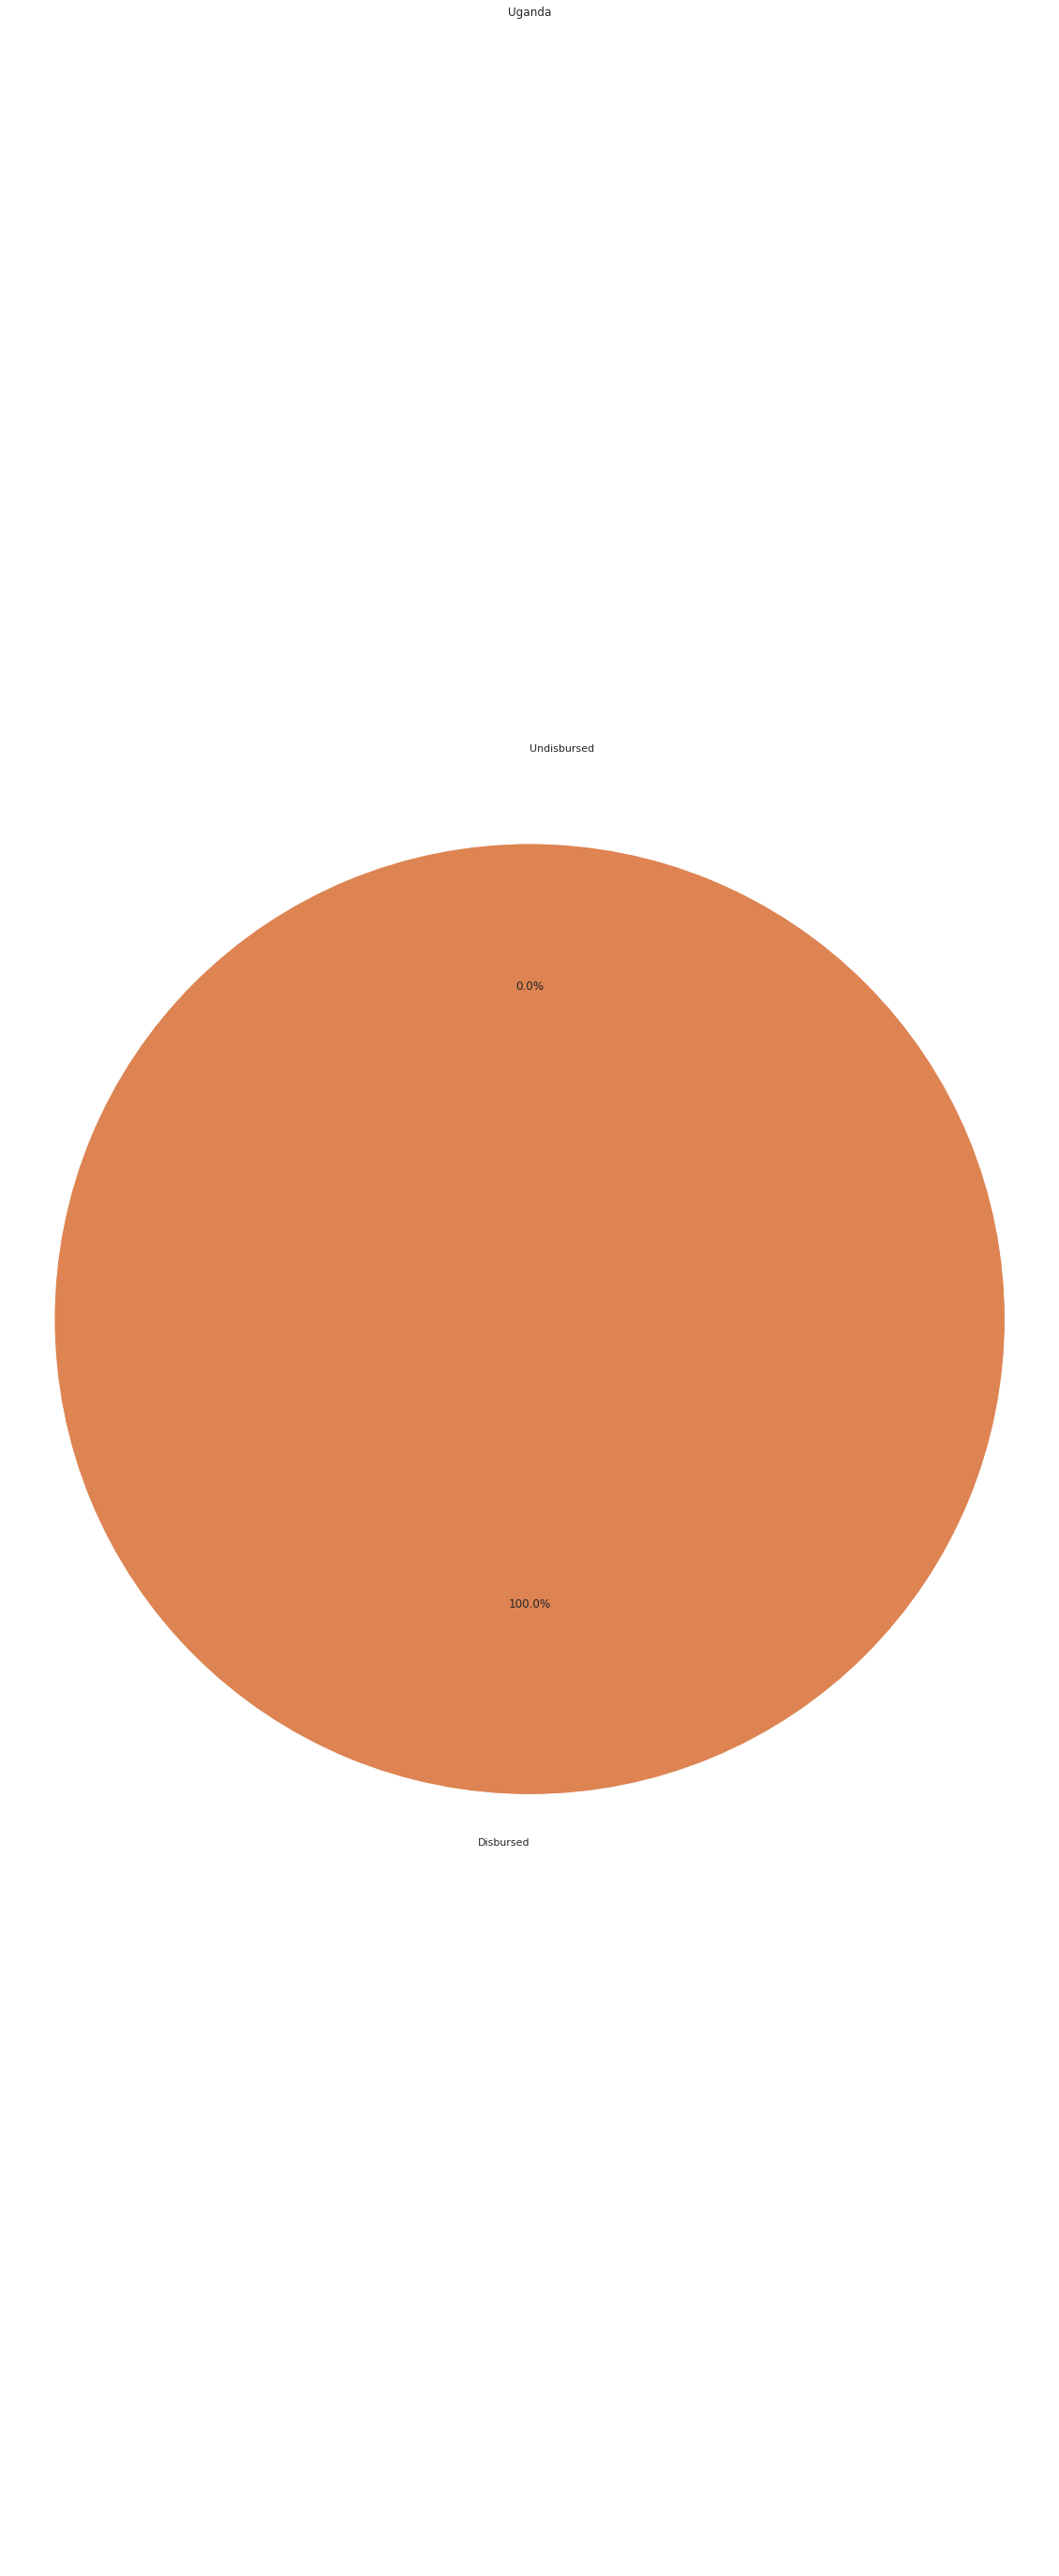

<Figure size 360x360 with 0 Axes>

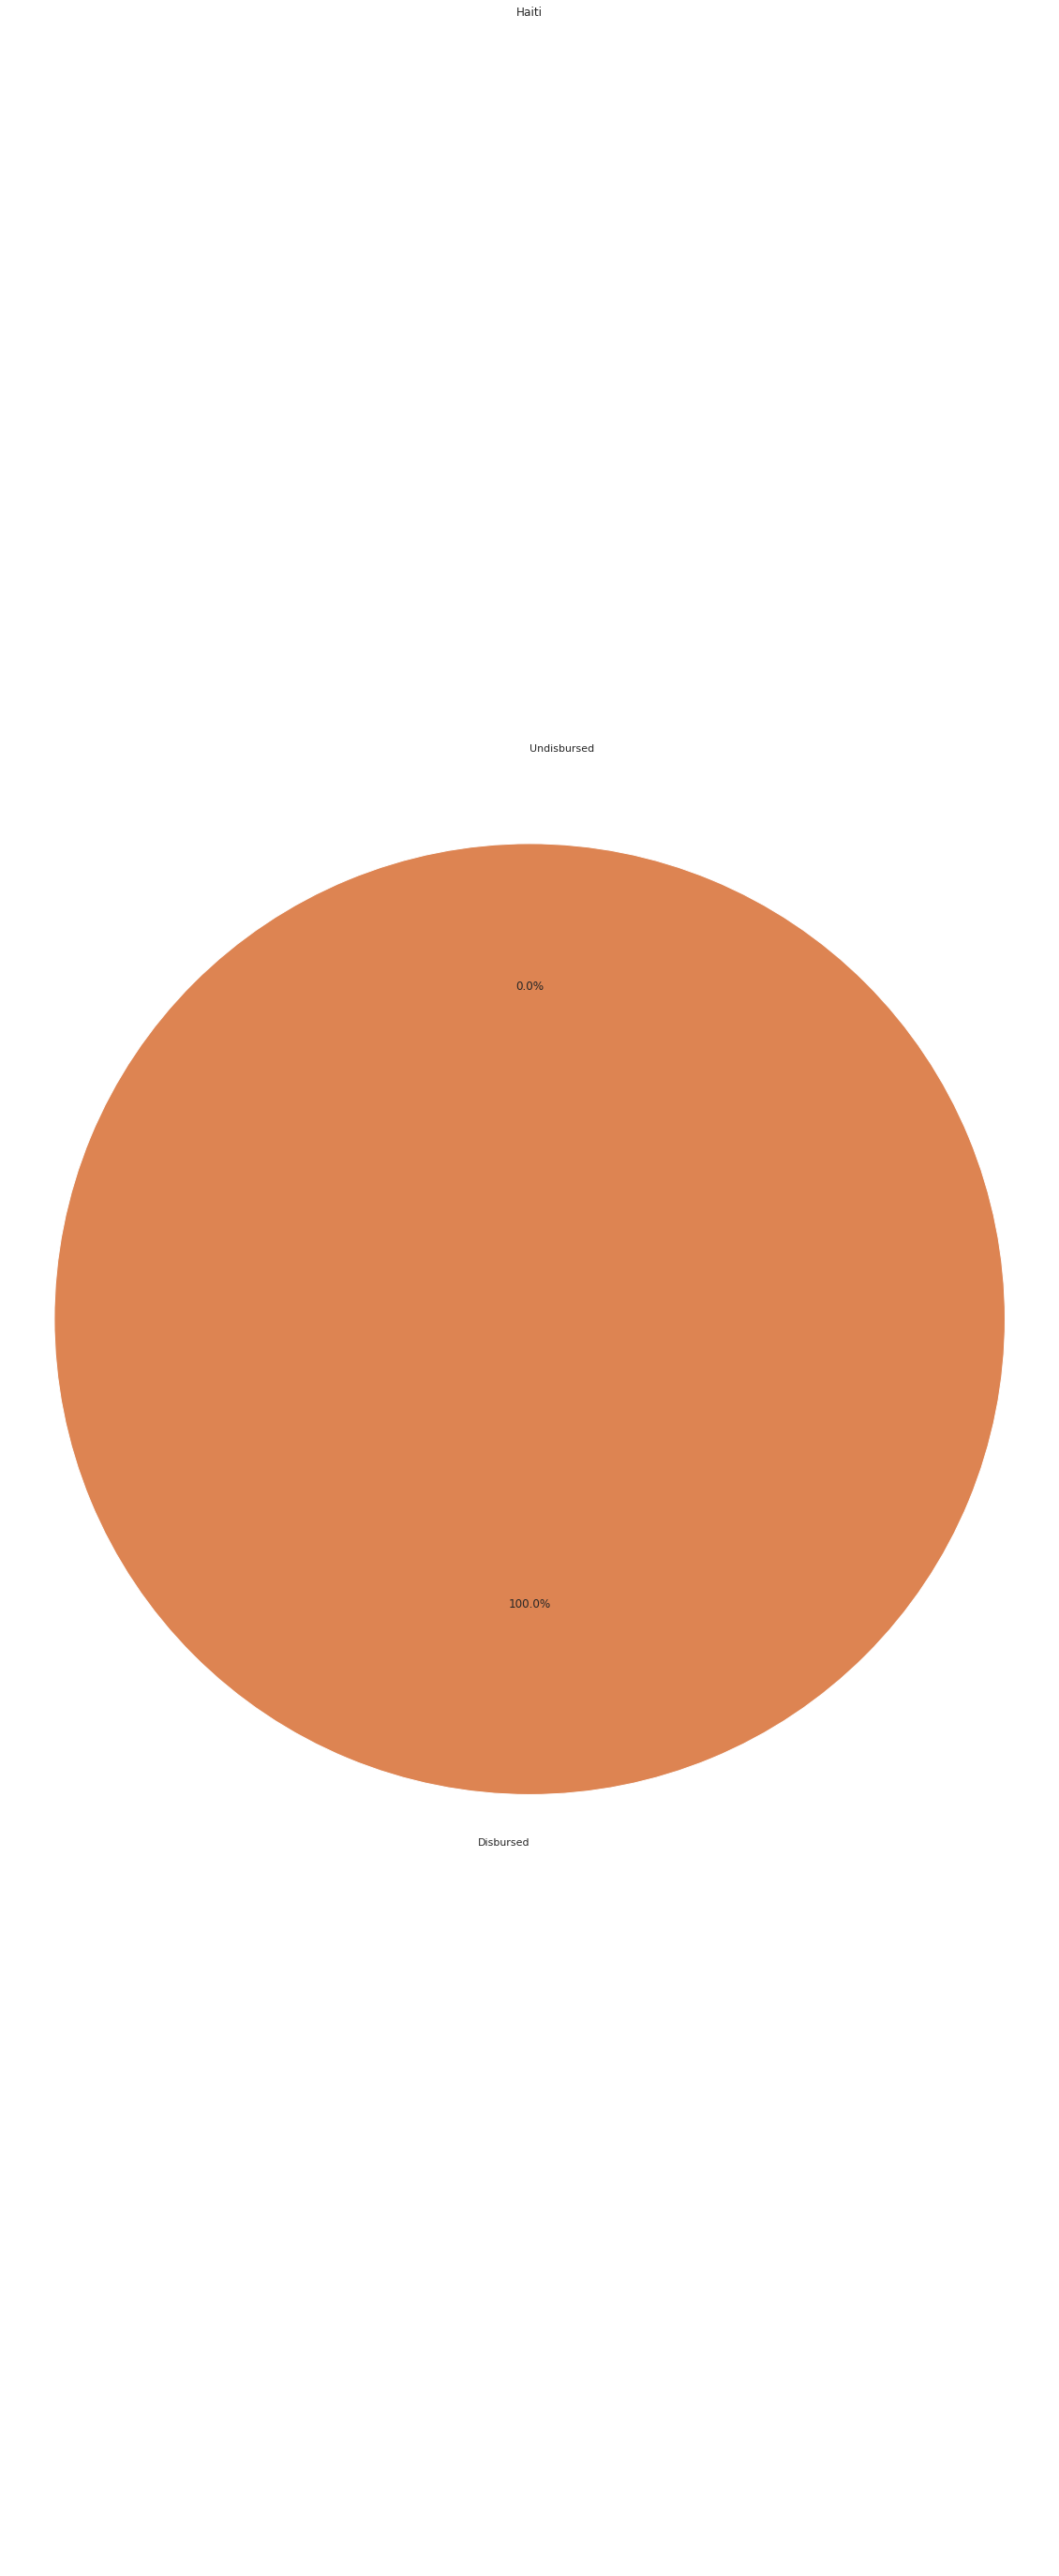

<Figure size 360x360 with 0 Axes>

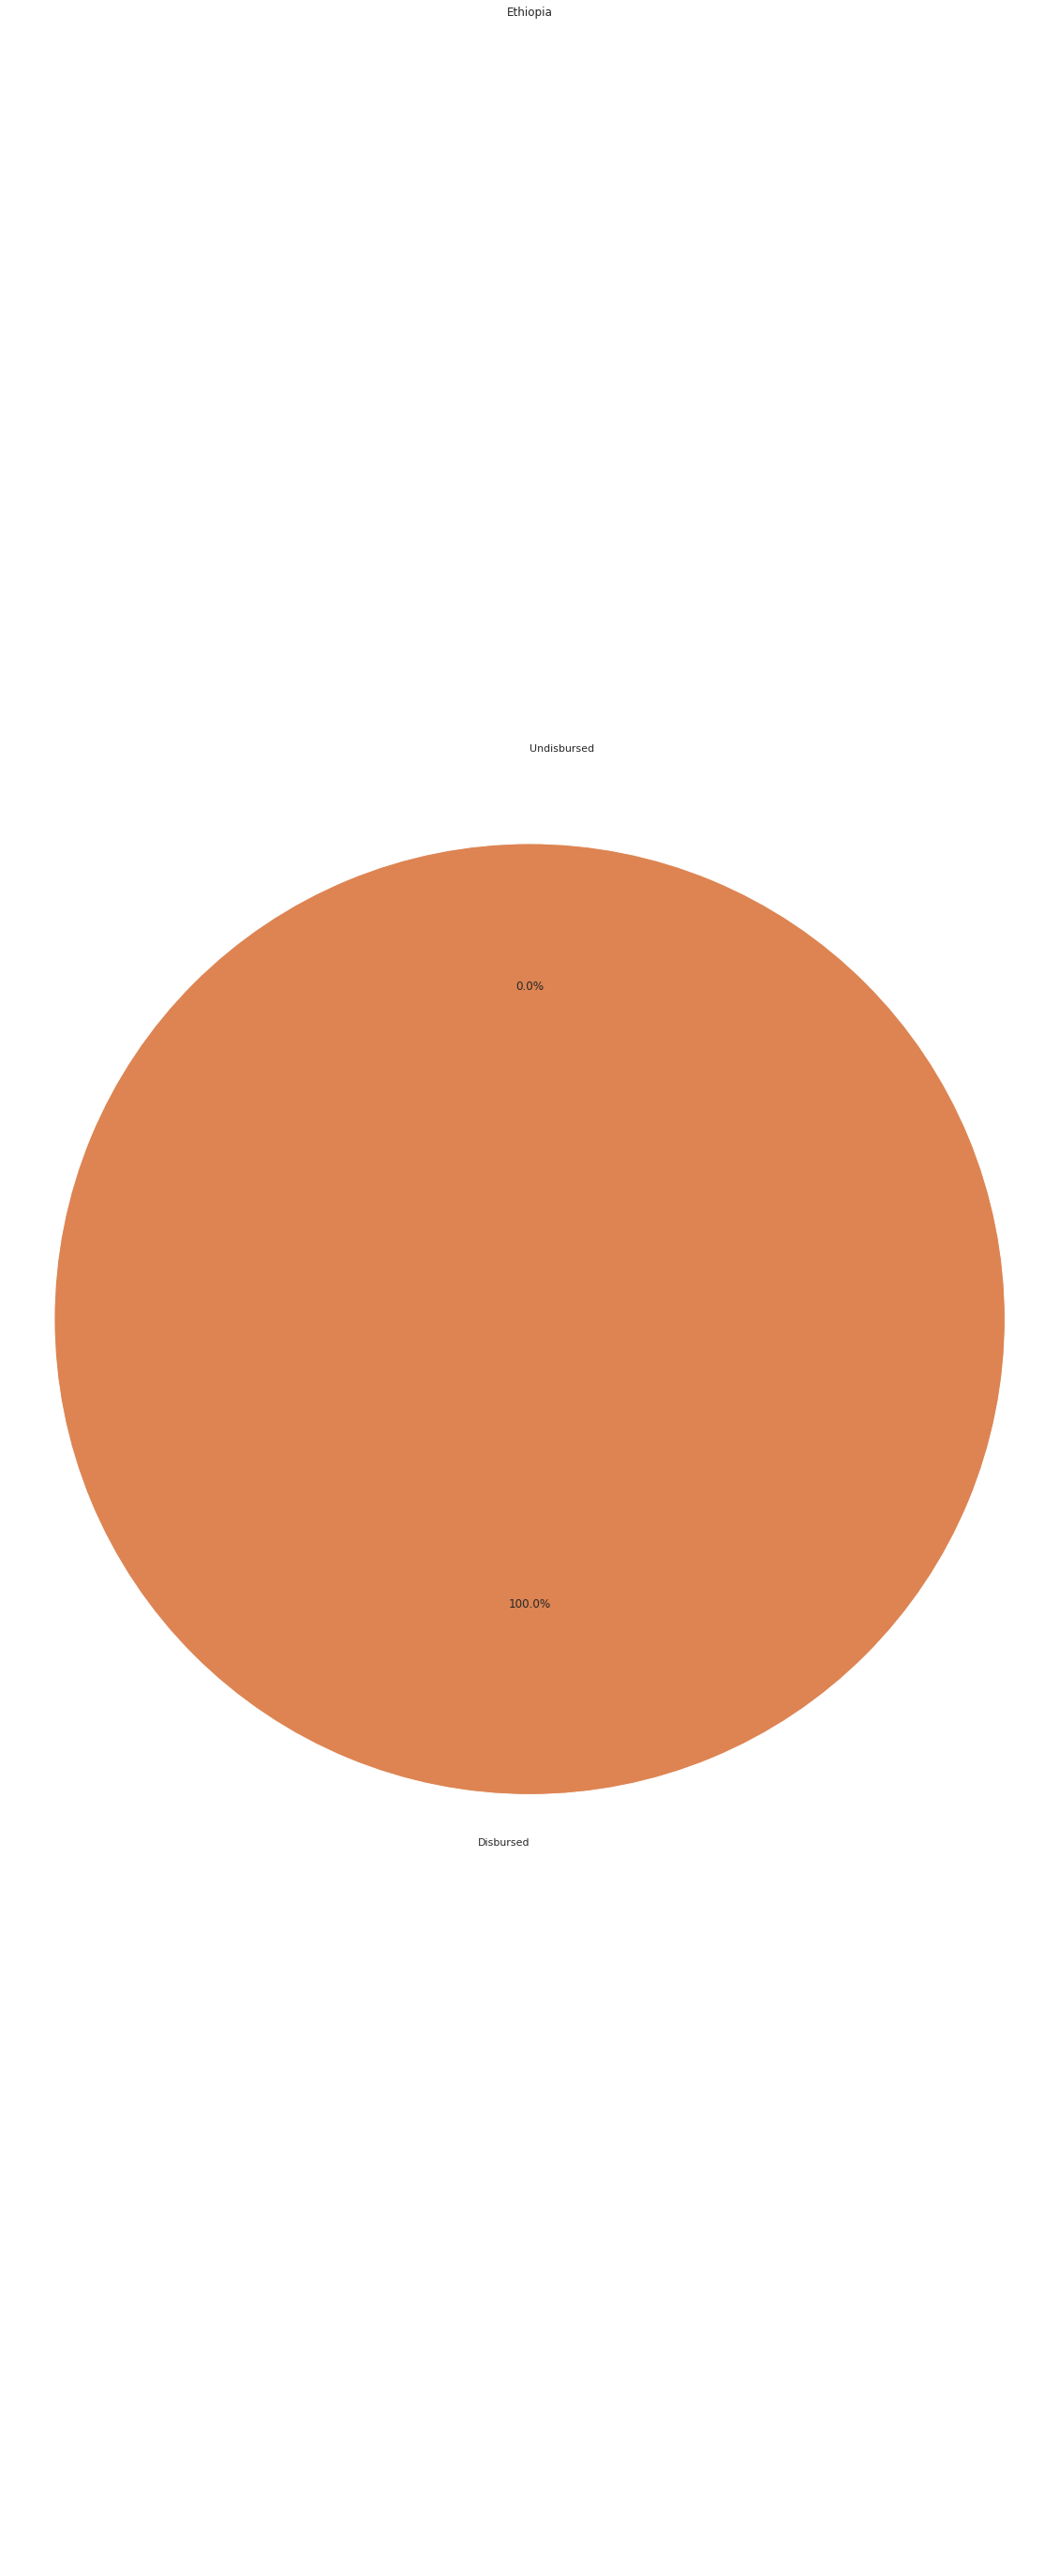

<Figure size 360x360 with 0 Axes>

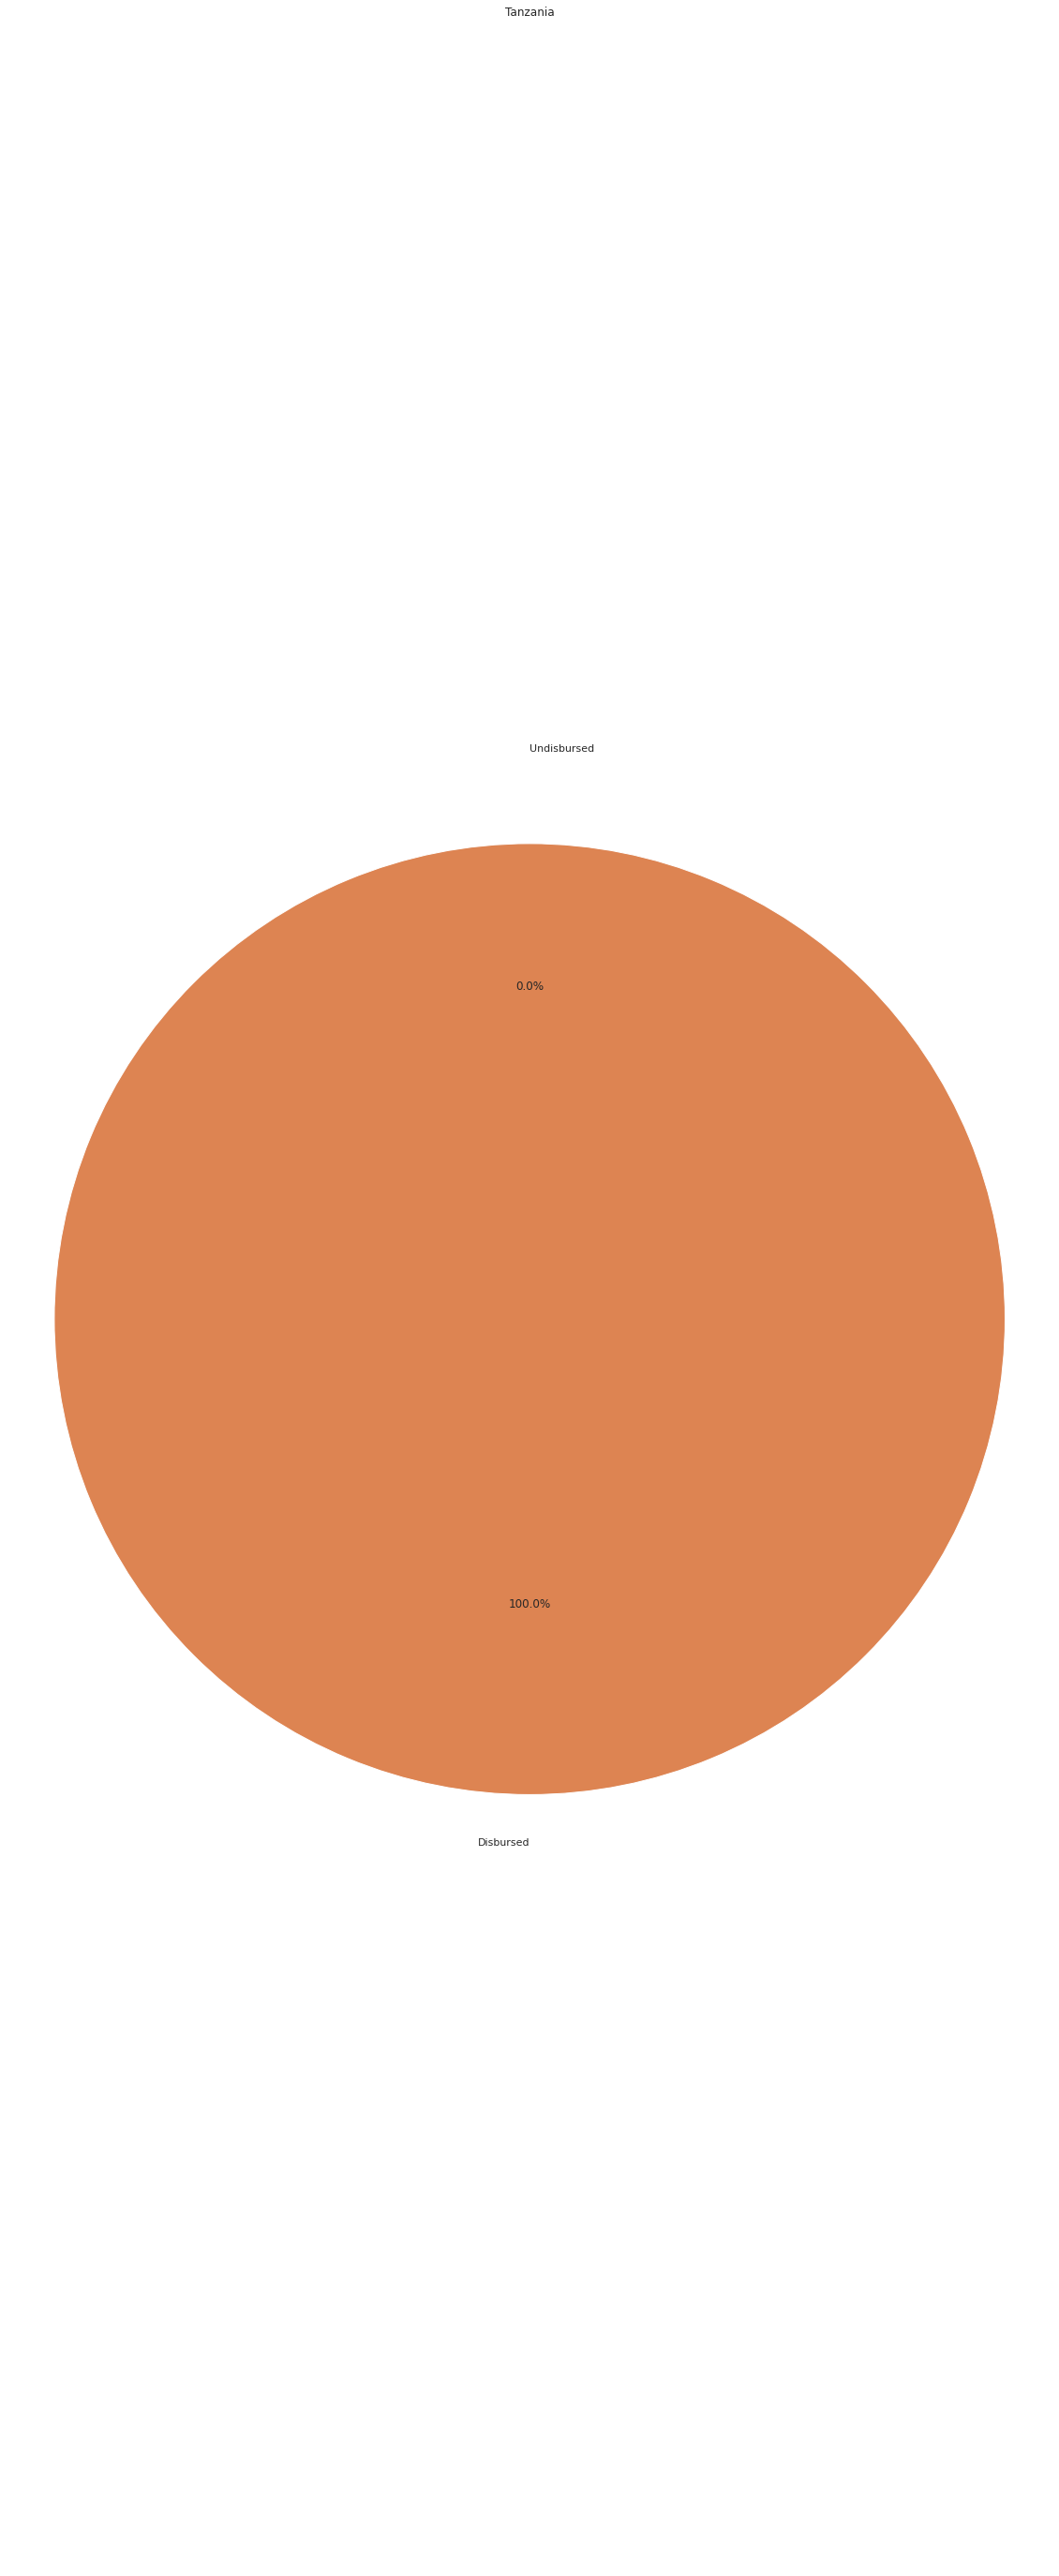

<Figure size 360x360 with 0 Axes>

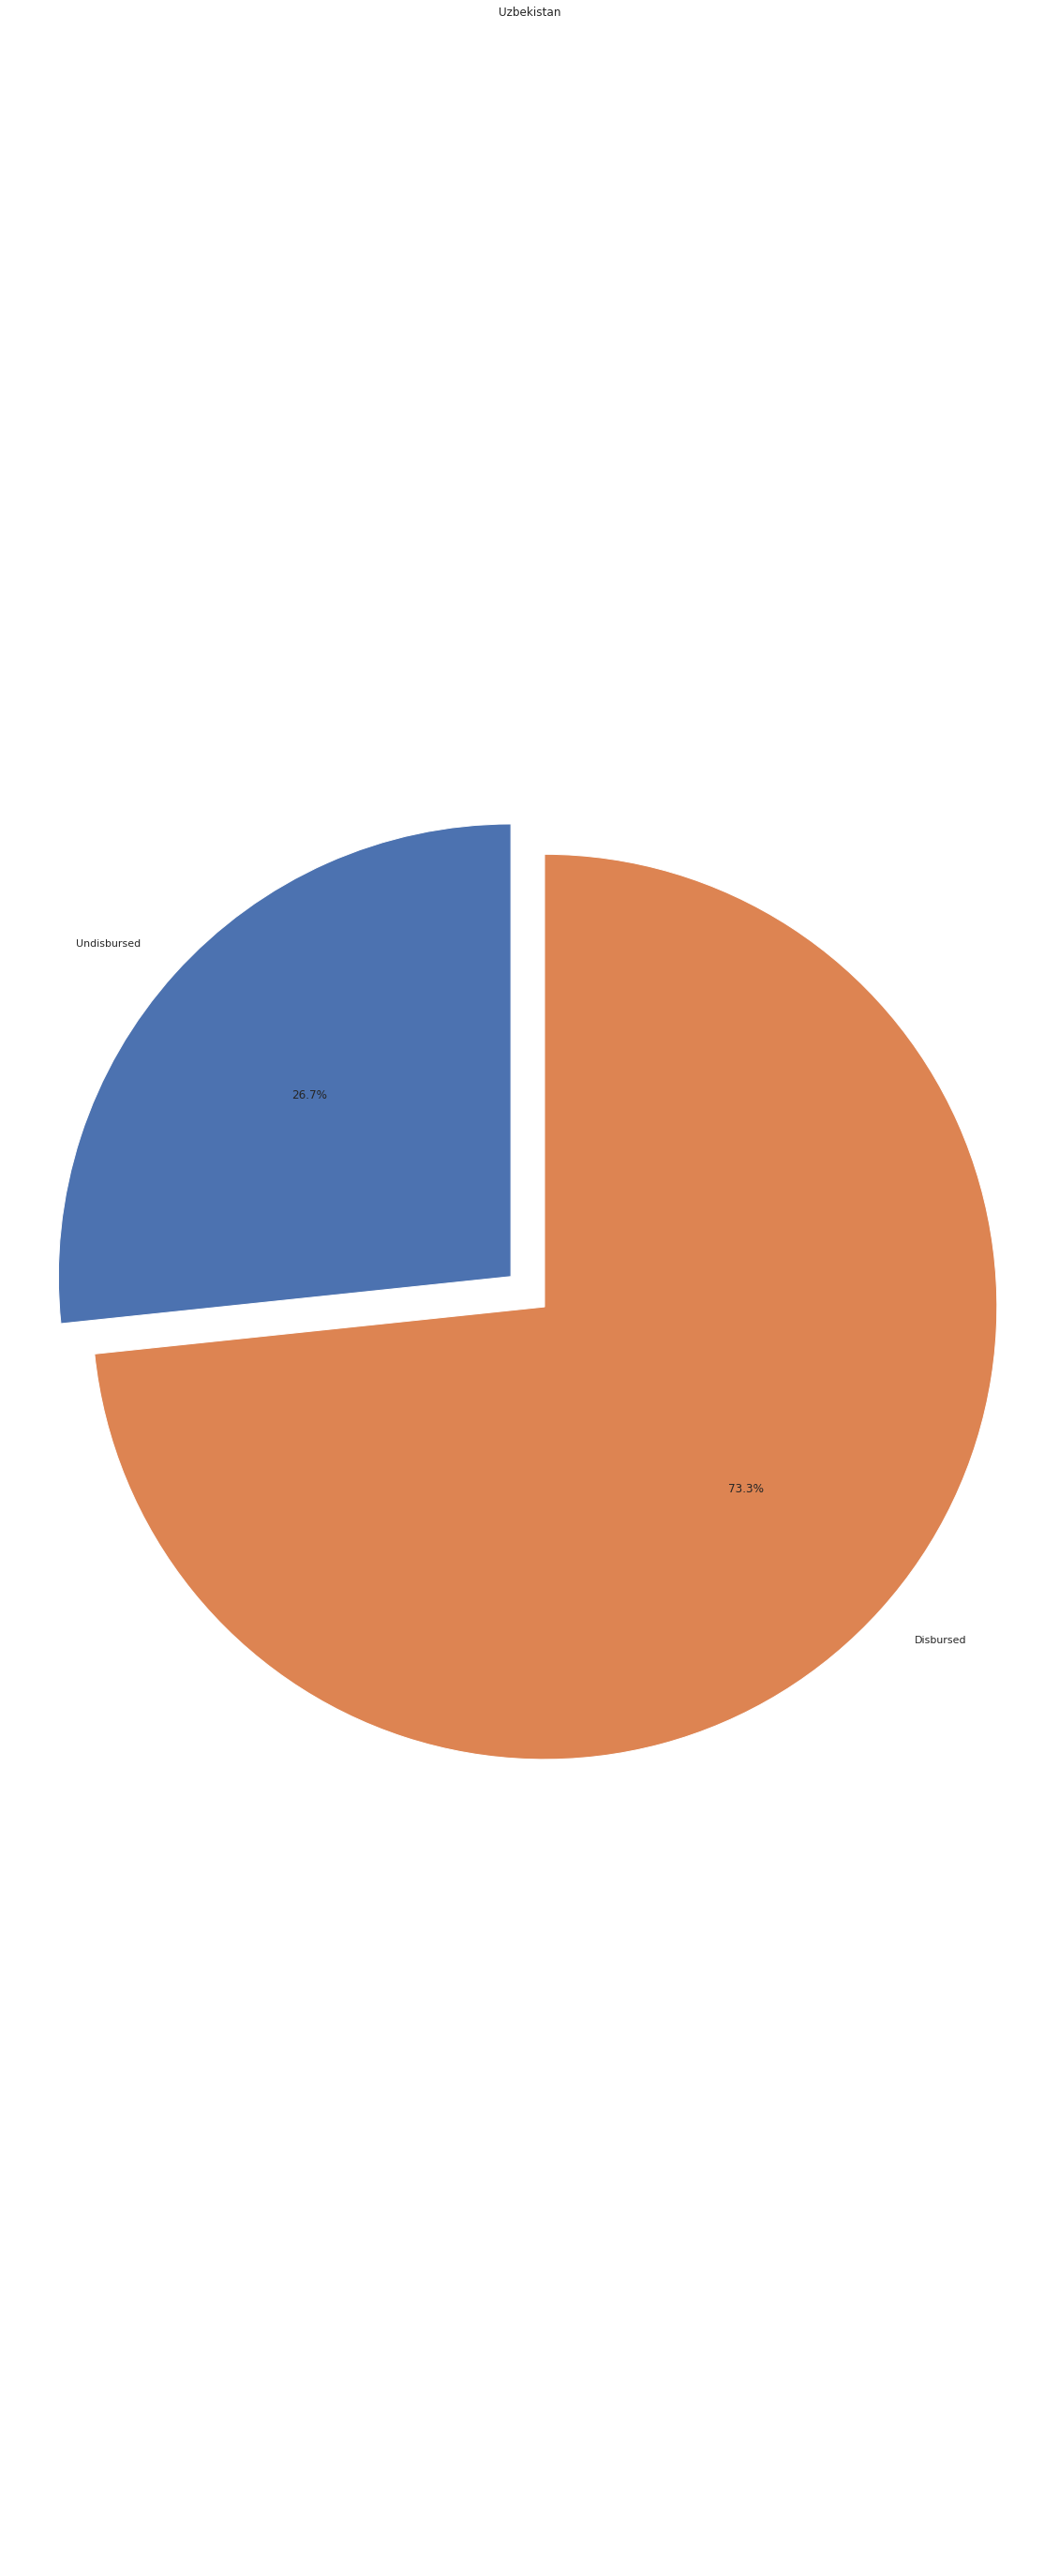

<Figure size 360x360 with 0 Axes>

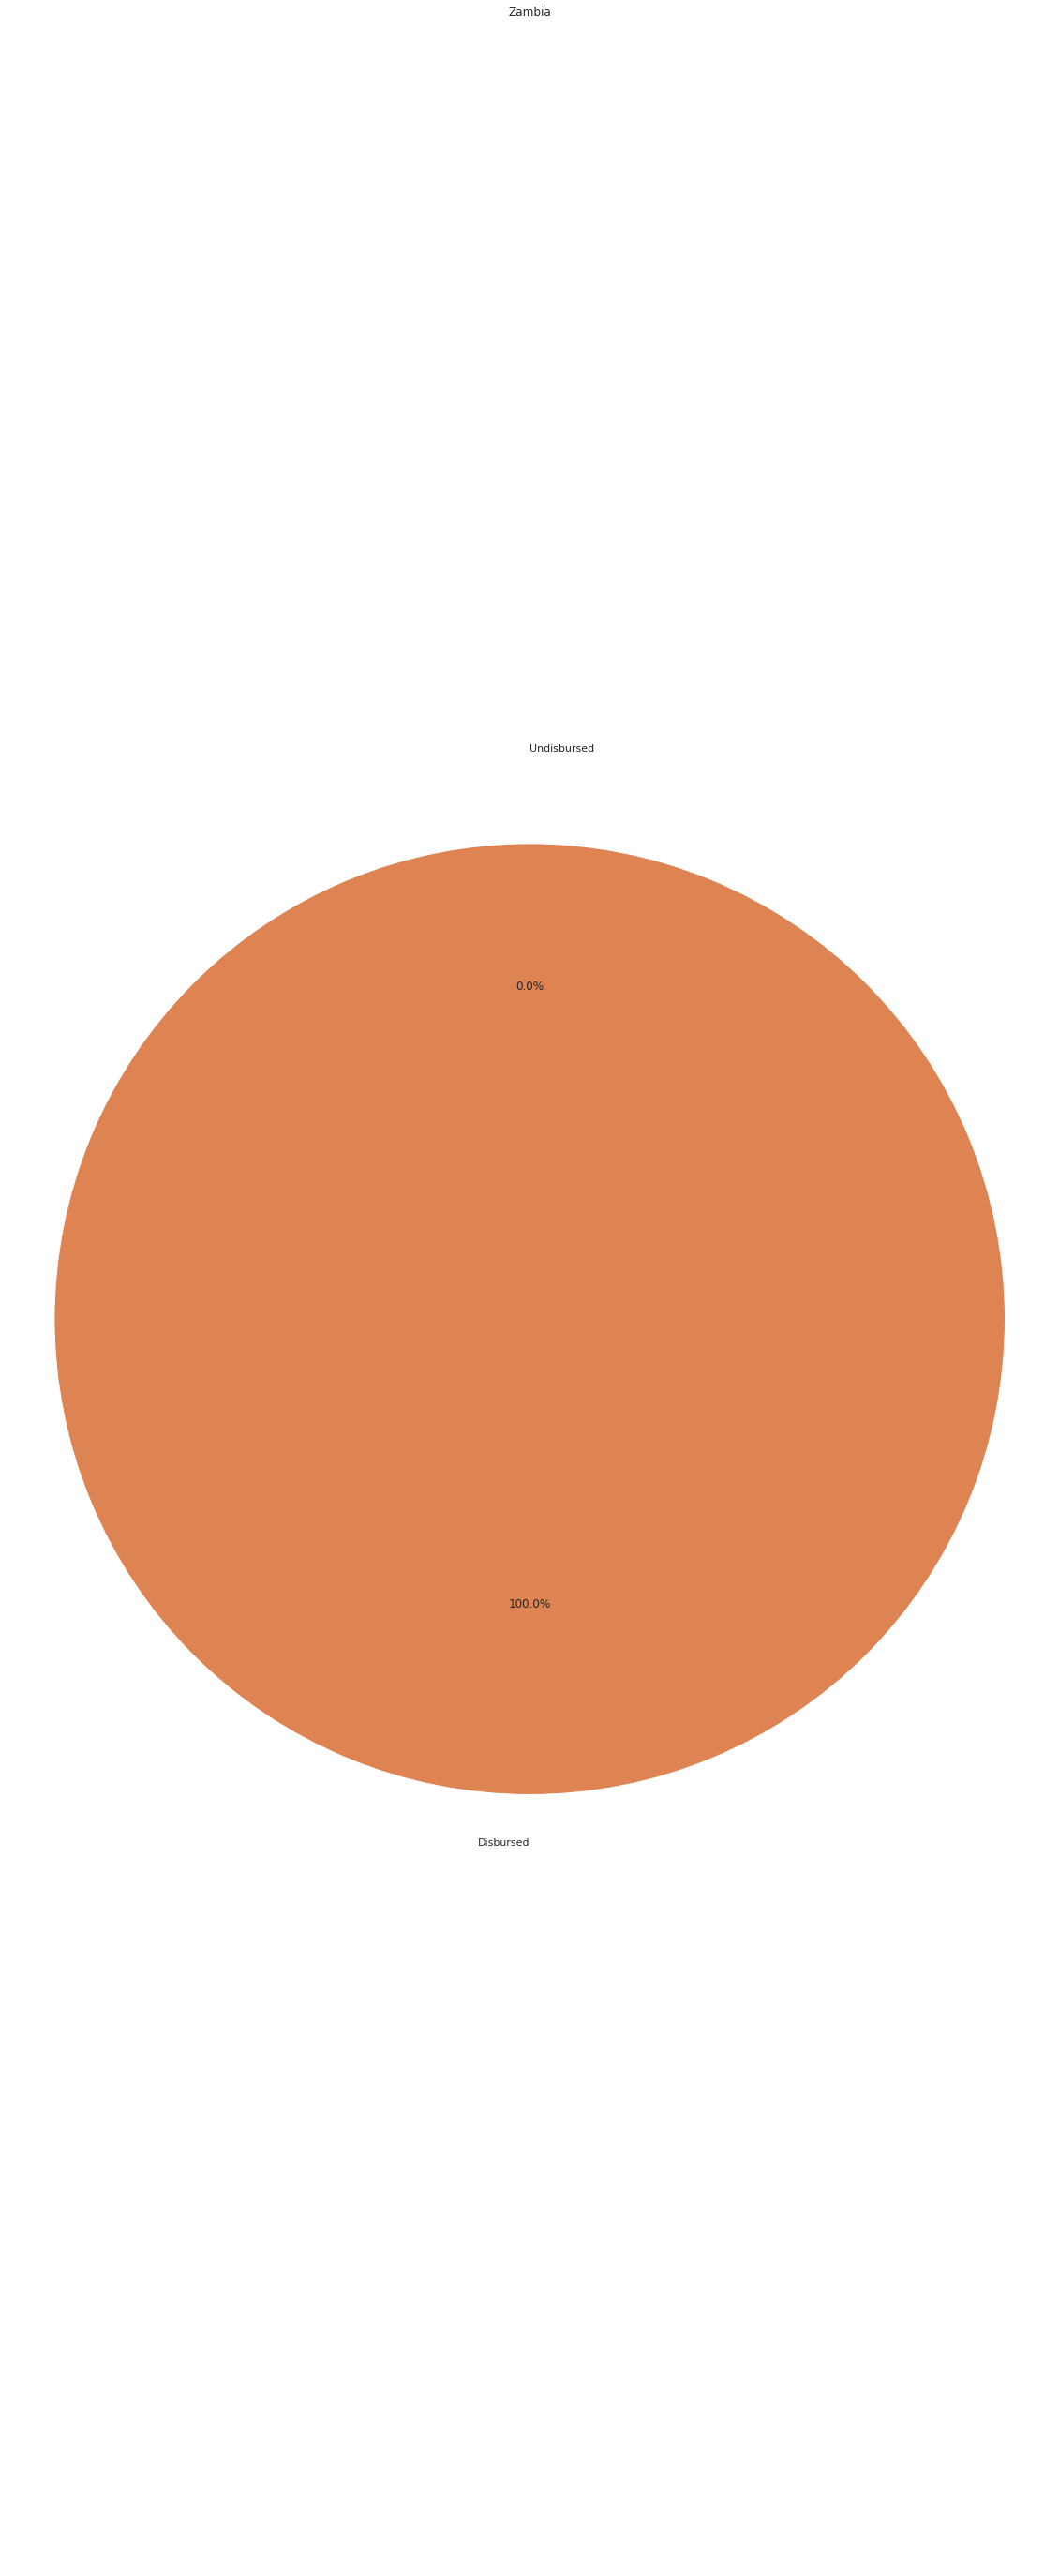

<Figure size 360x360 with 0 Axes>

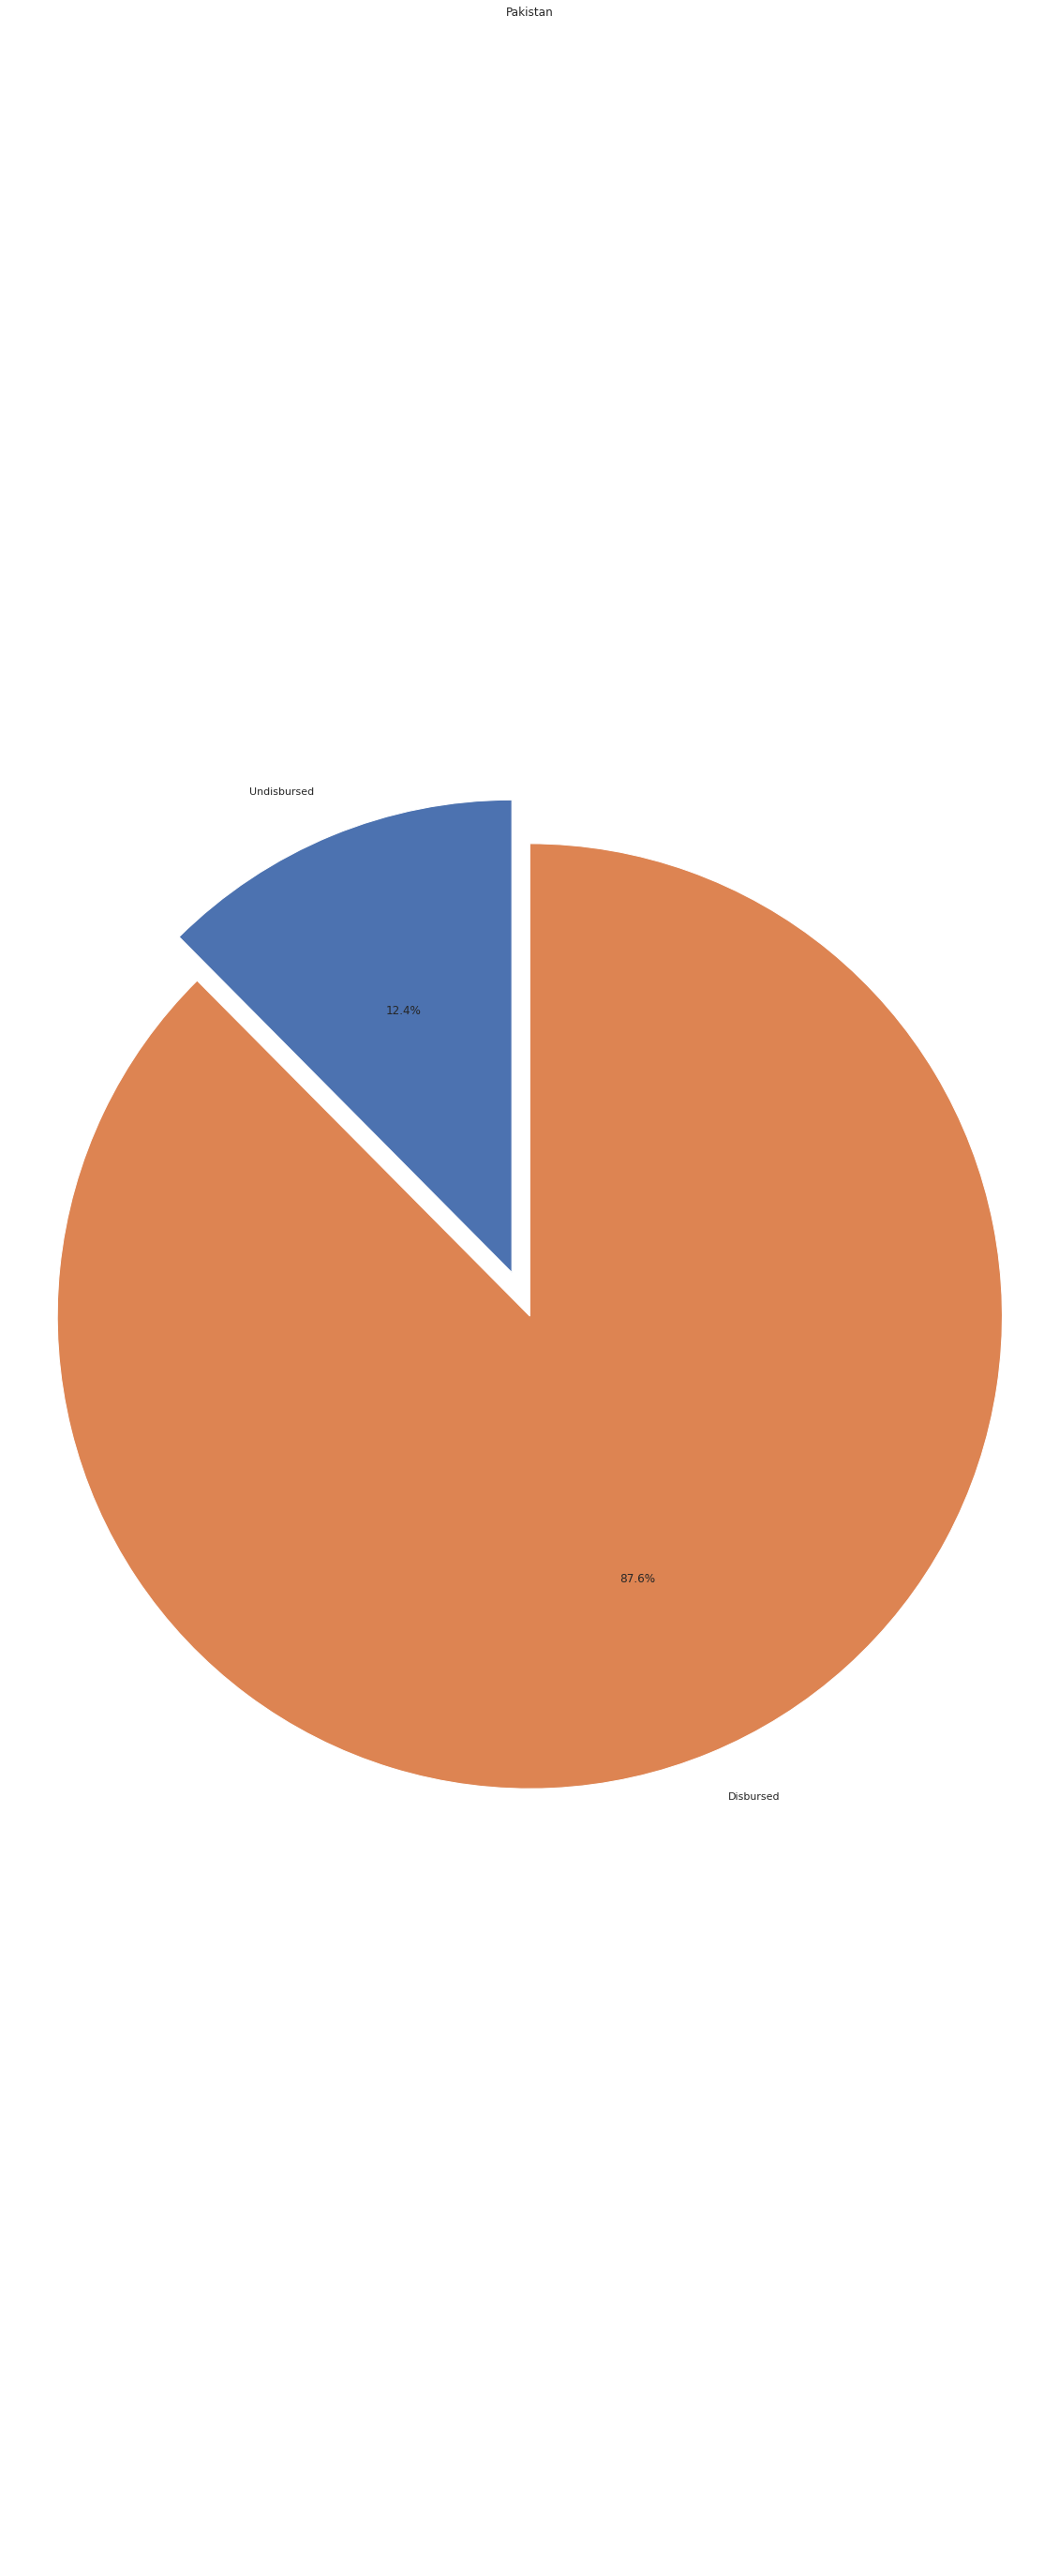

<Figure size 360x360 with 0 Axes>

In [ ]:
for i in range(20):
  arr2[i]=(arr2[i]*100)/(arr2[i]+arr3[i])
  arr3[i]=(arr3[i]*100)/(arr2[i]+arr3[i])
  fig1, ax1 = plt.subplots()
  ax1.pie([arr2[i],arr3[i]], explode=[0.1,0], labels=['Undisbursed','Disbursed'],radius=1, autopct='%1.1f%%',shadow=False, startangle=90)
  ax1.axis('equal')
  ax1.set_title(arr1[i])
  plt.figure(figsize=(5,5))
  plt.show()

In [ ]:
bd.head()

,Region,Country,Borrower,Guarantor,Loan Type,Loan Status,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,Diffday,Passed
0,Europe and Central Asia,France,CREDIT NATIONAL,France,NPL,Fully Repaid,4.25,2.500000e+08,0.00,0.0,2.500000e+08,3.800000e+04,0.0,0.00,0.00,2.499620e+08,2.499620e+08,0,0.0,721640,1
1,Europe and Central Asia,Netherlands,0 Fran...,0 Fran...,NPL,Fully Repaid,4.25,1.910442e+08,0.00,0.0,1.910442e+08,1.033722e+08,0.0,-0.01,-0.01,8.767200e+07,8.767200e+07,0,0.0,719820,1
2,Europe and Central Asia,Netherlands,0 Fran...,0 Fran...,NPL,Fully Repaid,4.25,3.955788e+06,0.00,0.0,3.955788e+06,0.000000e+00,0.0,0.00,0.00,3.955788e+06,3.955788e+06,0,0.0,713244,1
3,Europe and Central Asia,Denmark,0 Fran...,0 Fran...,NPL,Fully Repaid,4.25,4.000000e+07,0.00,0.0,4.000000e+07,1.777100e+07,0.0,0.00,0.00,2.222900e+07,2.222900e+07,0,0.0,719818,1
4,Europe and Central Asia,Luxembourg,0 Fran...,0 Fran...,NPL,Fully Repaid,4.25,1.200000e+07,238016.98,0.0,1.176198e+07,1.619983e+06,0.0,-0.01,-0.01,1.014200e+07,1.014200e+07,0,0.0,720237,1


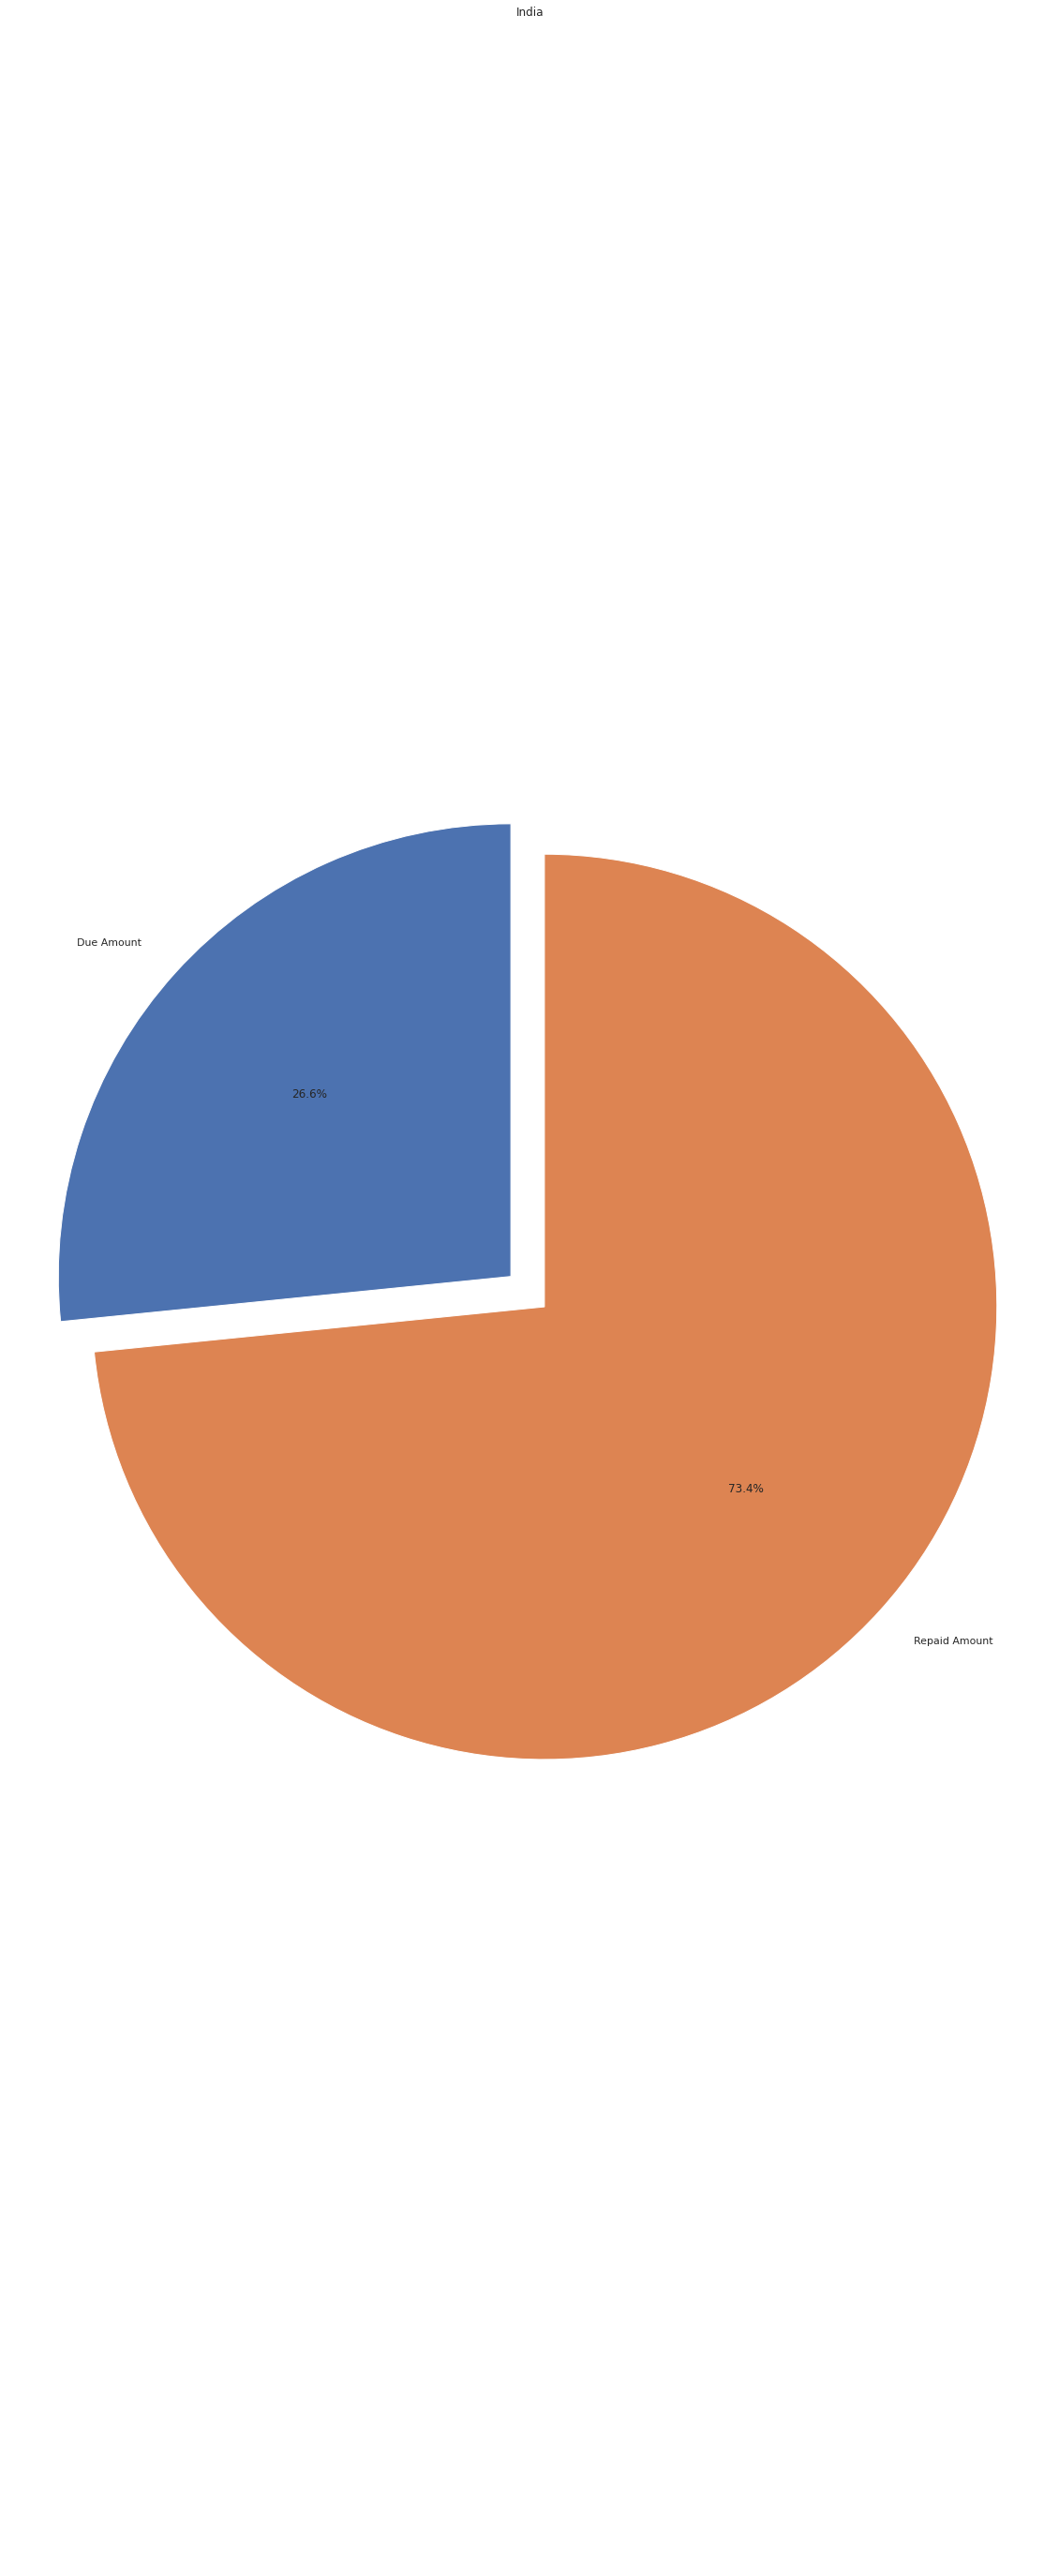

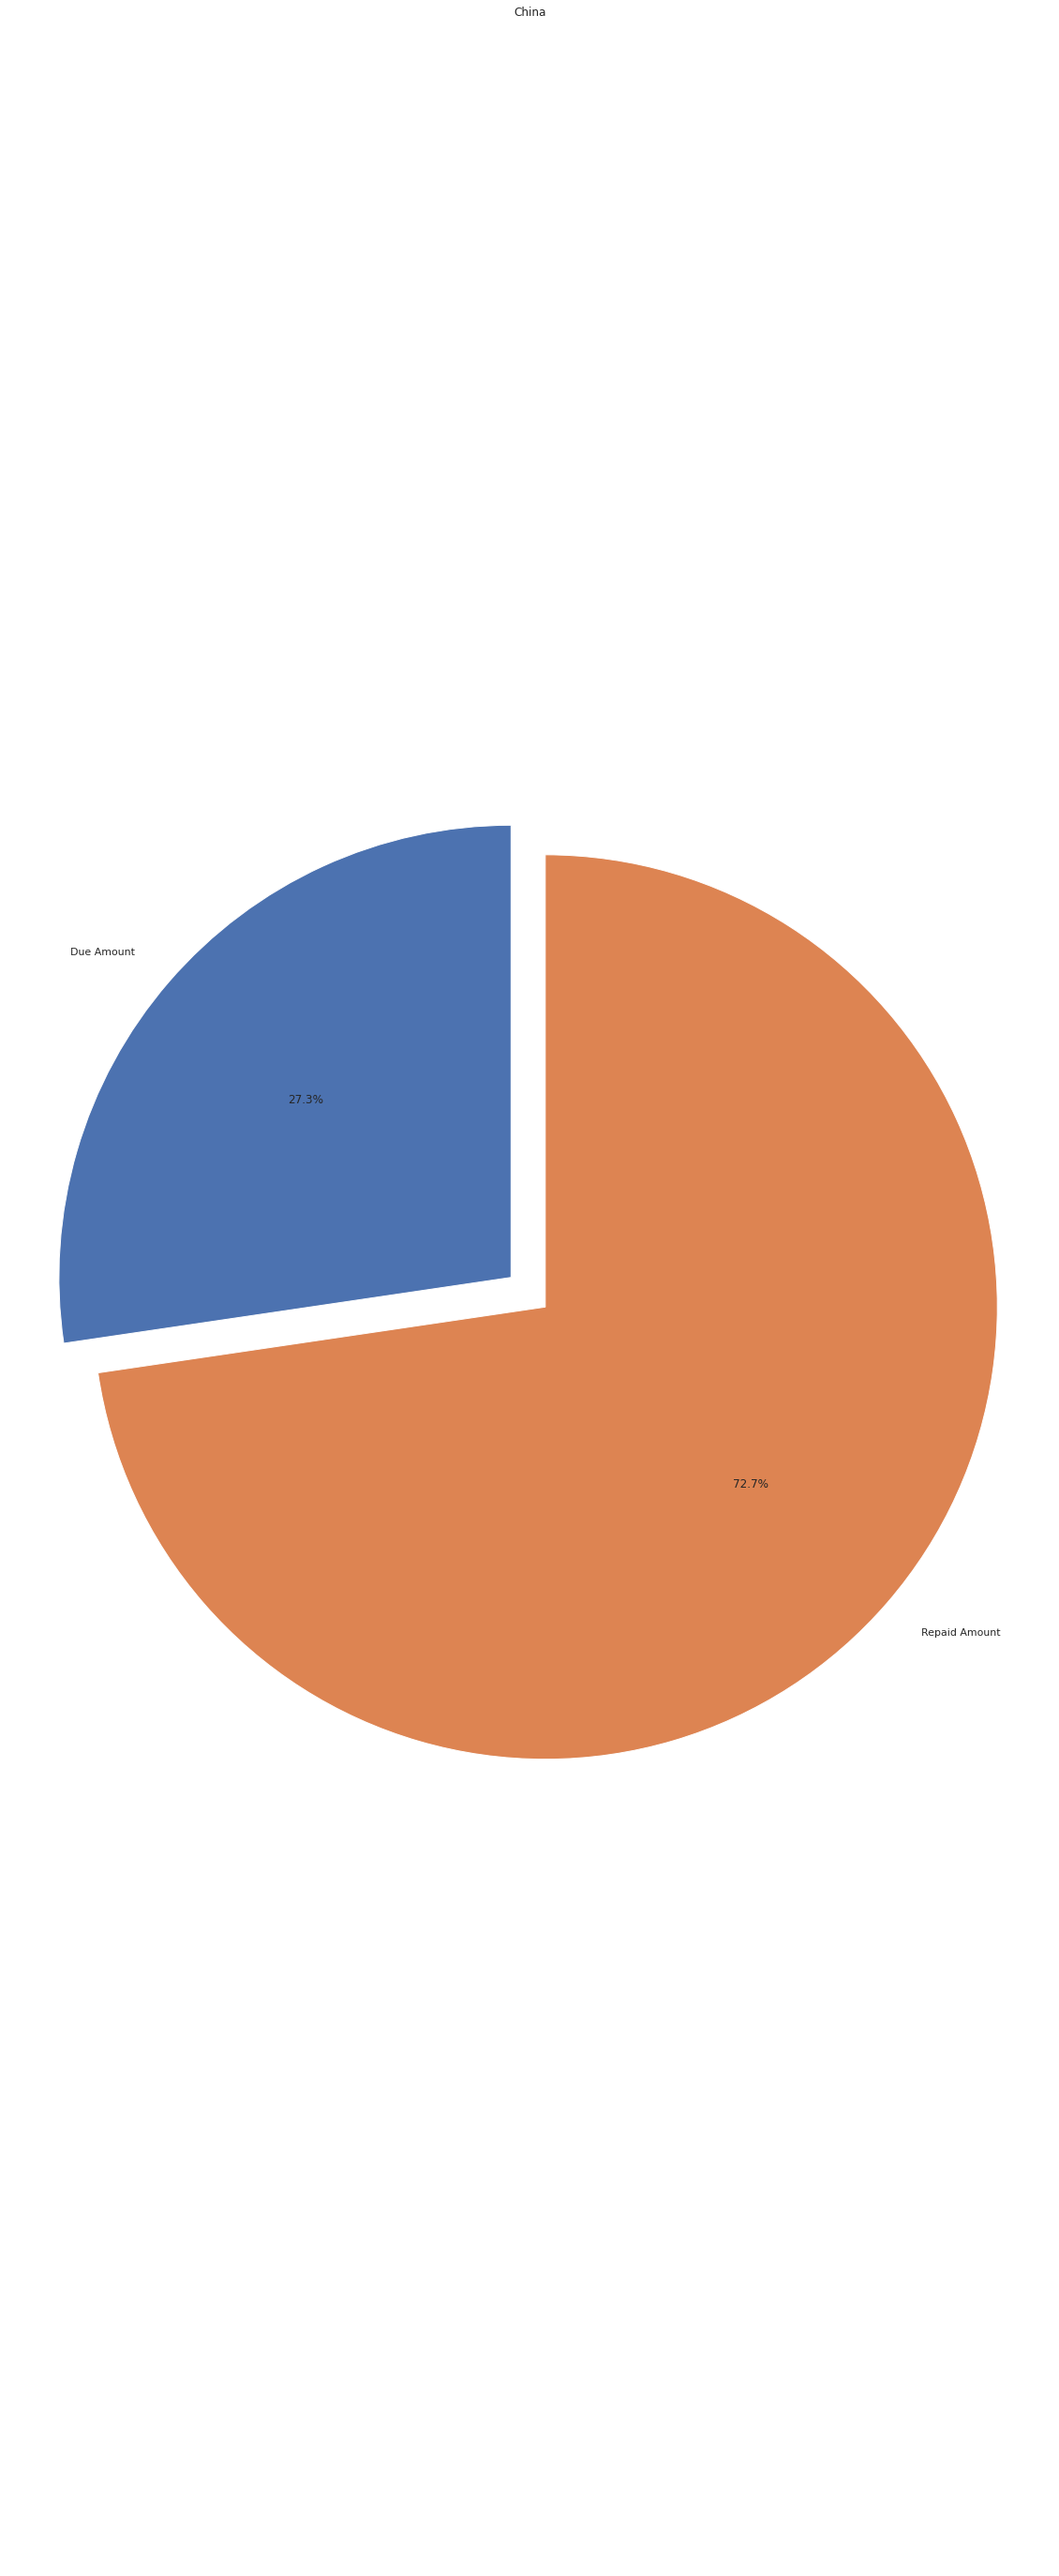

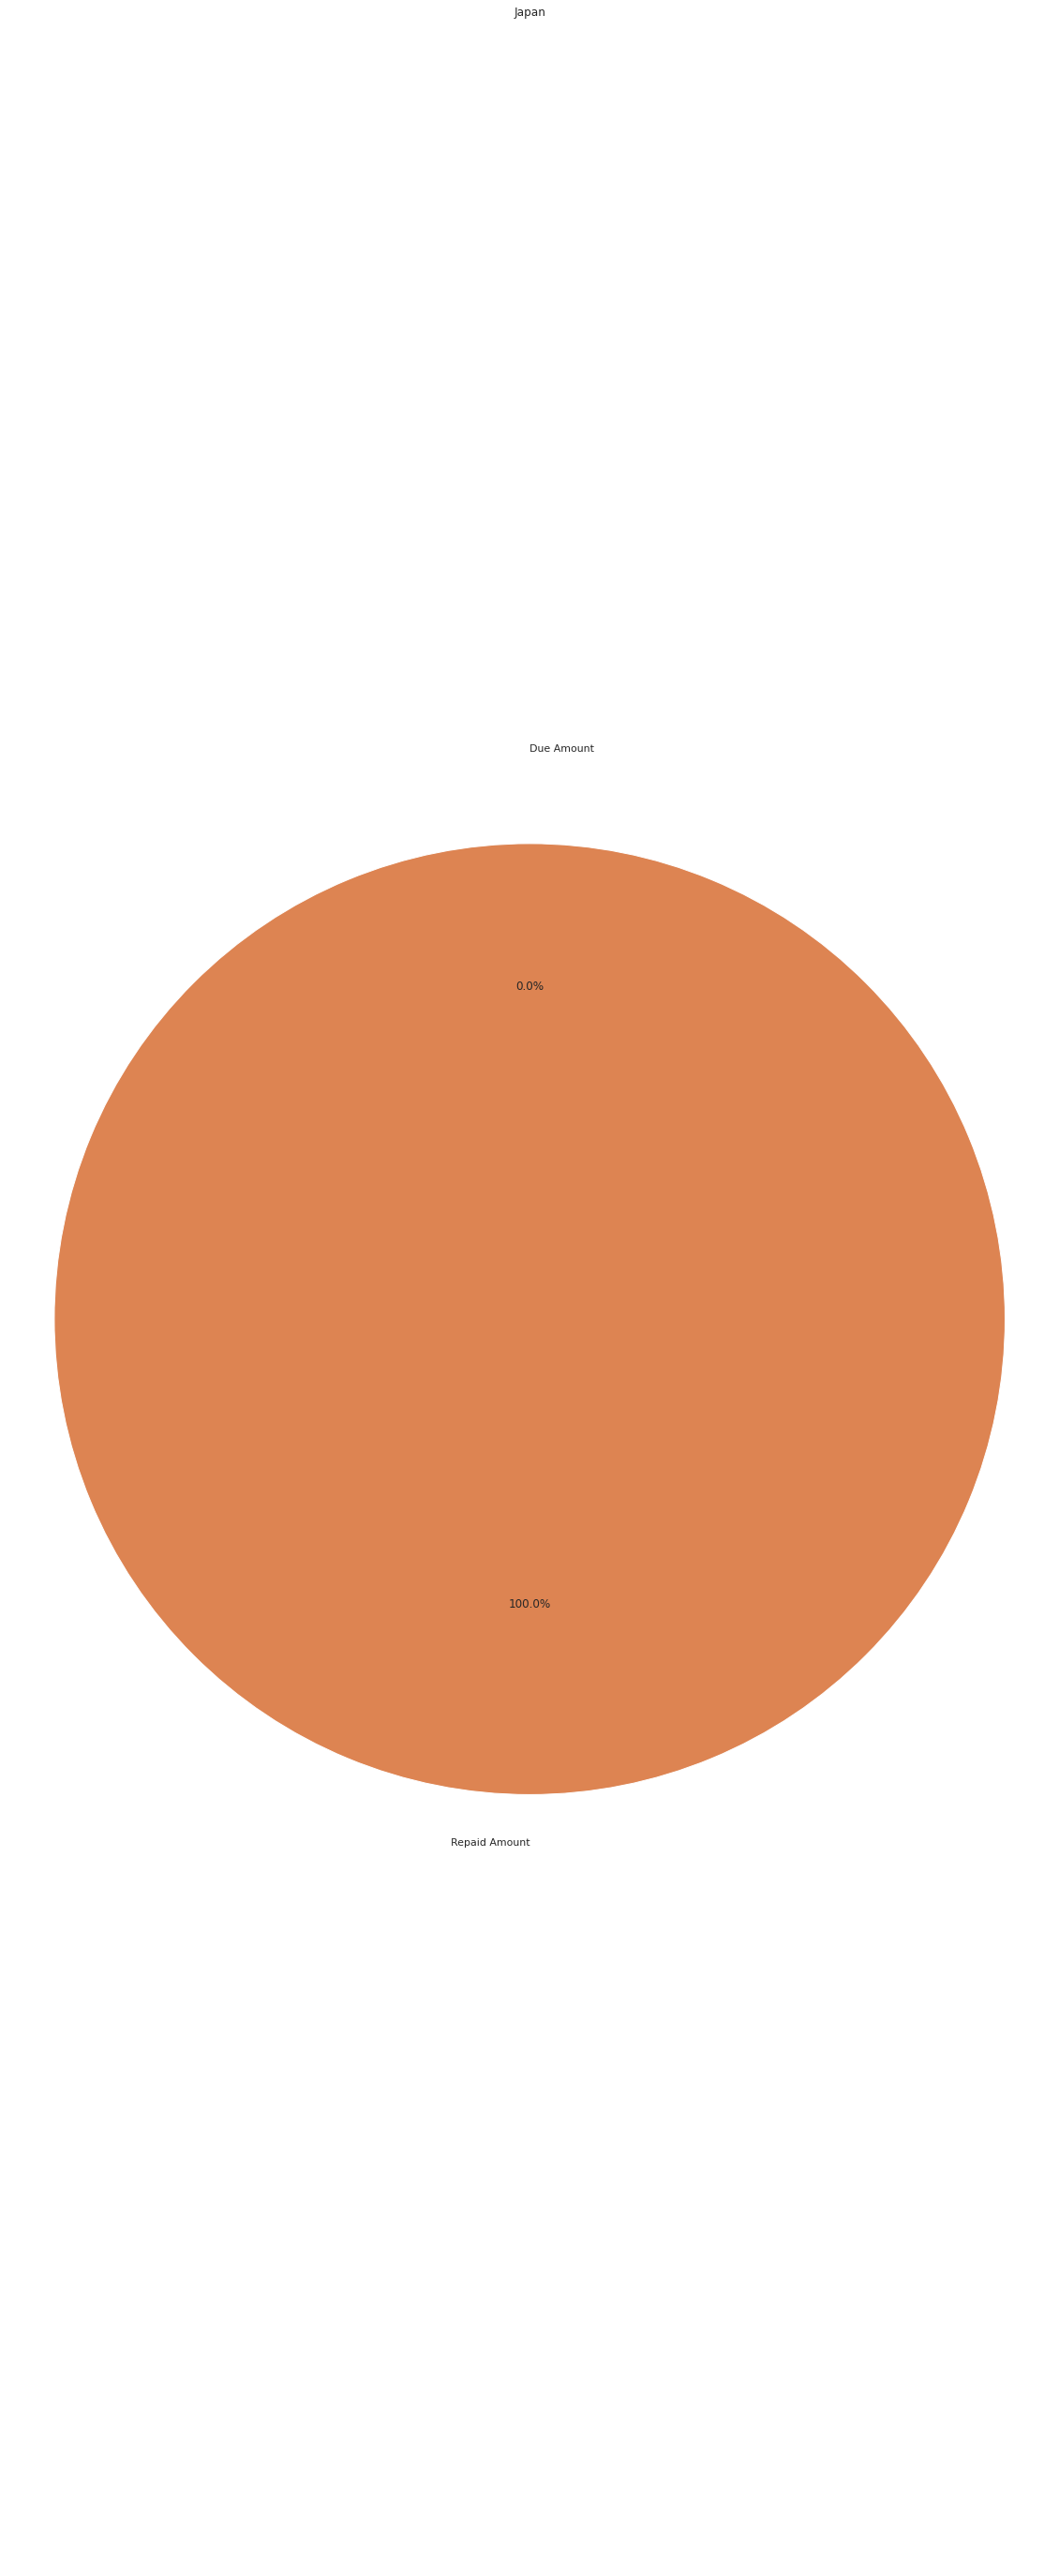

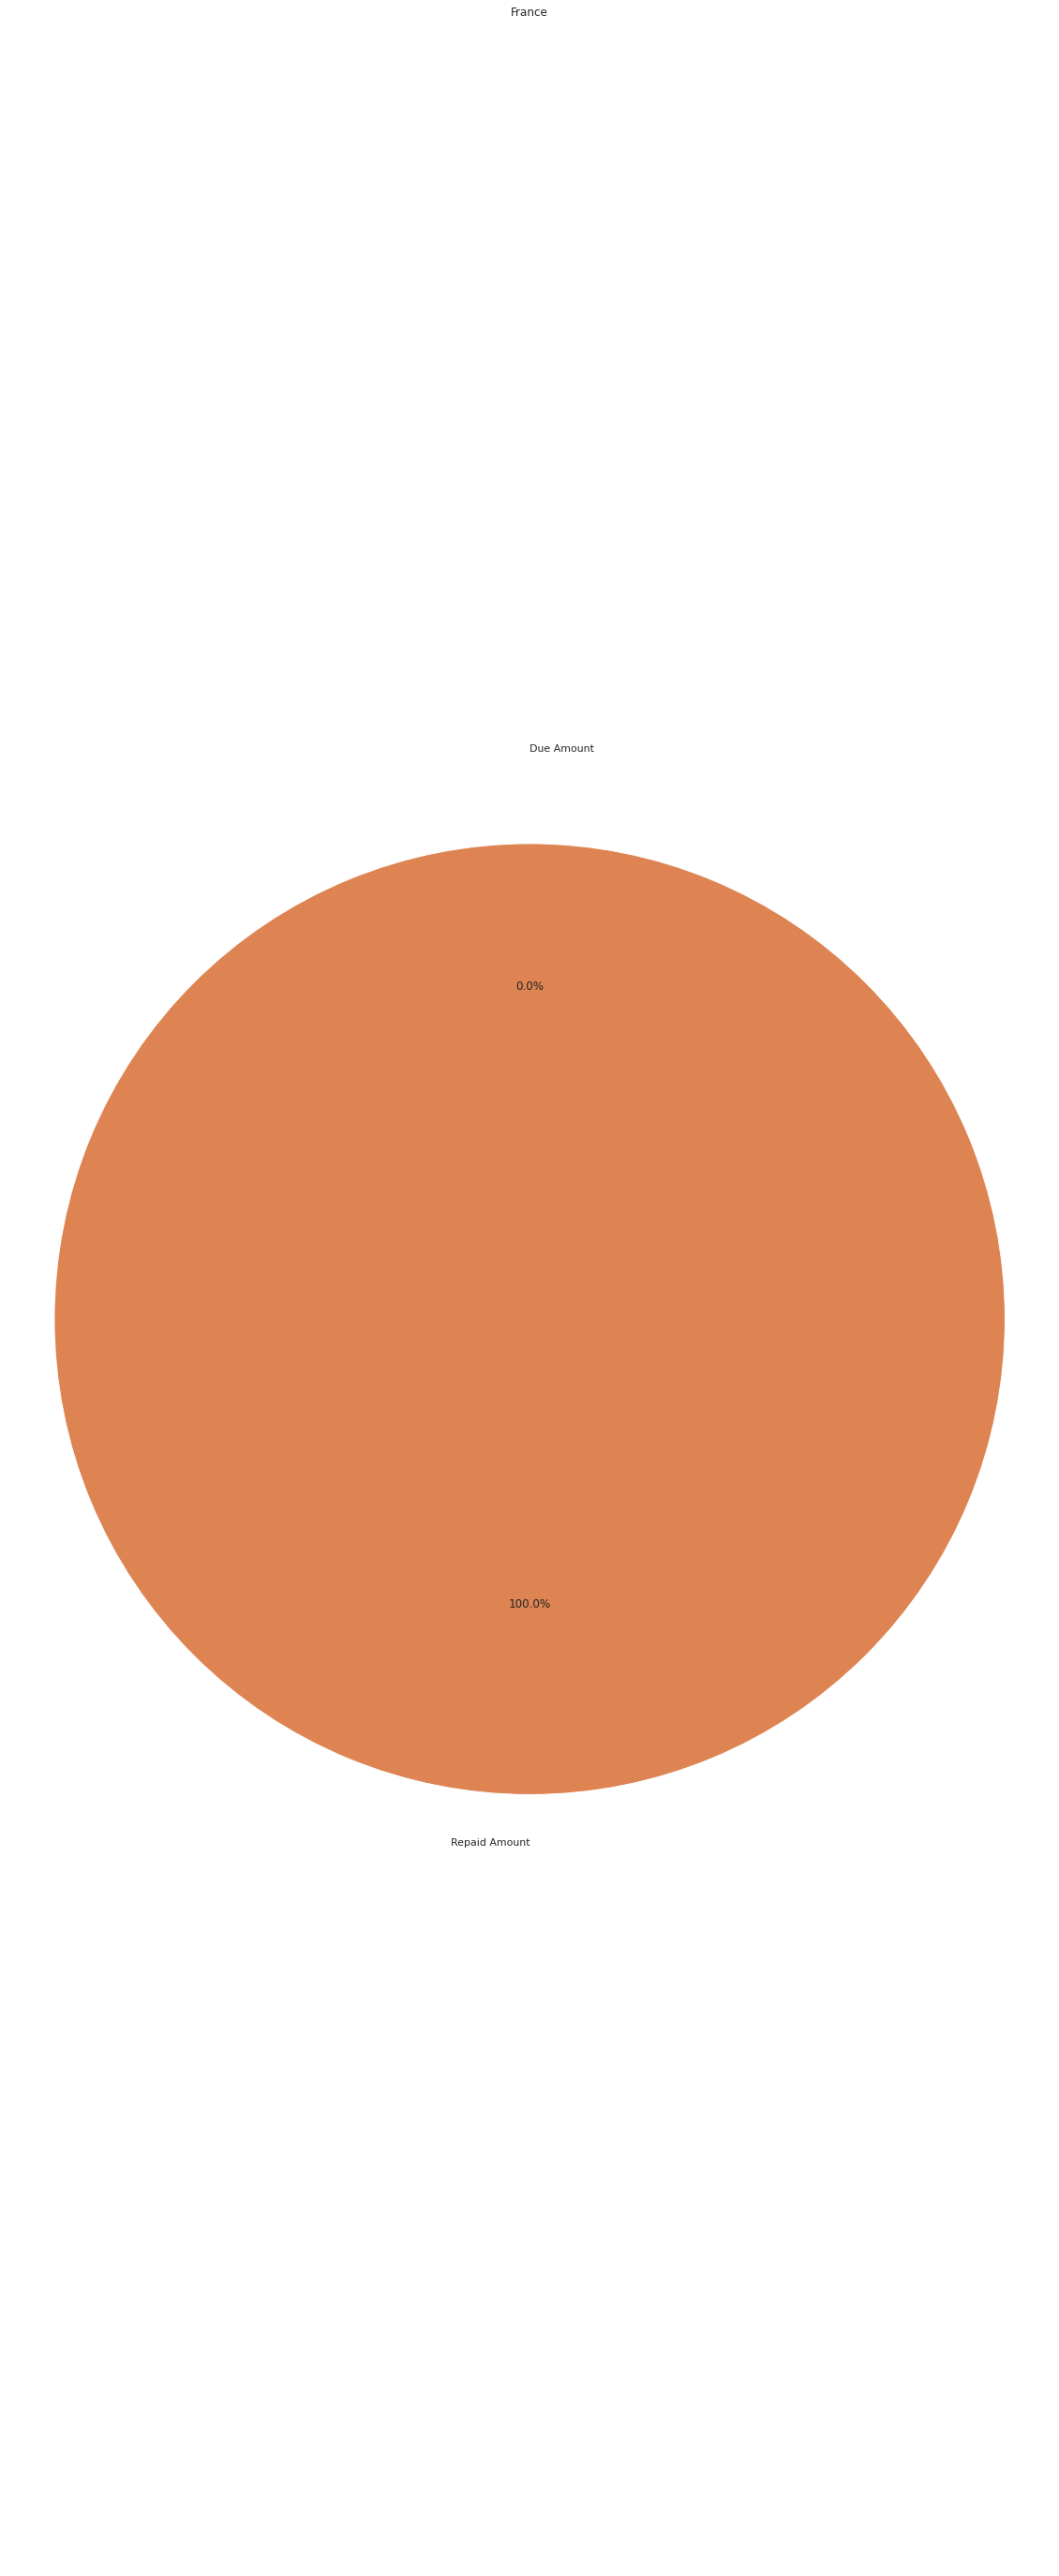

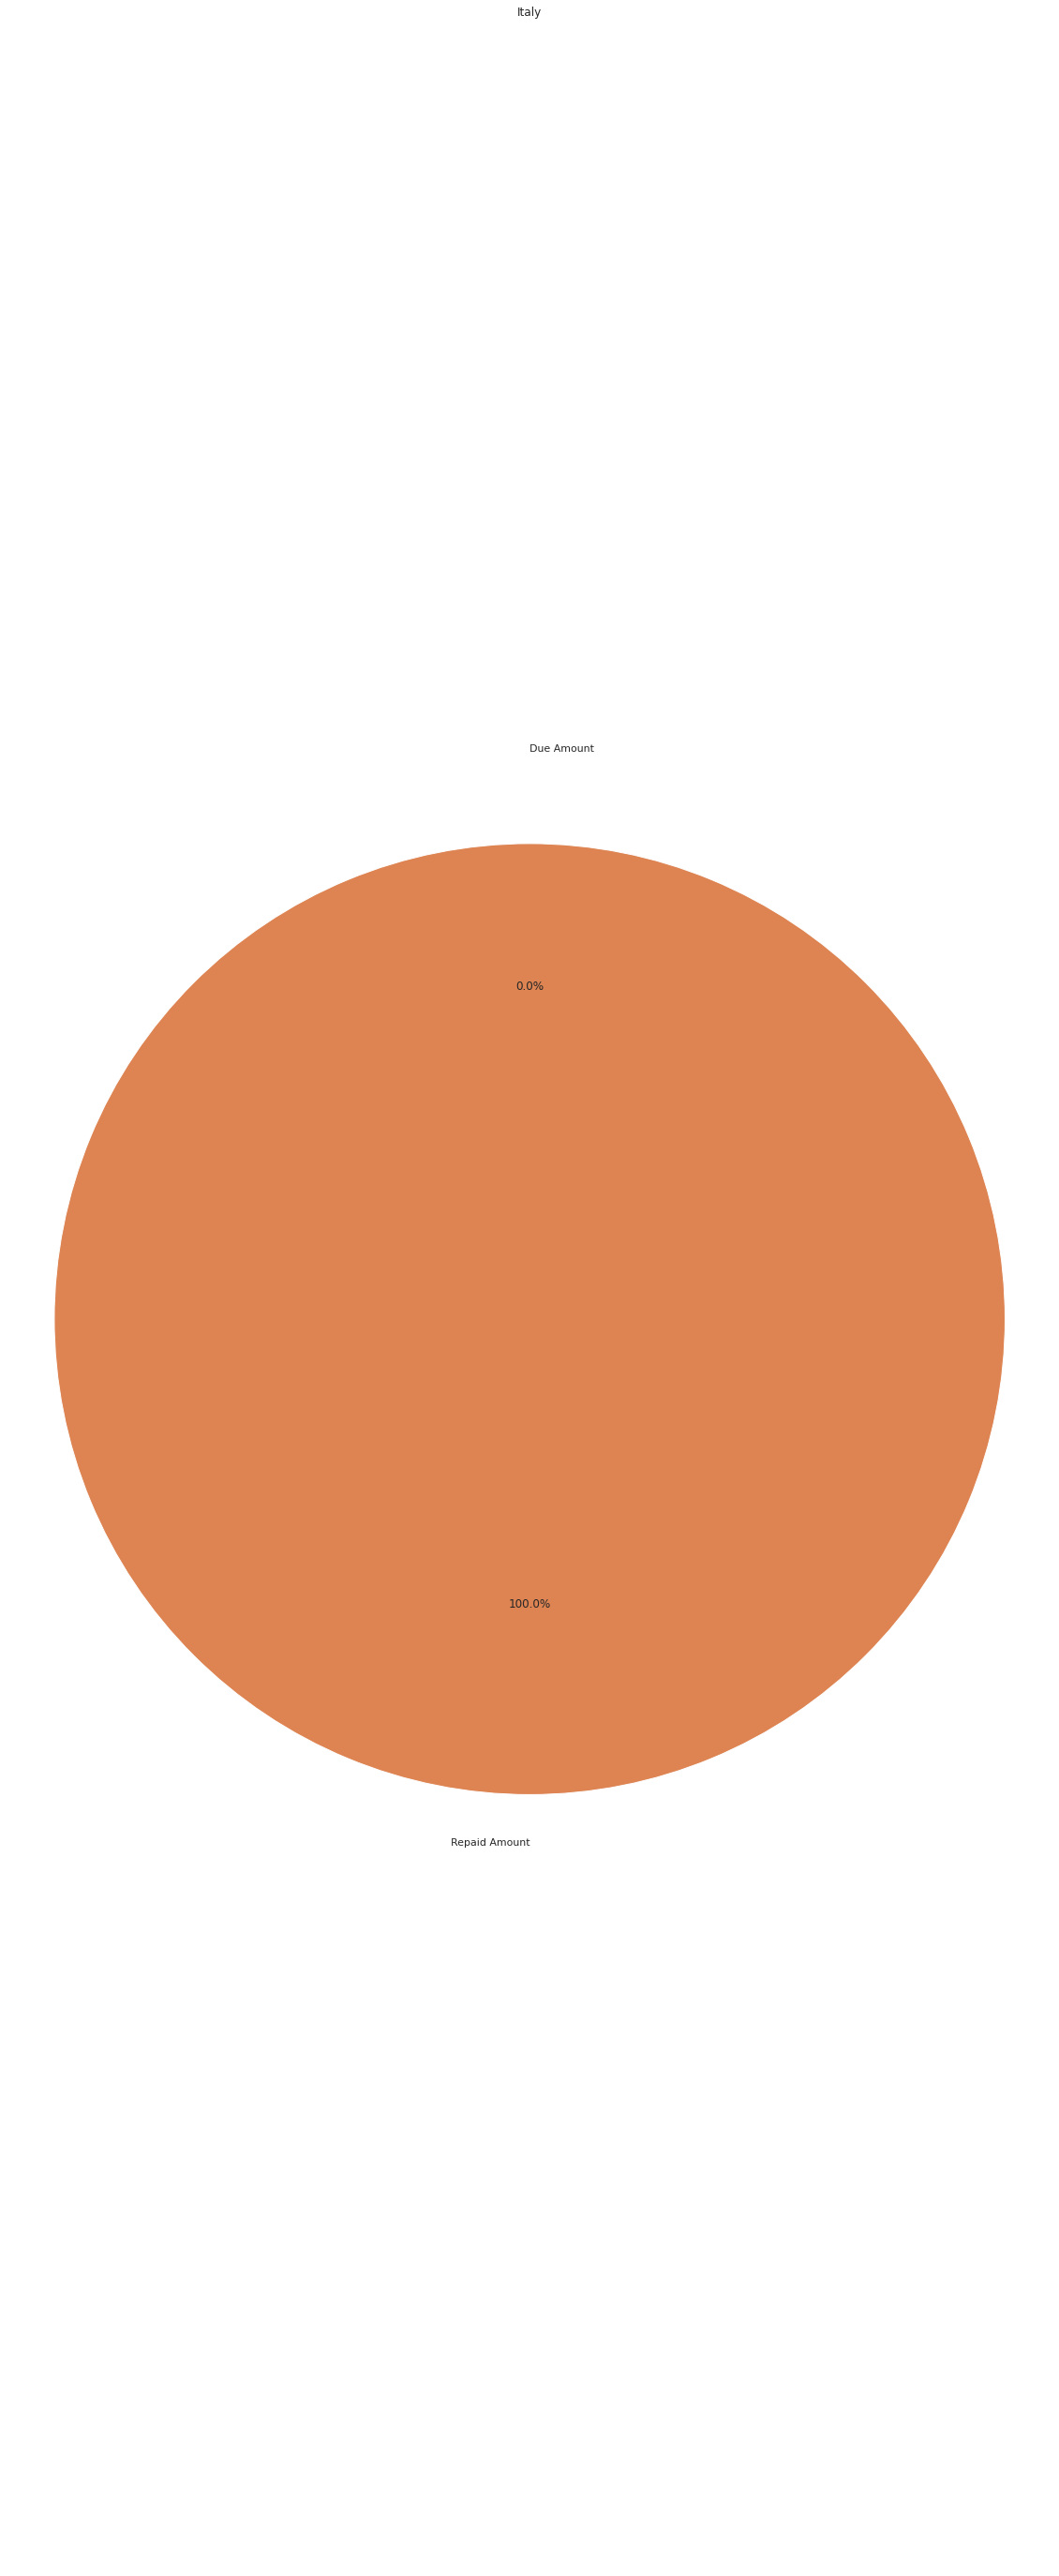

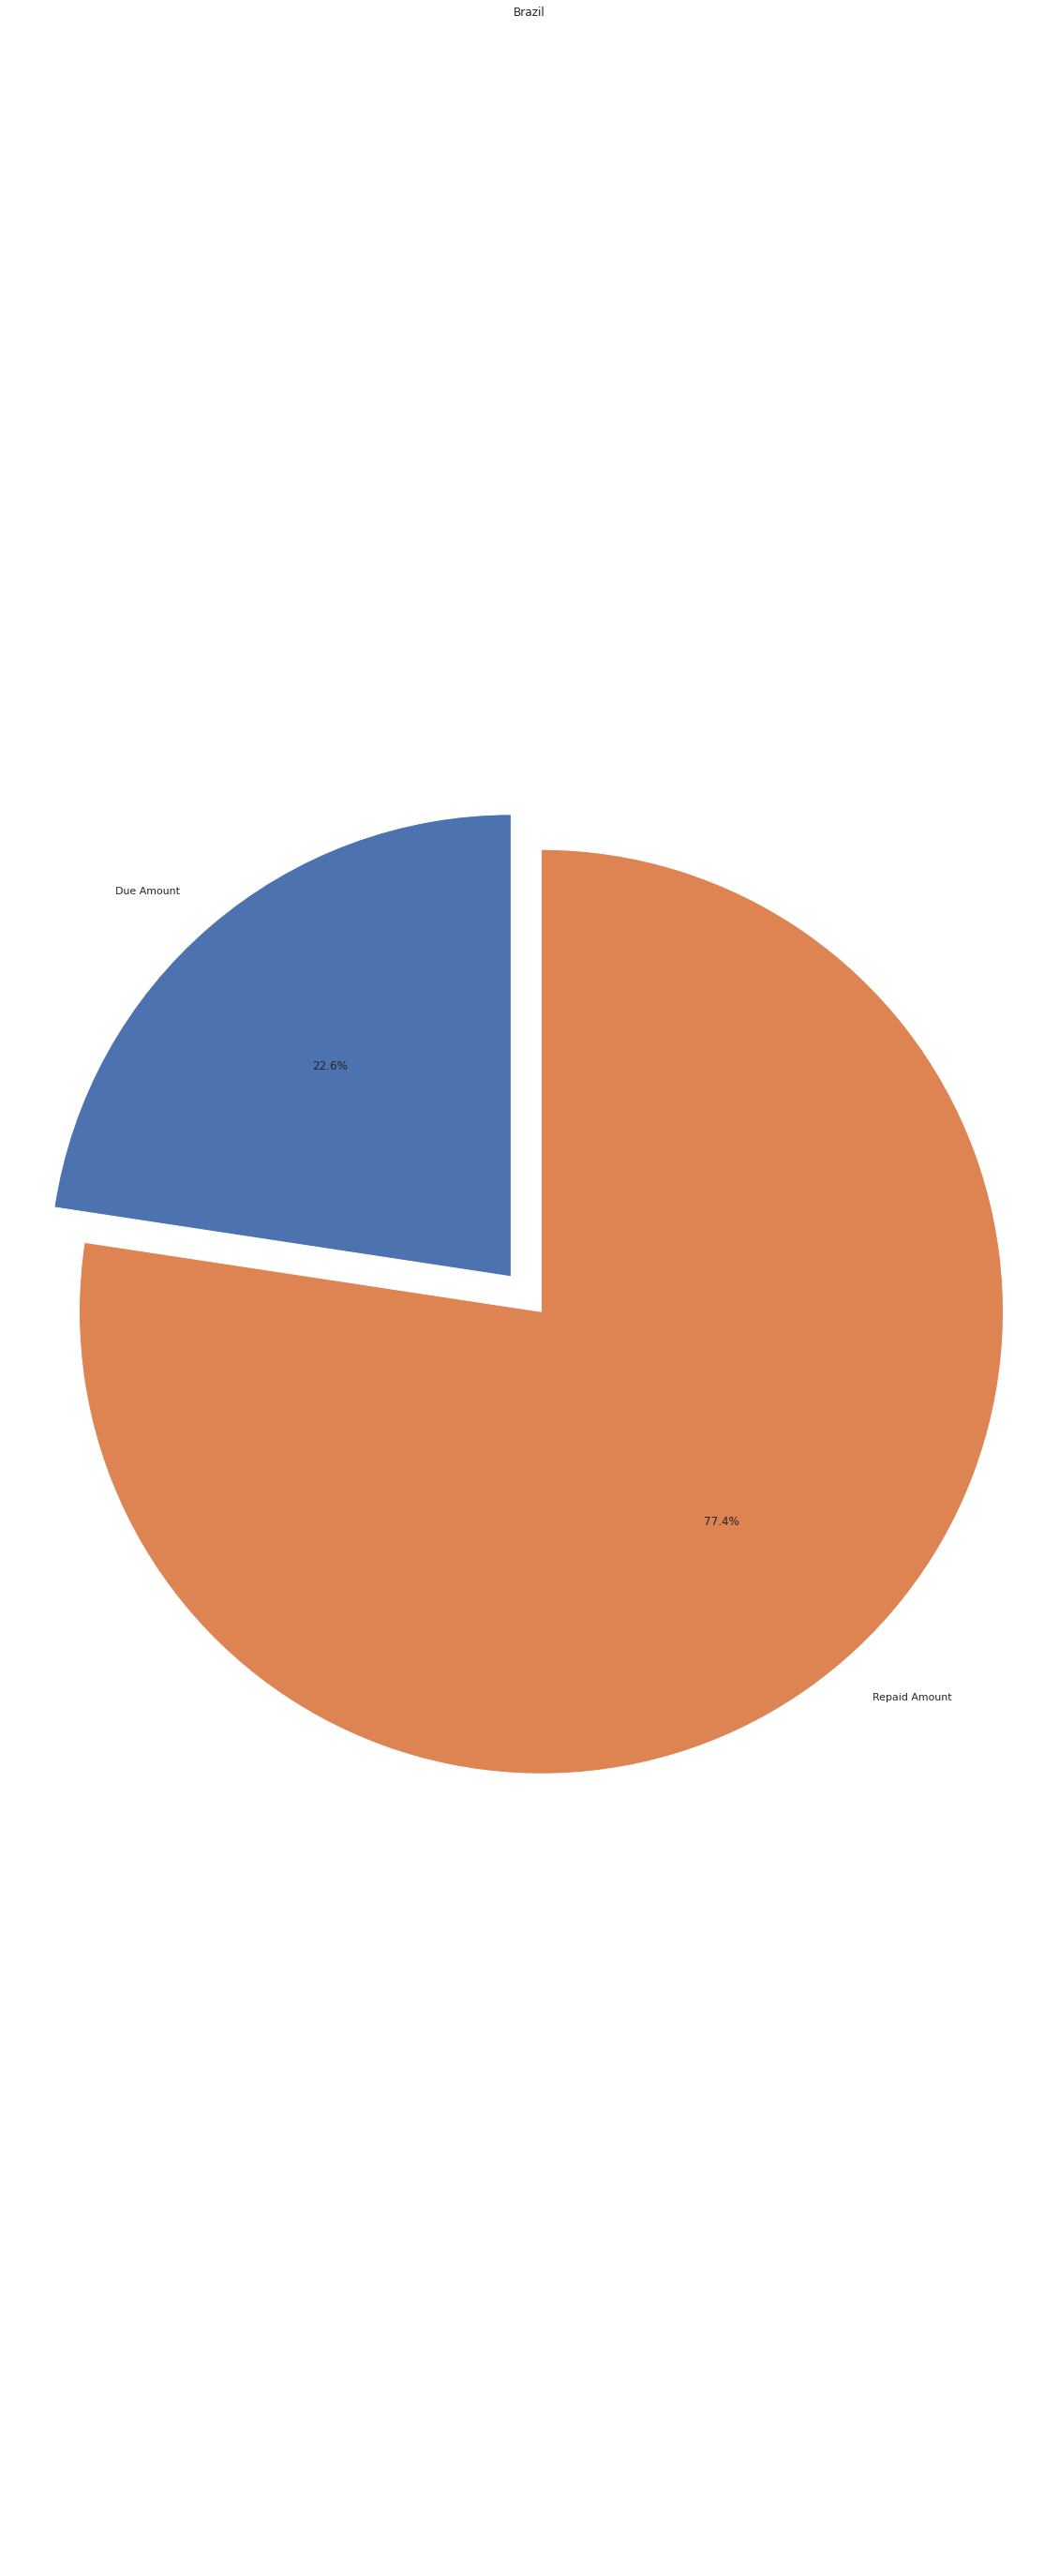

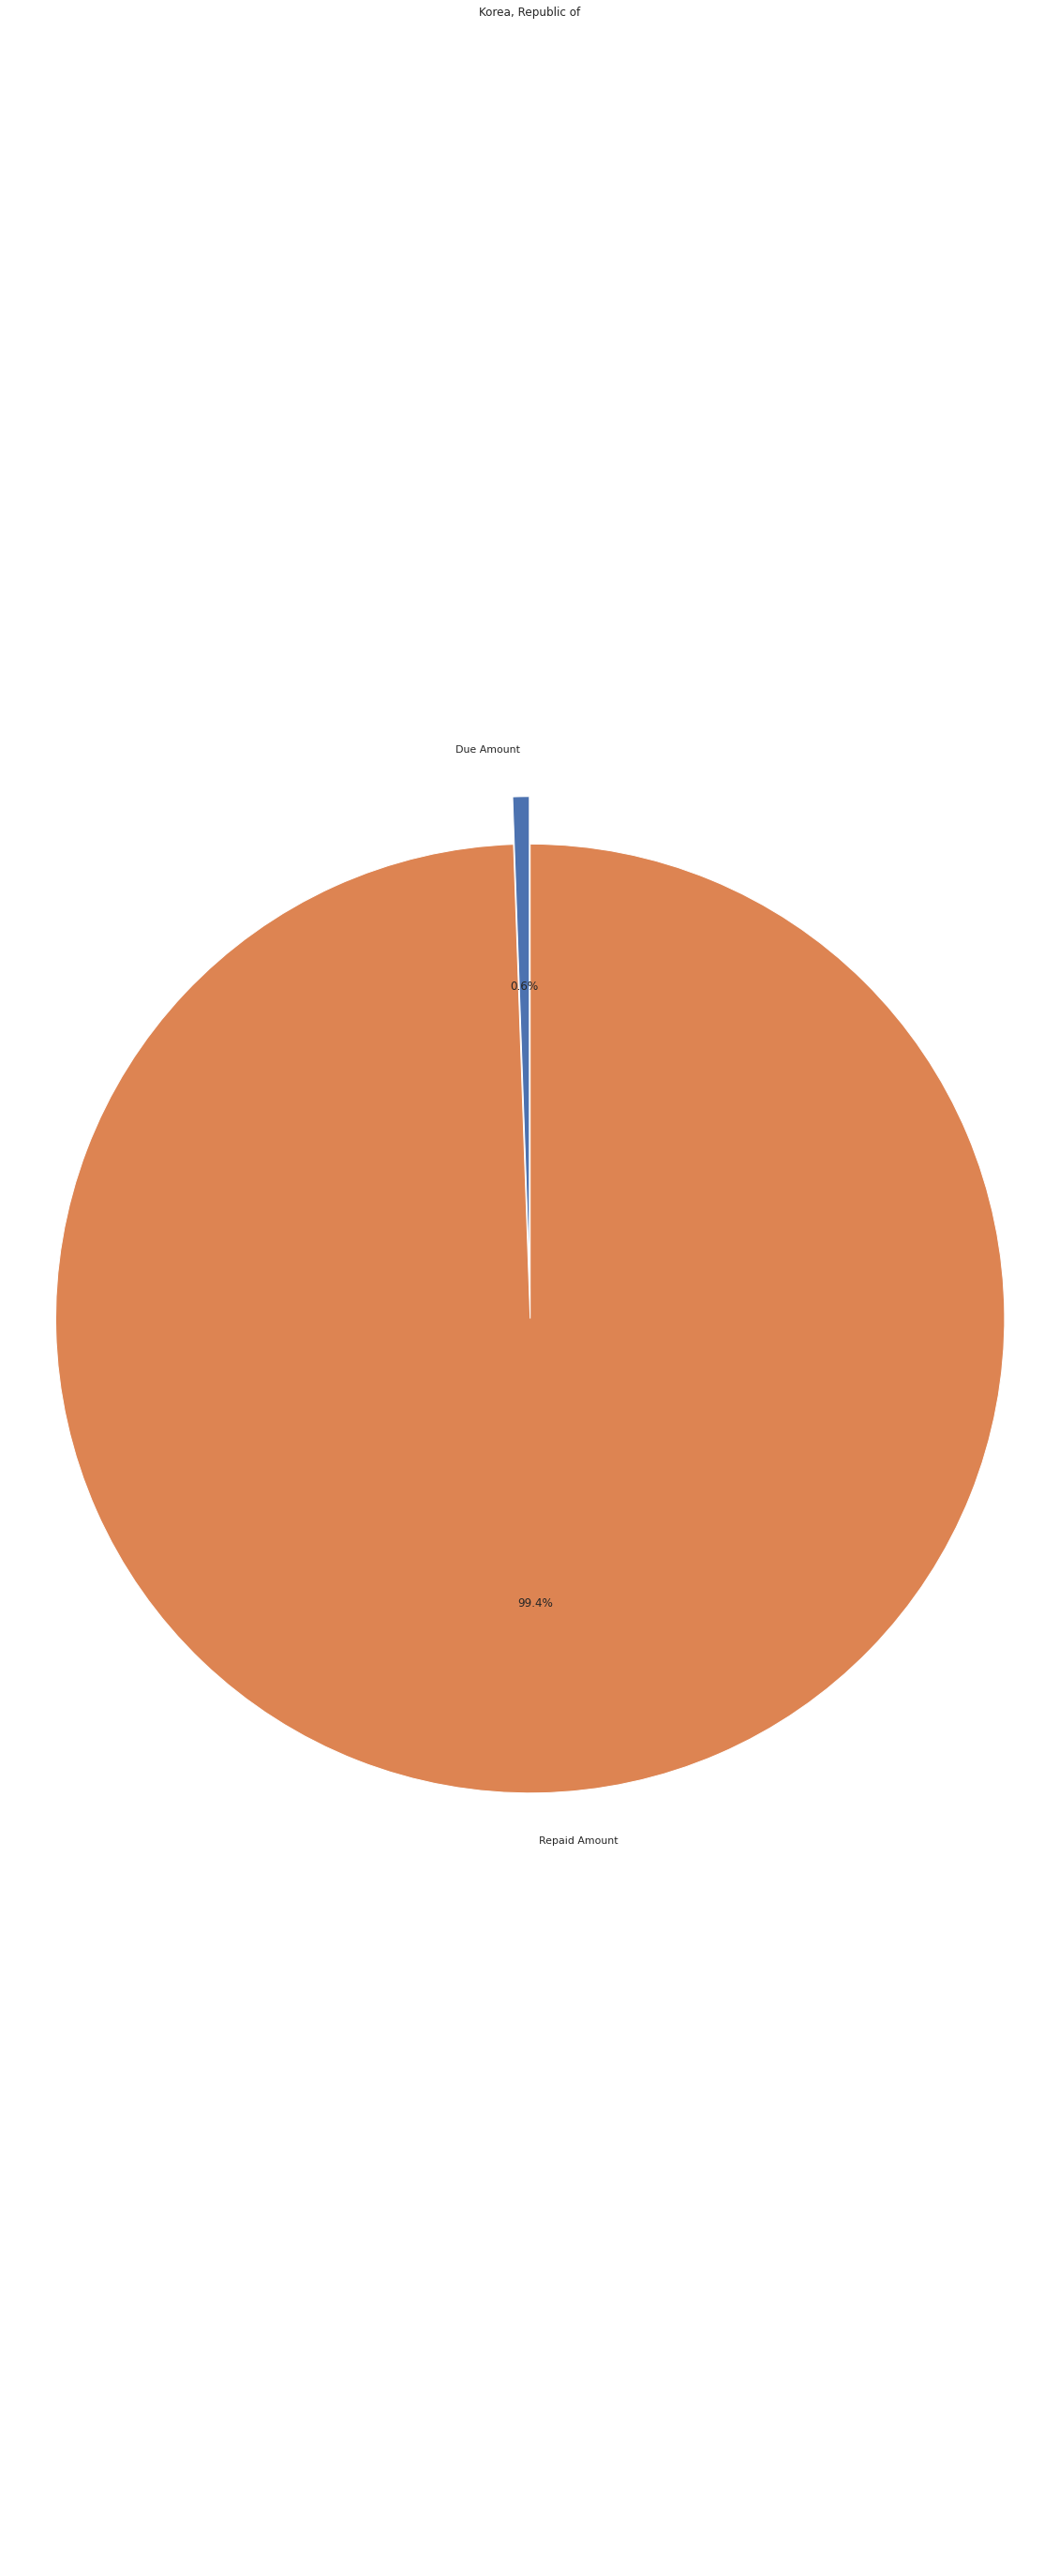

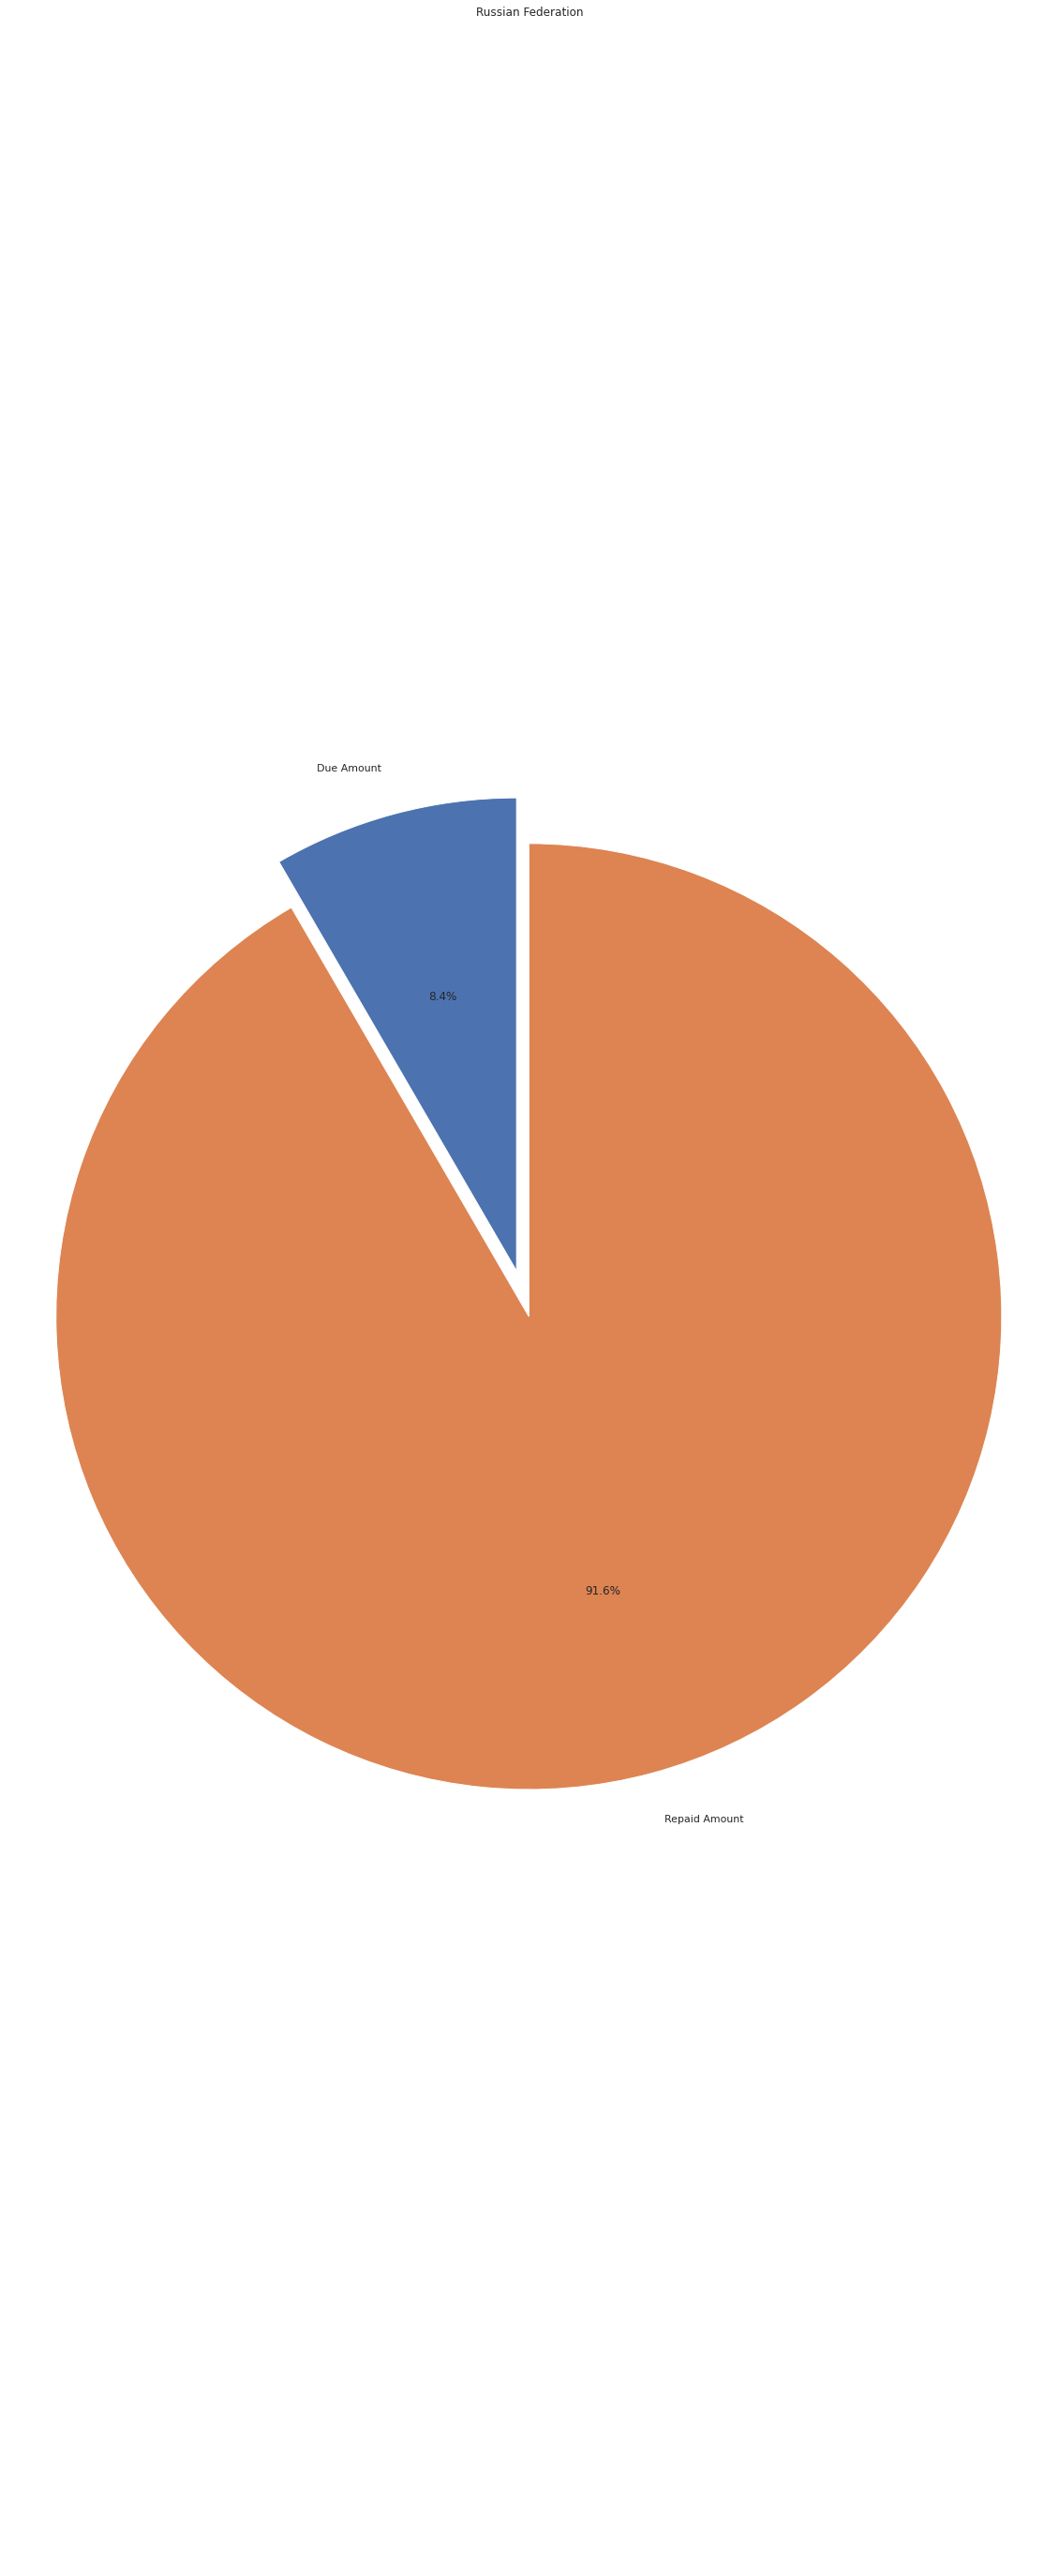

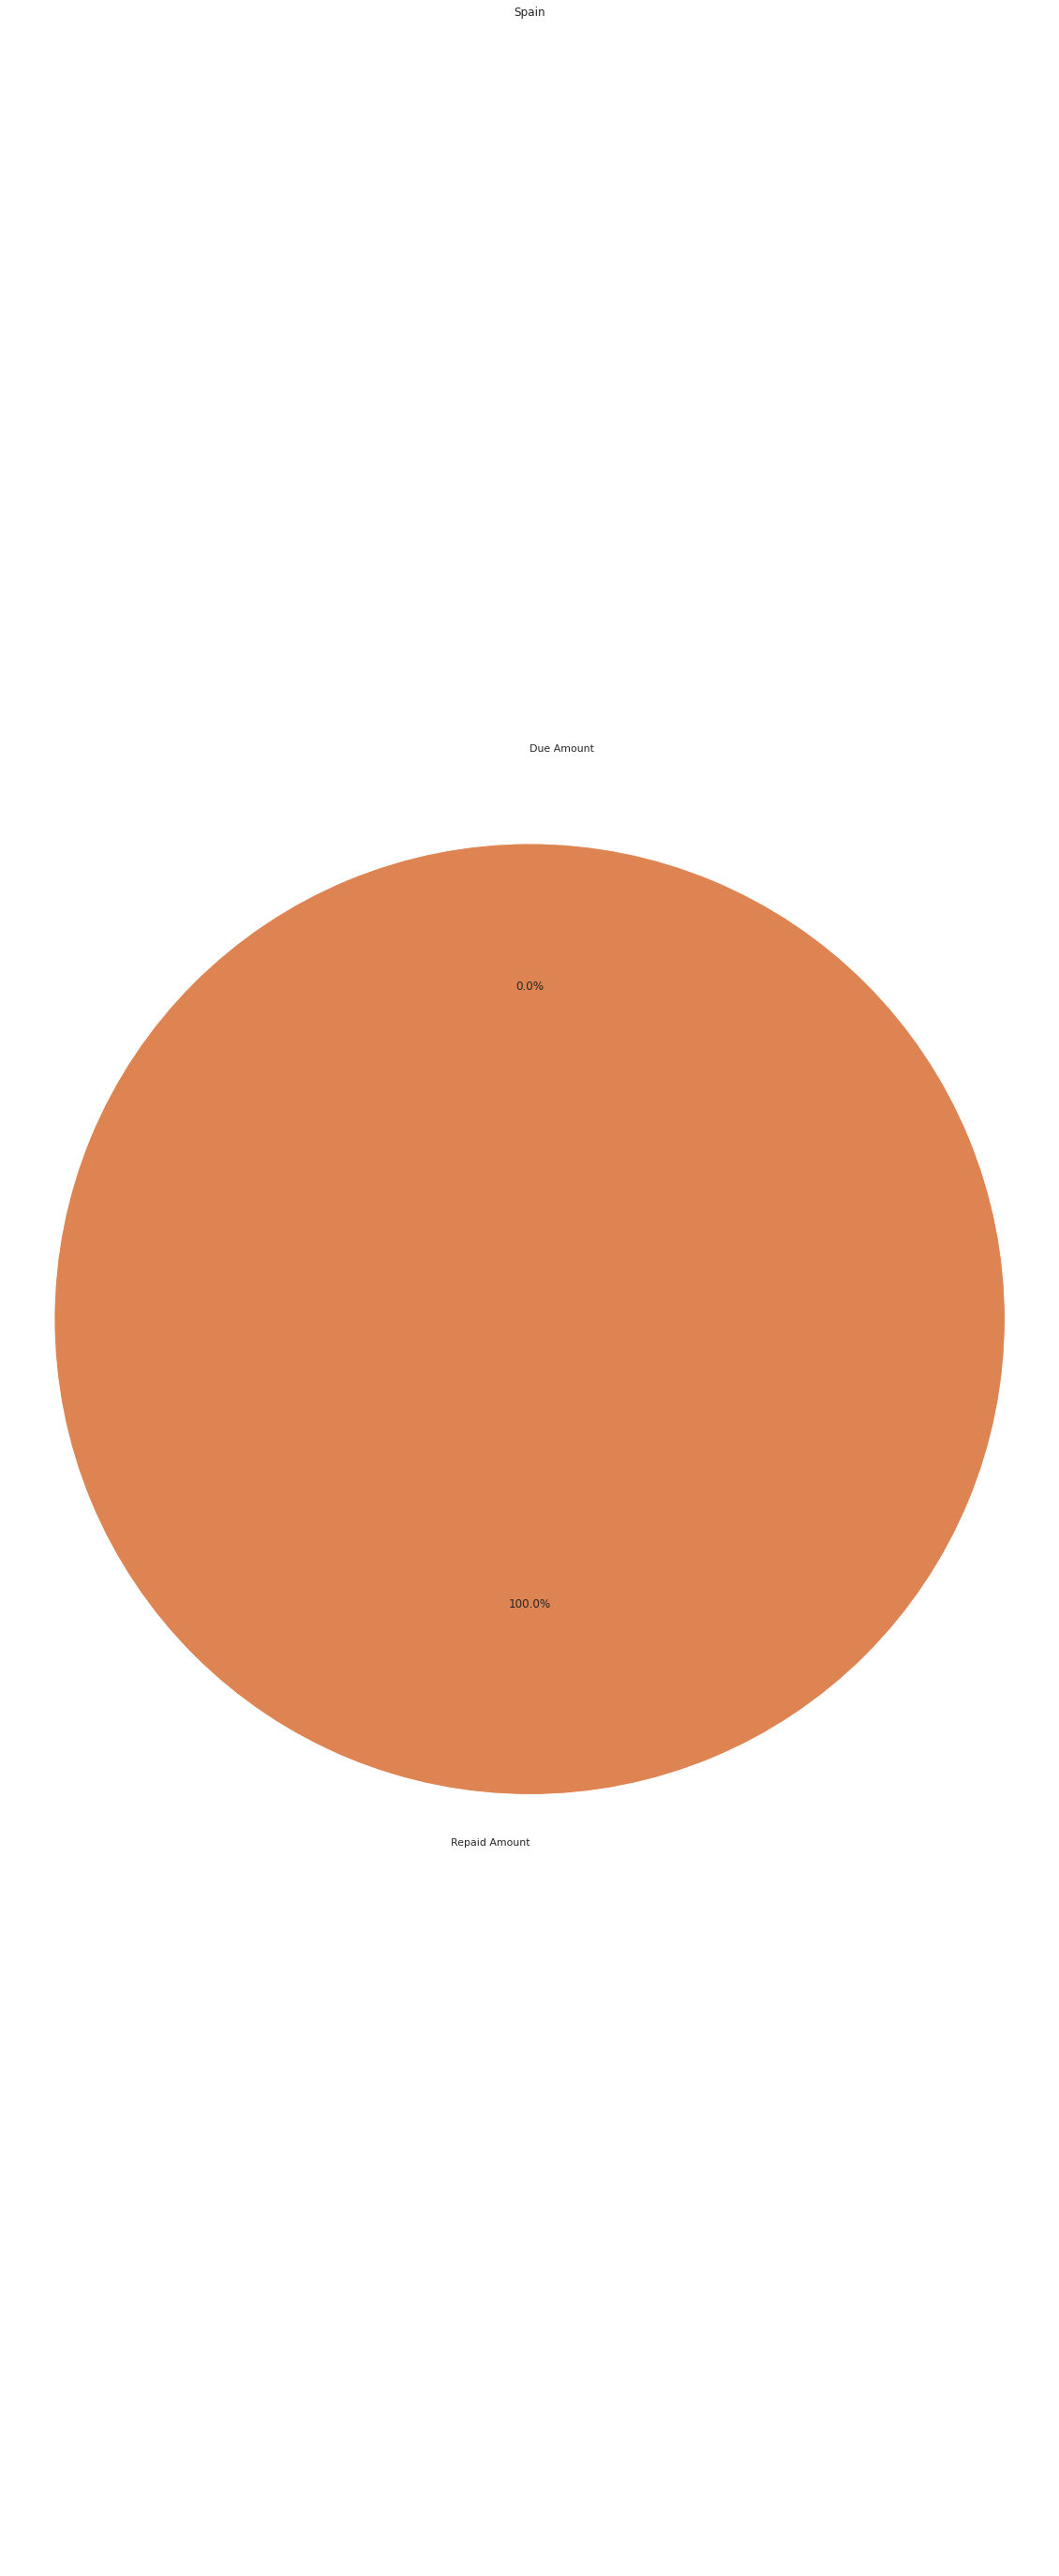

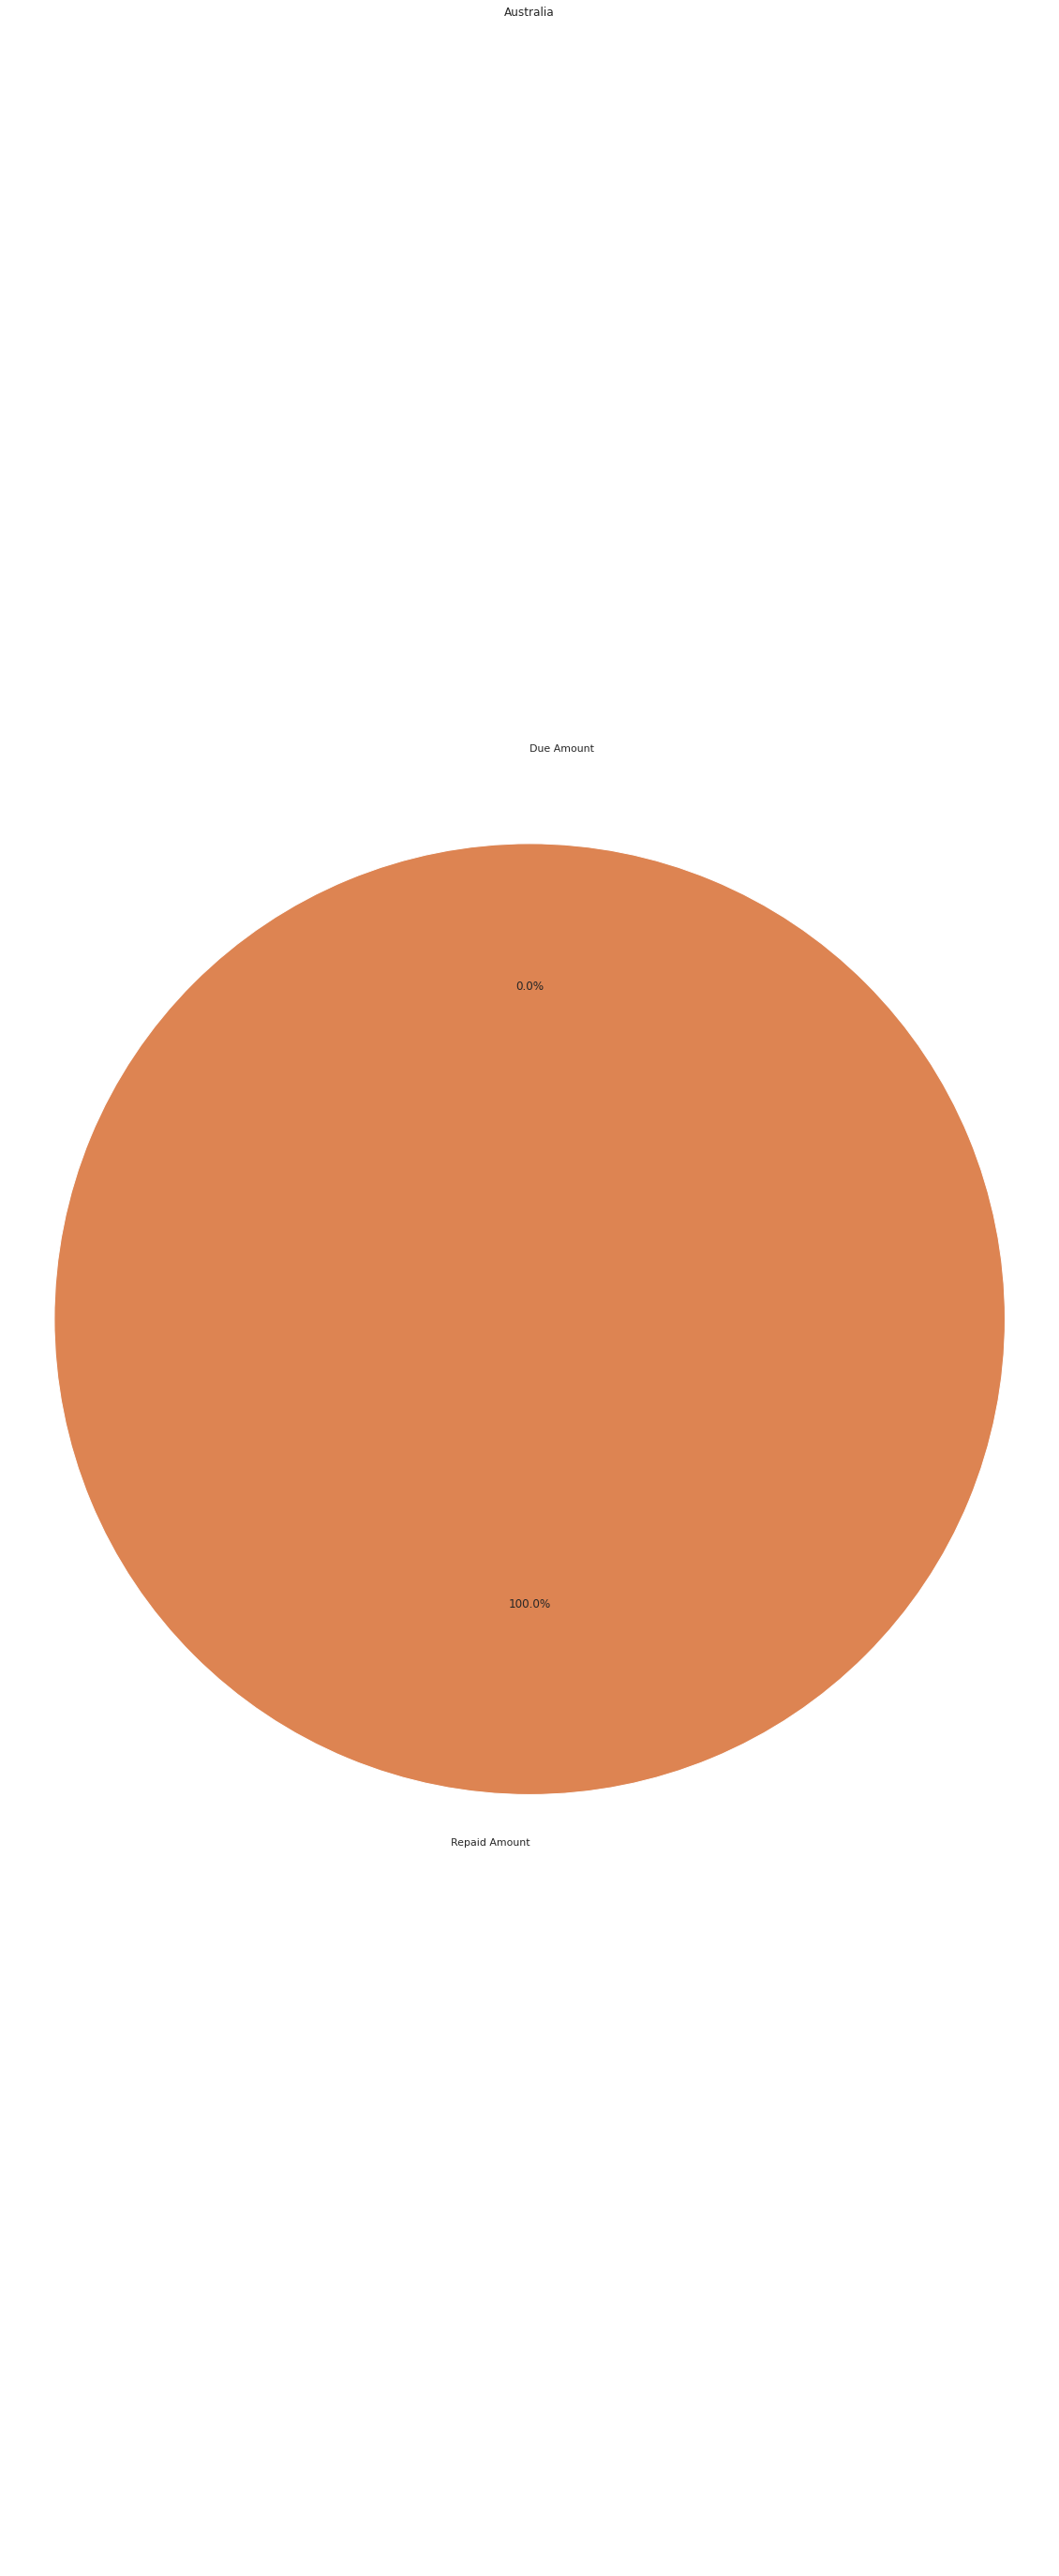

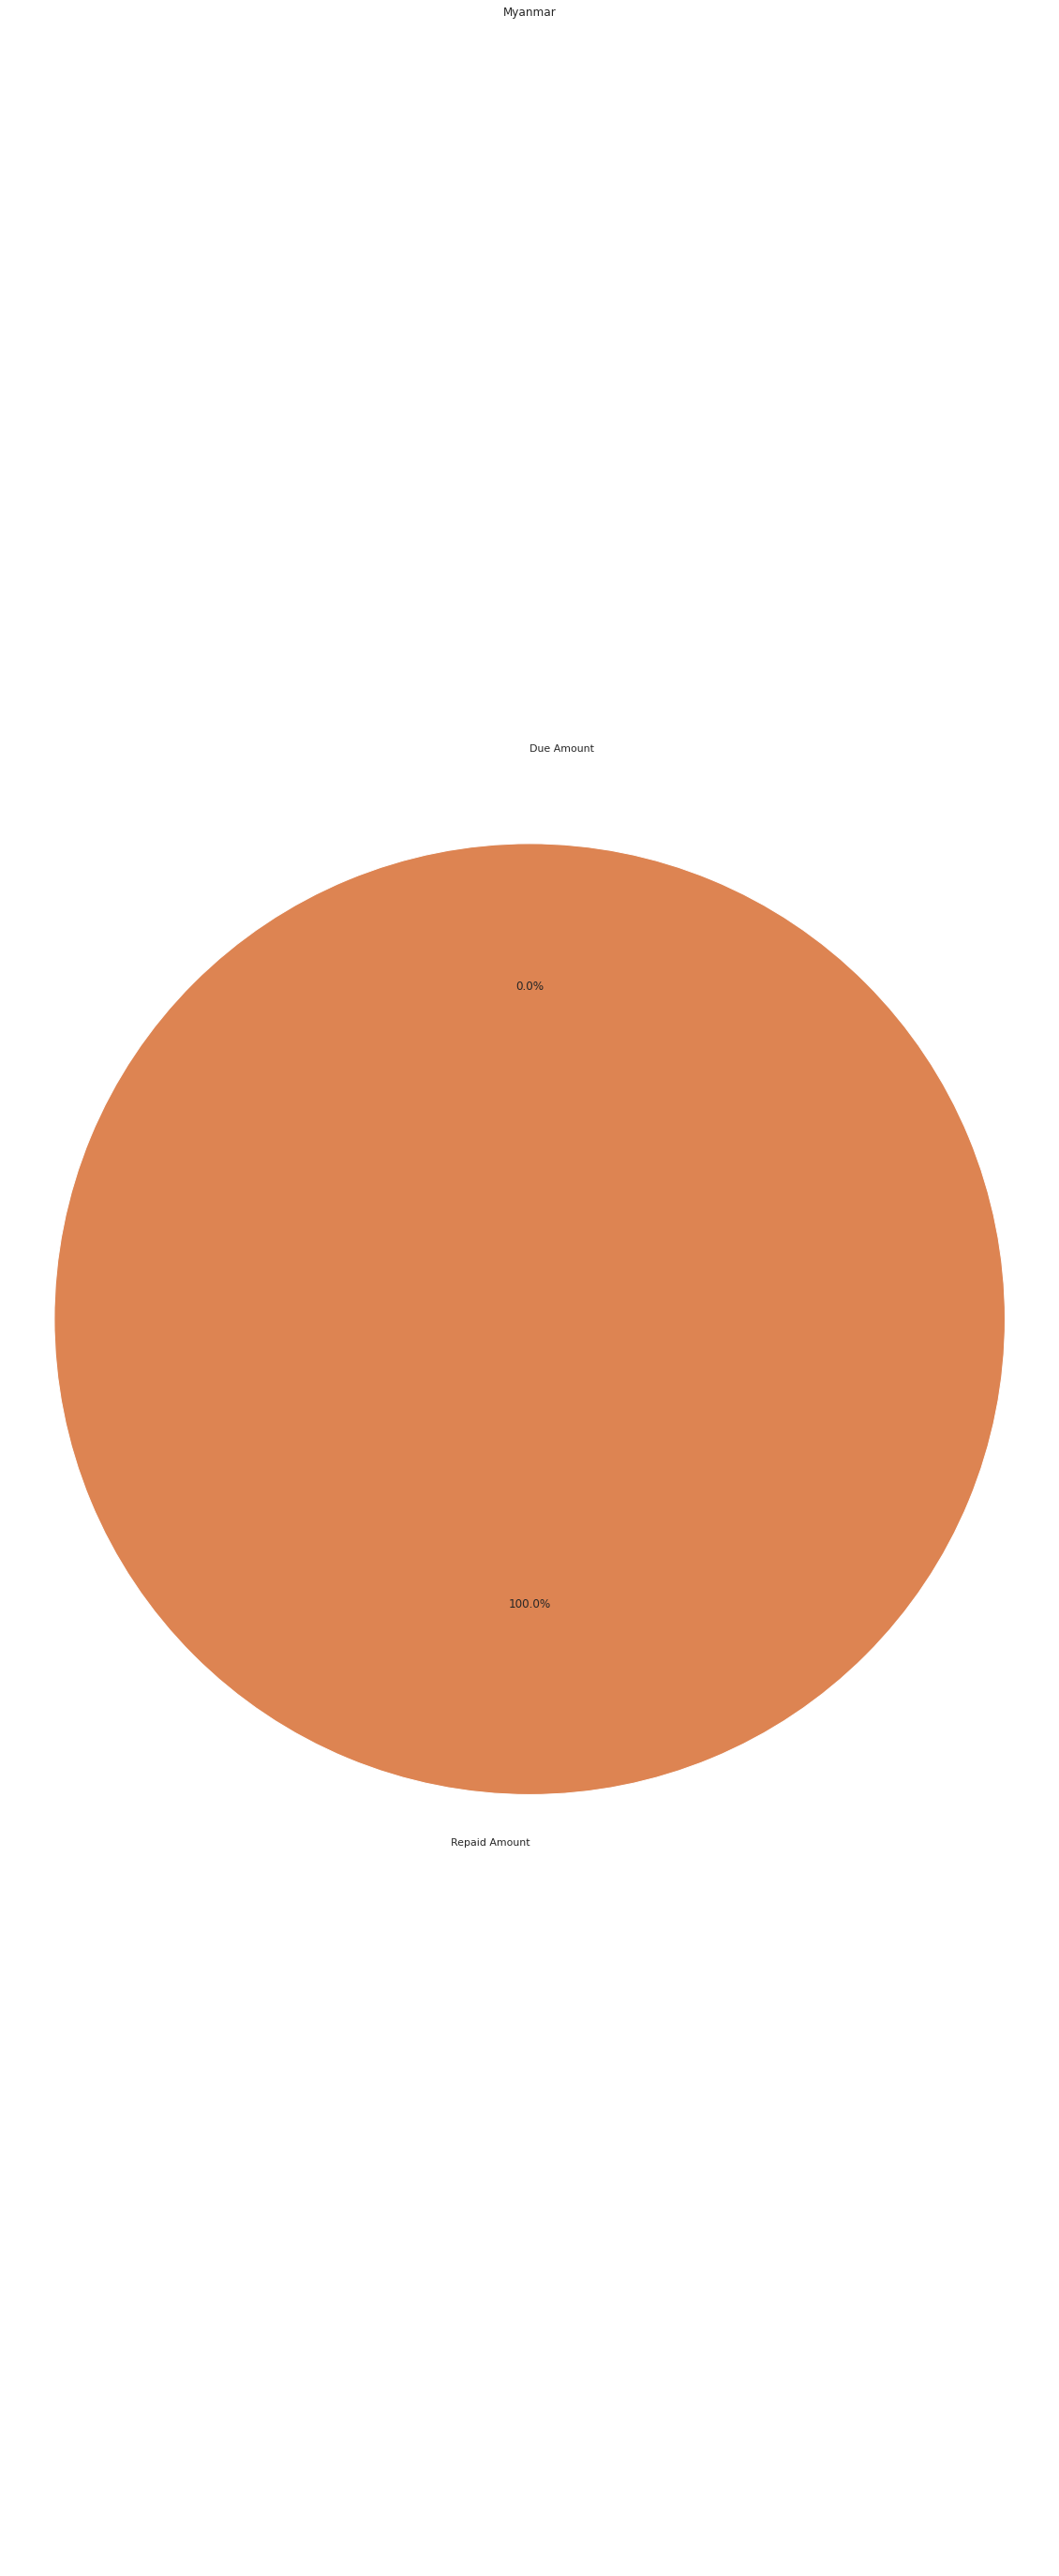

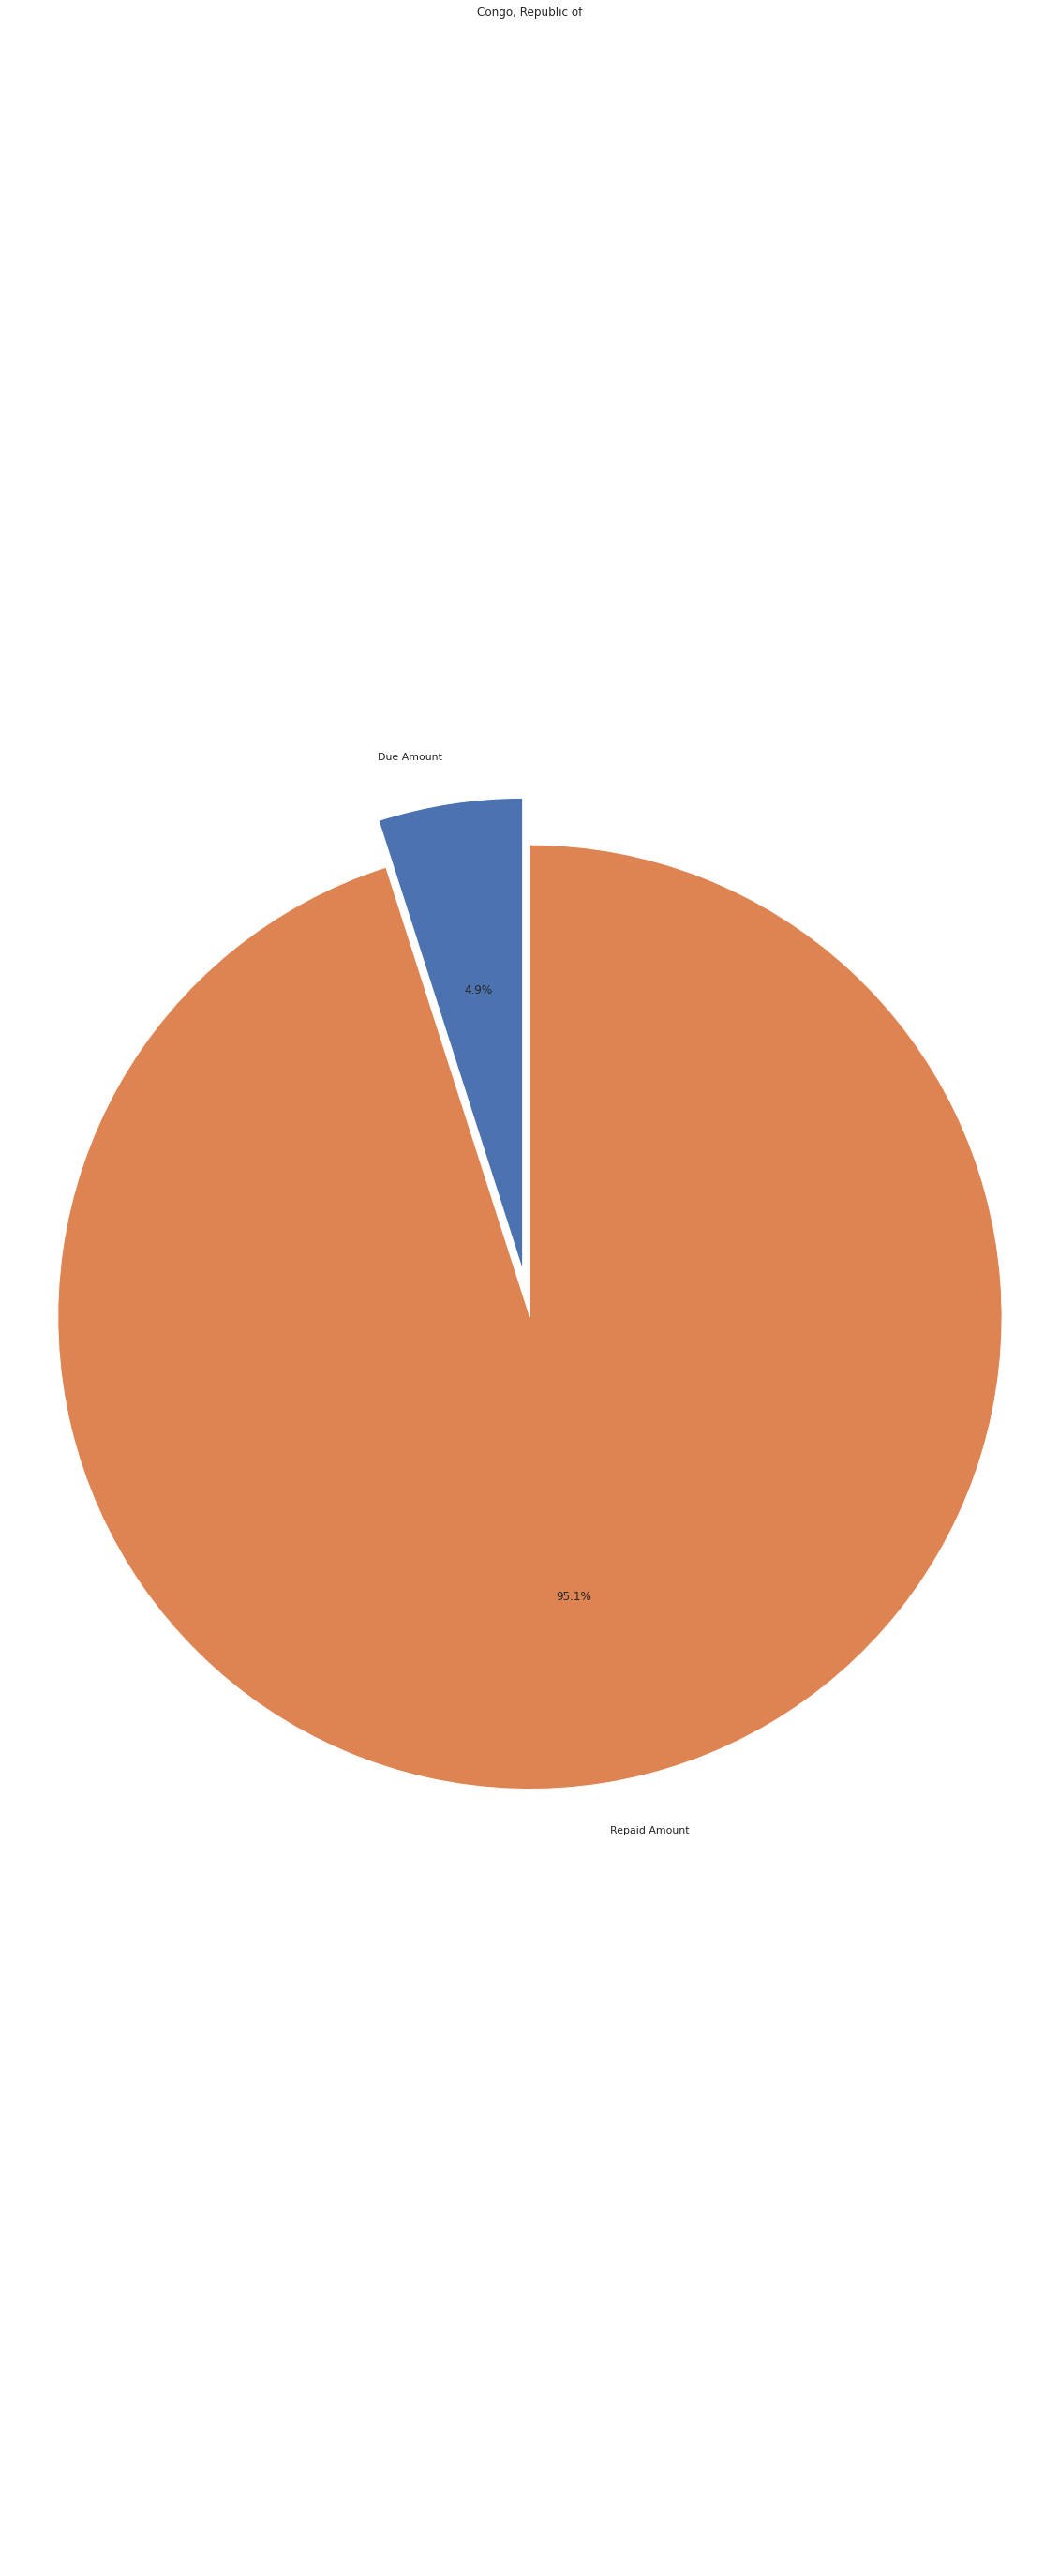

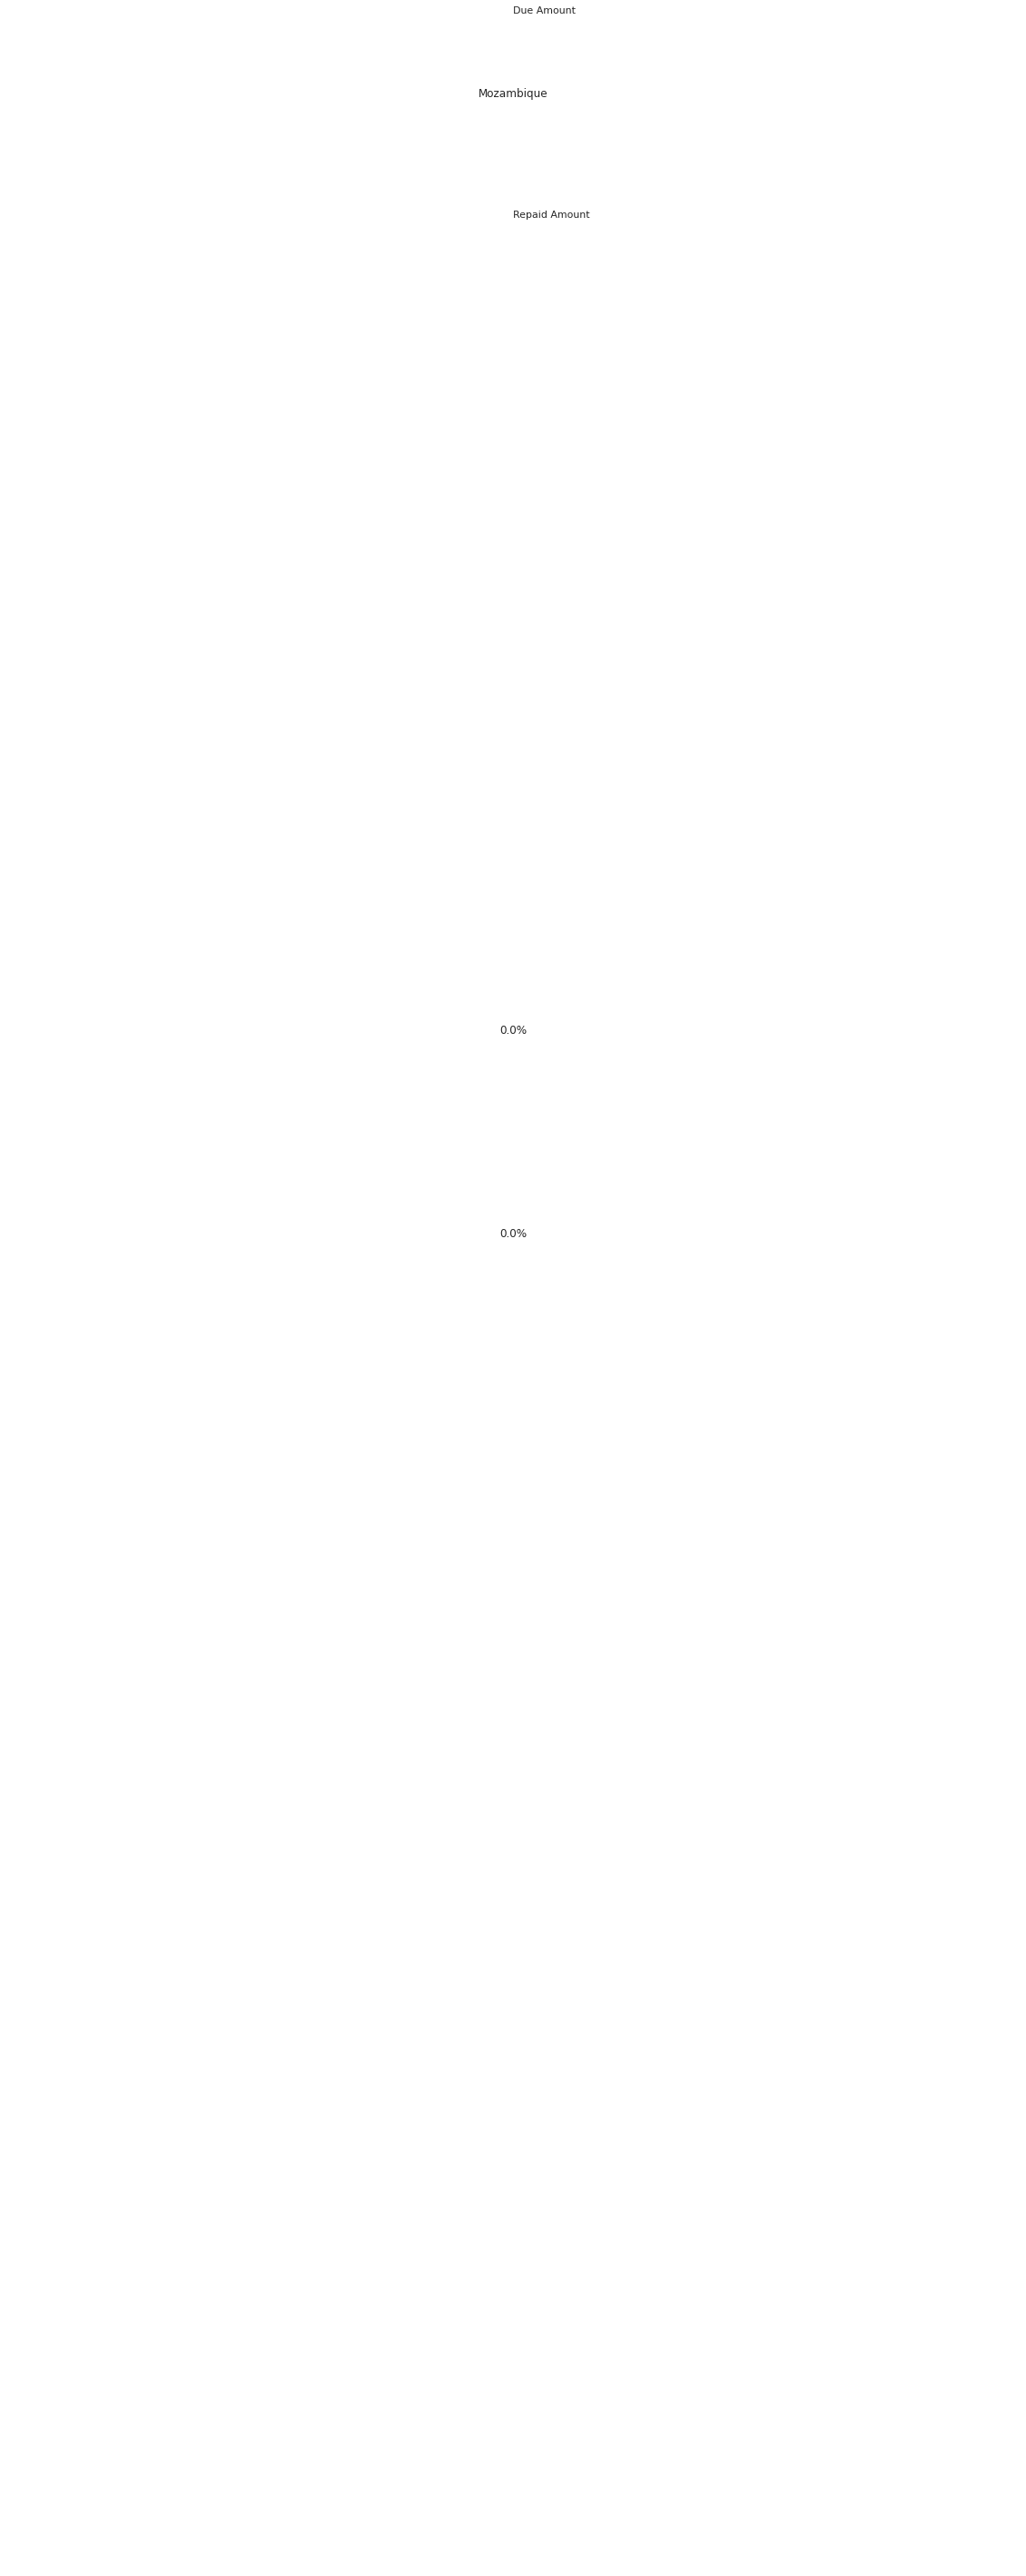

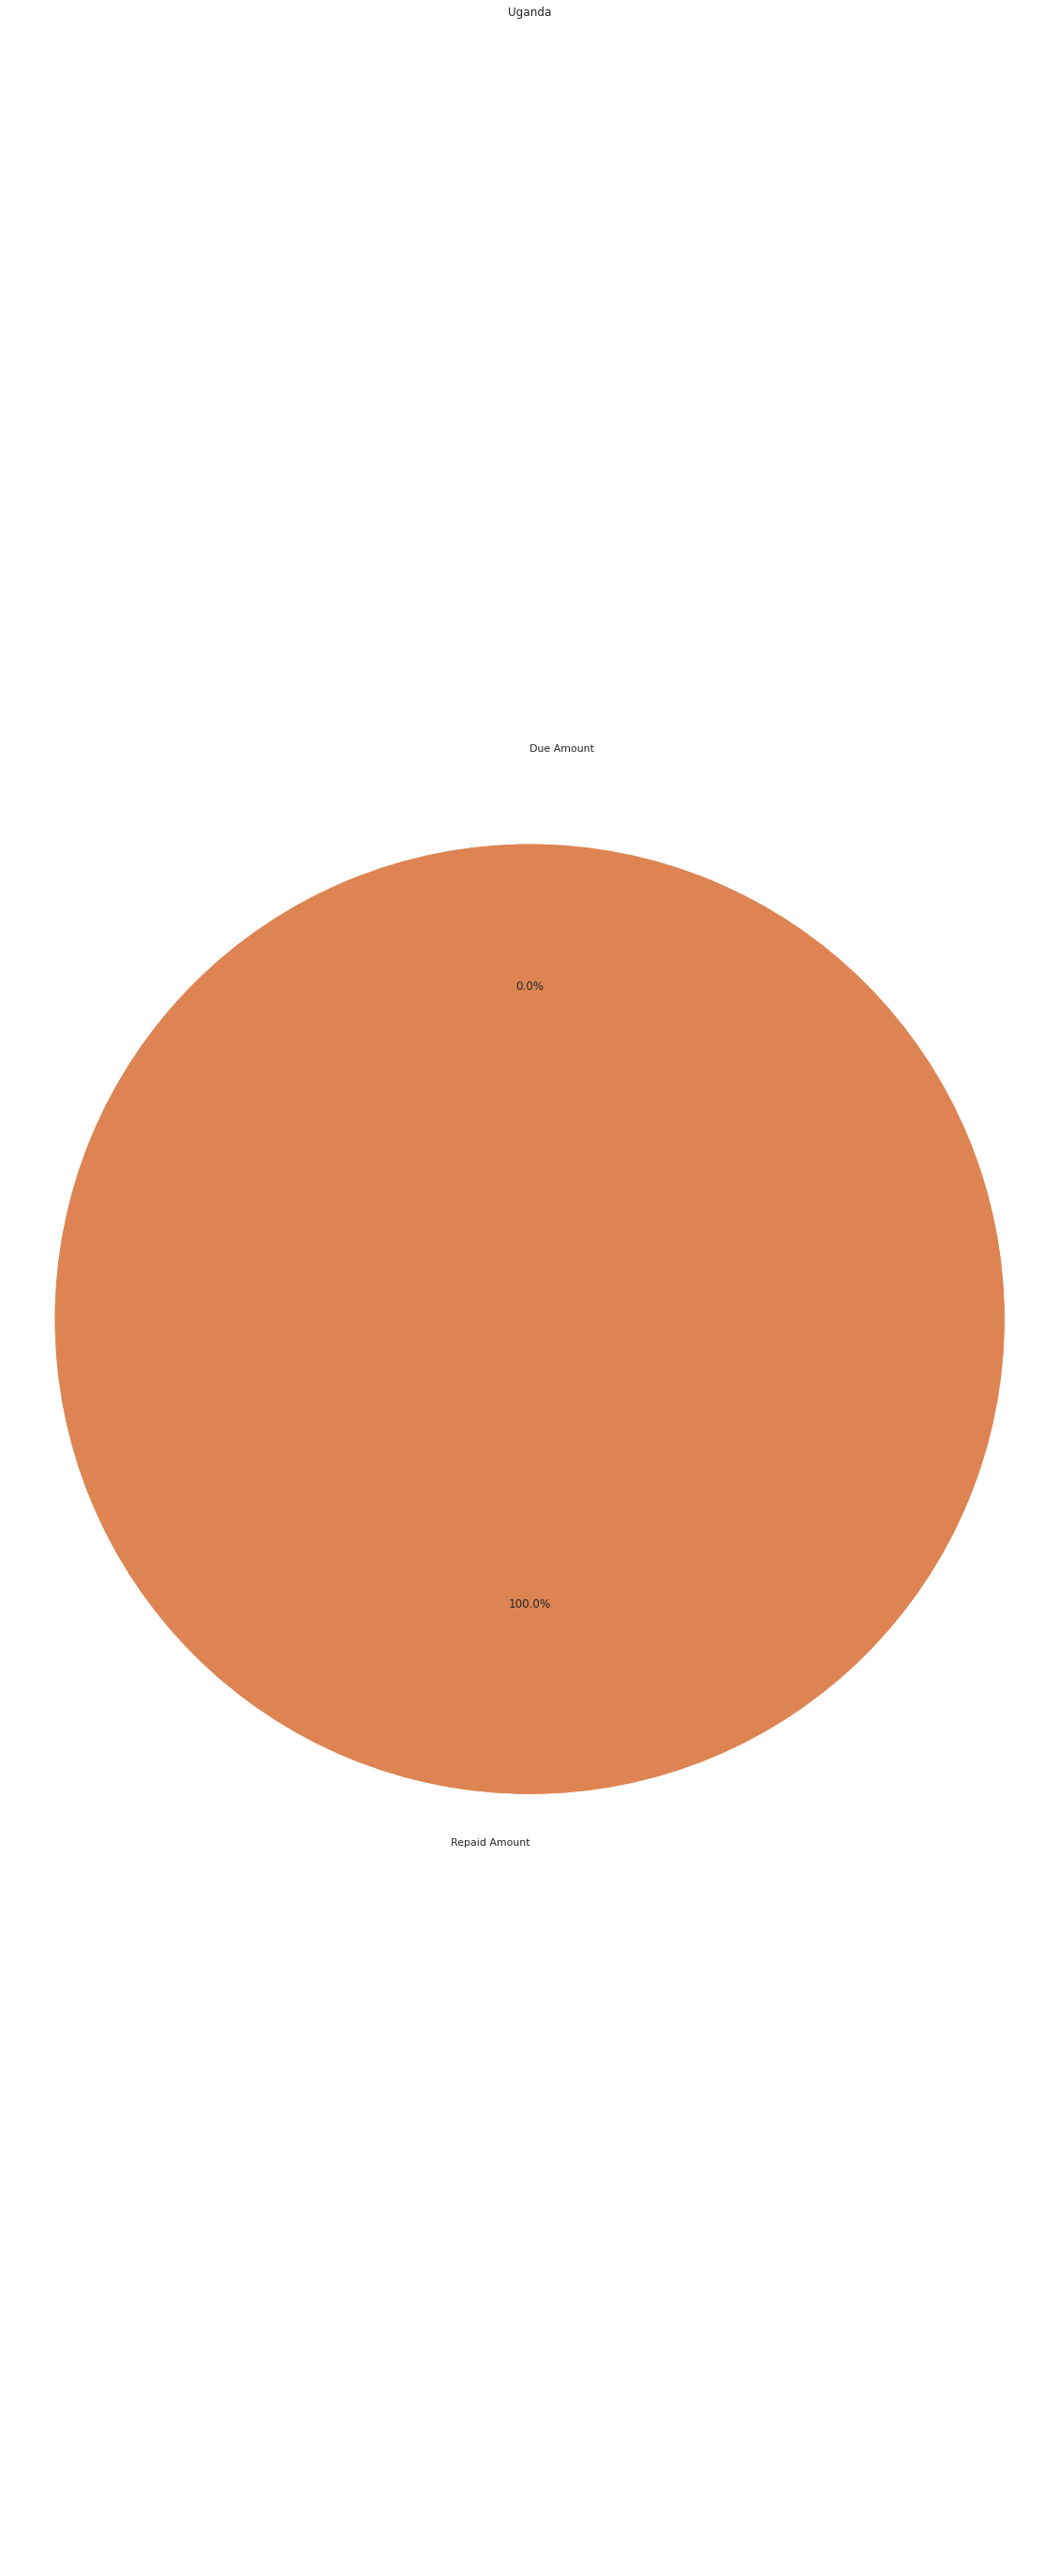

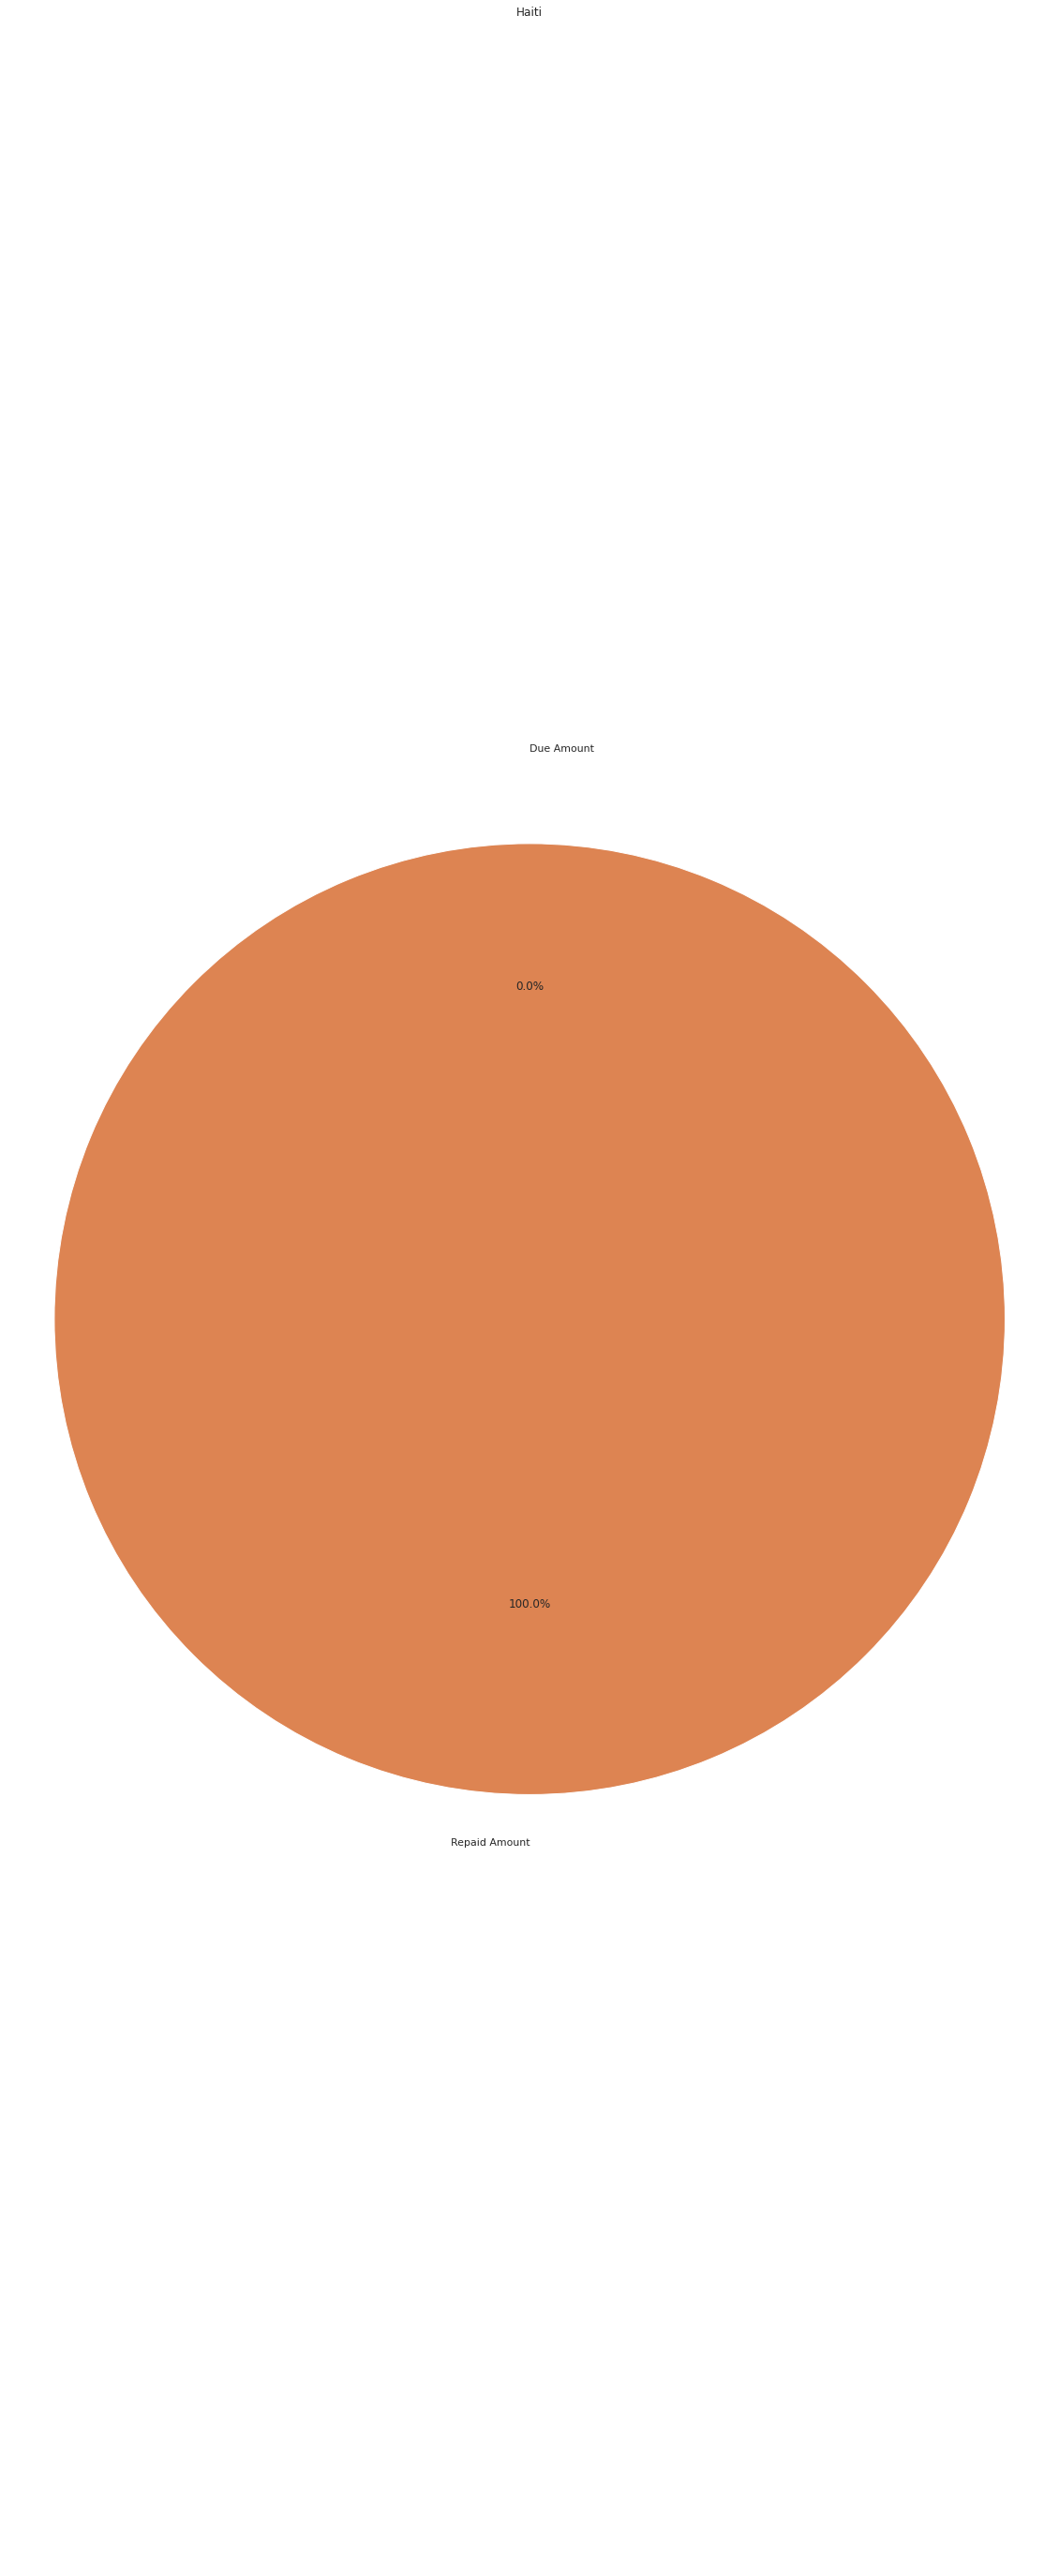

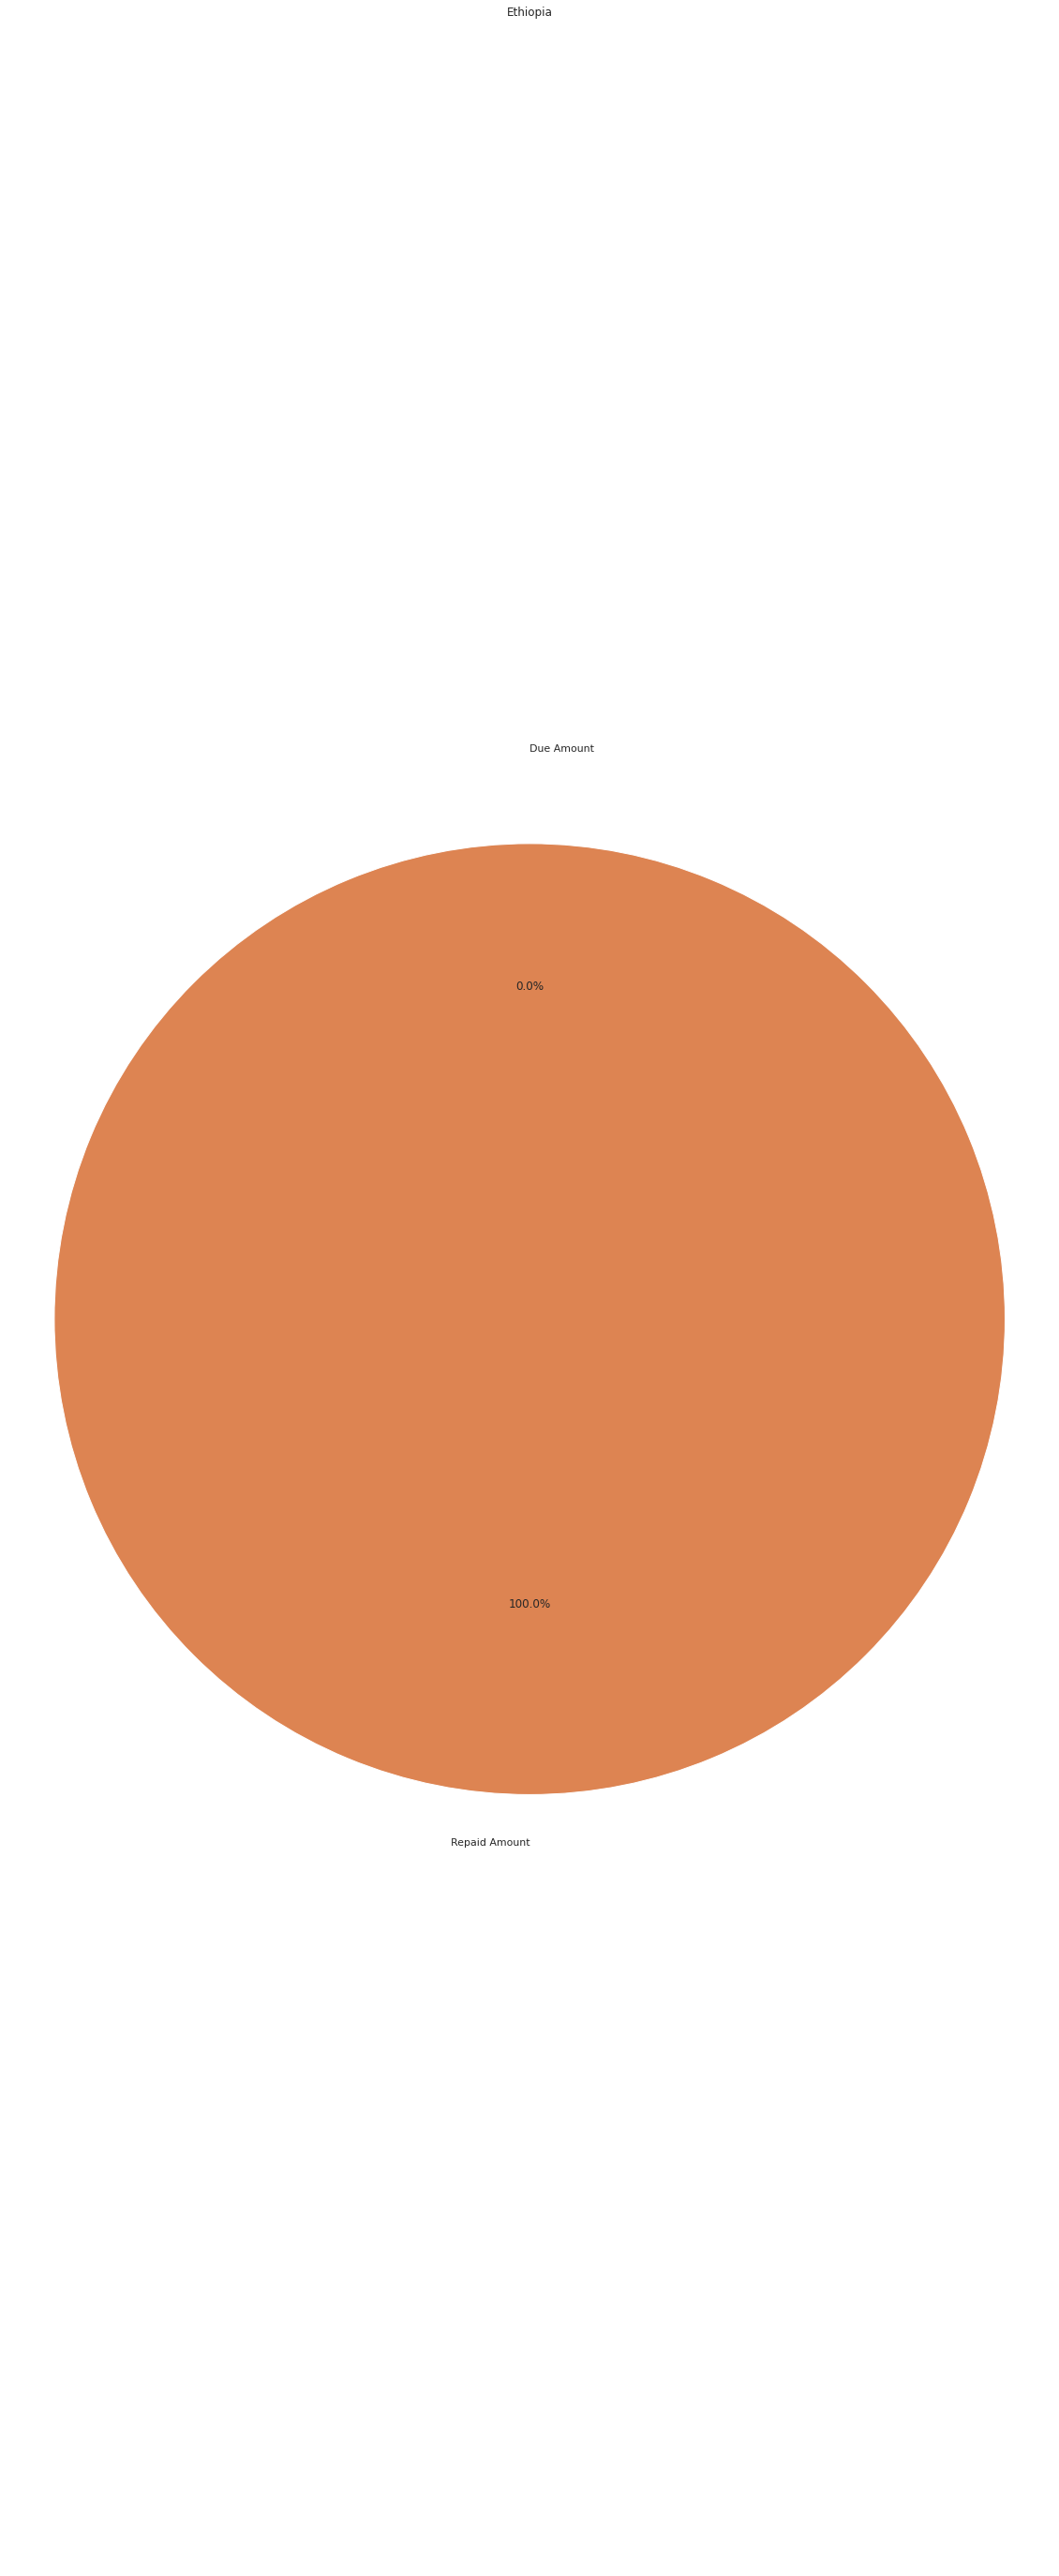

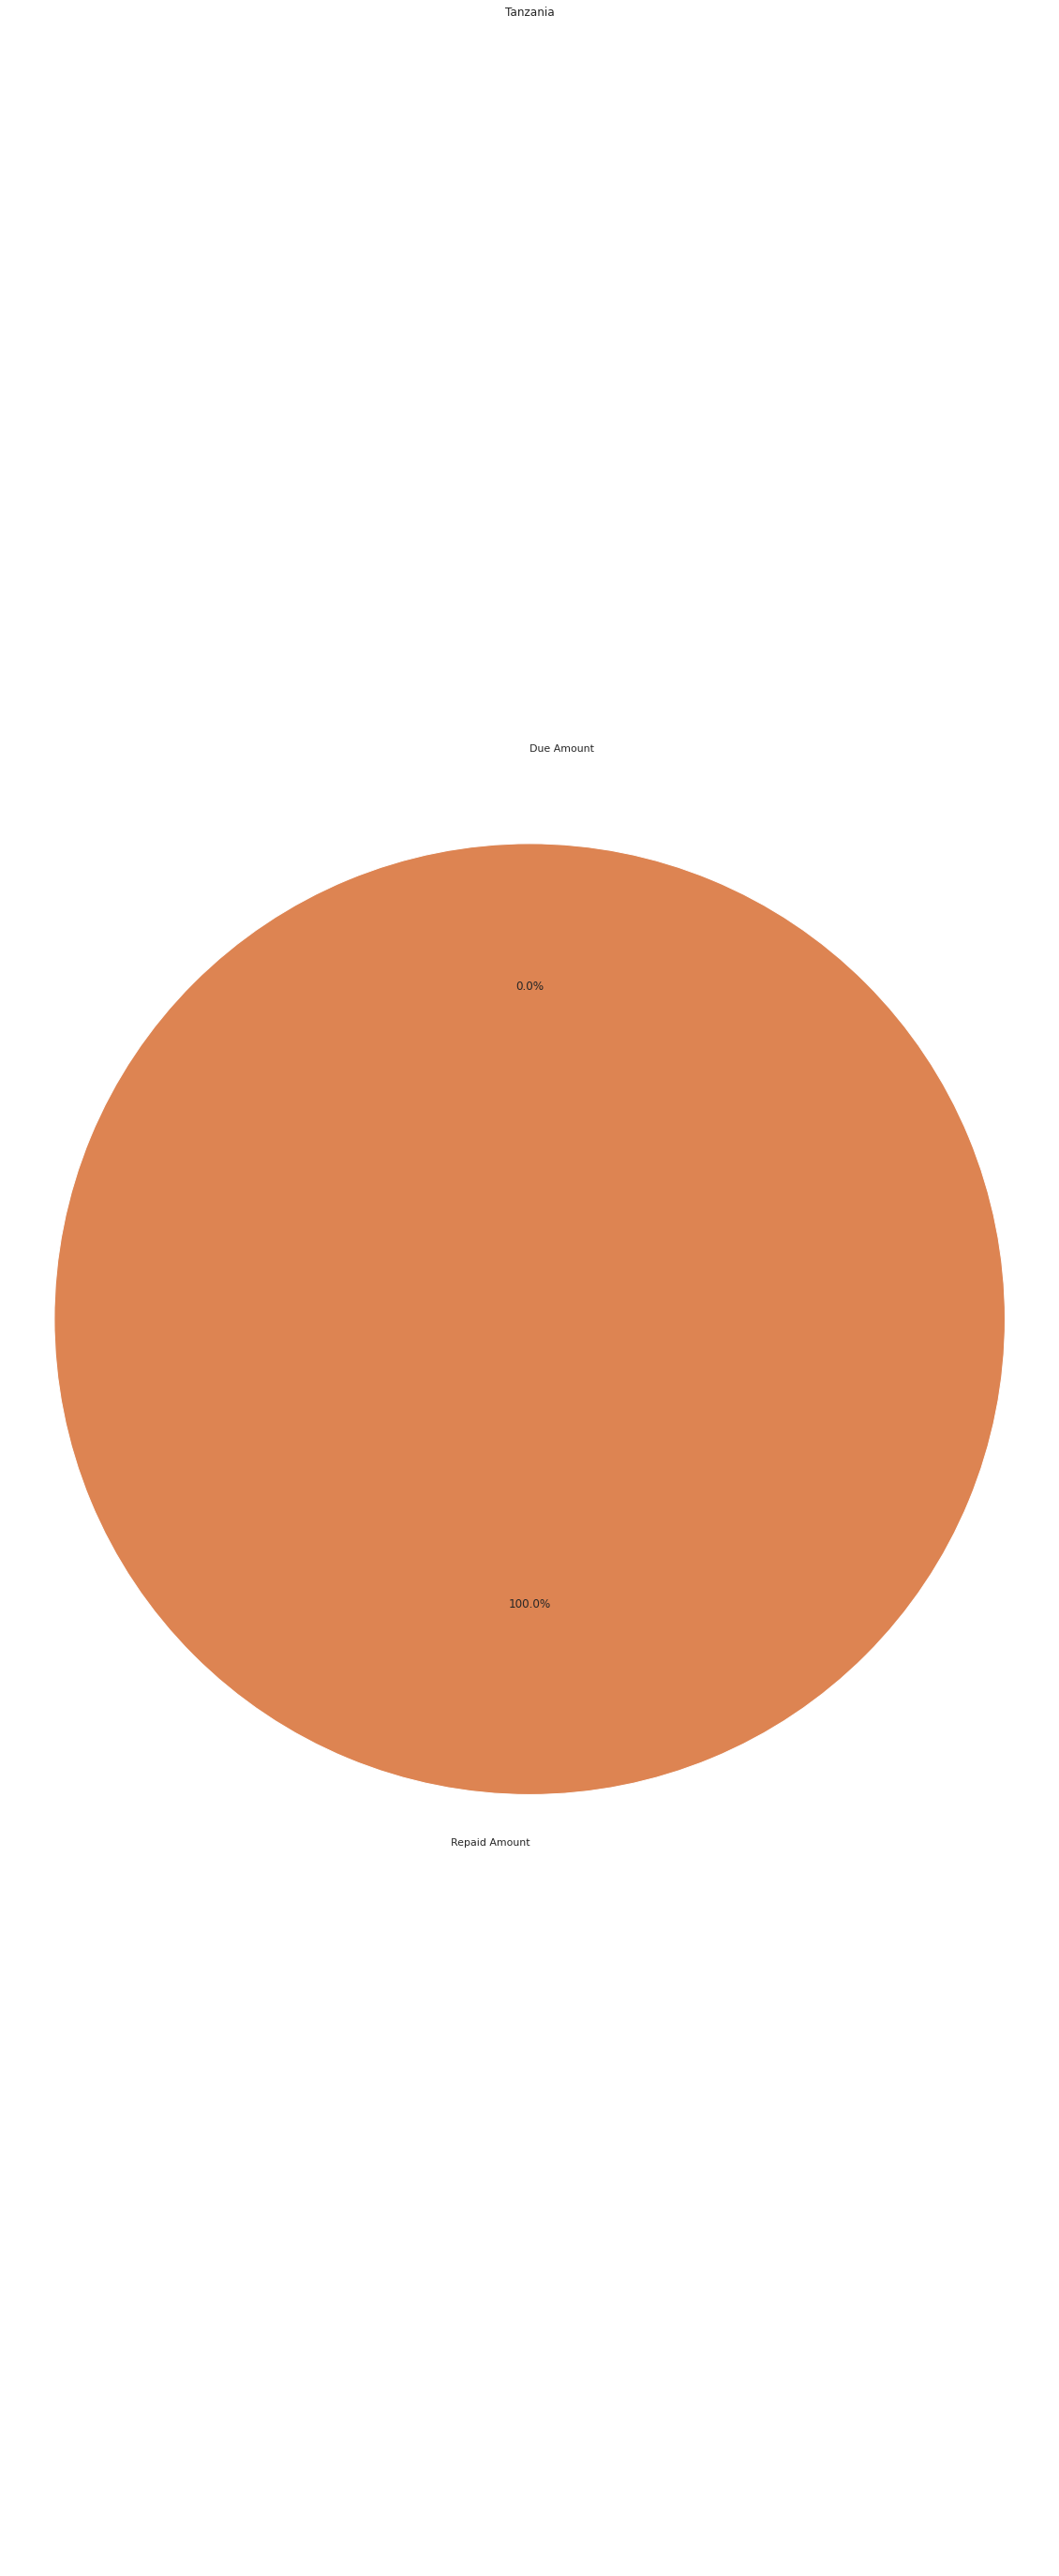

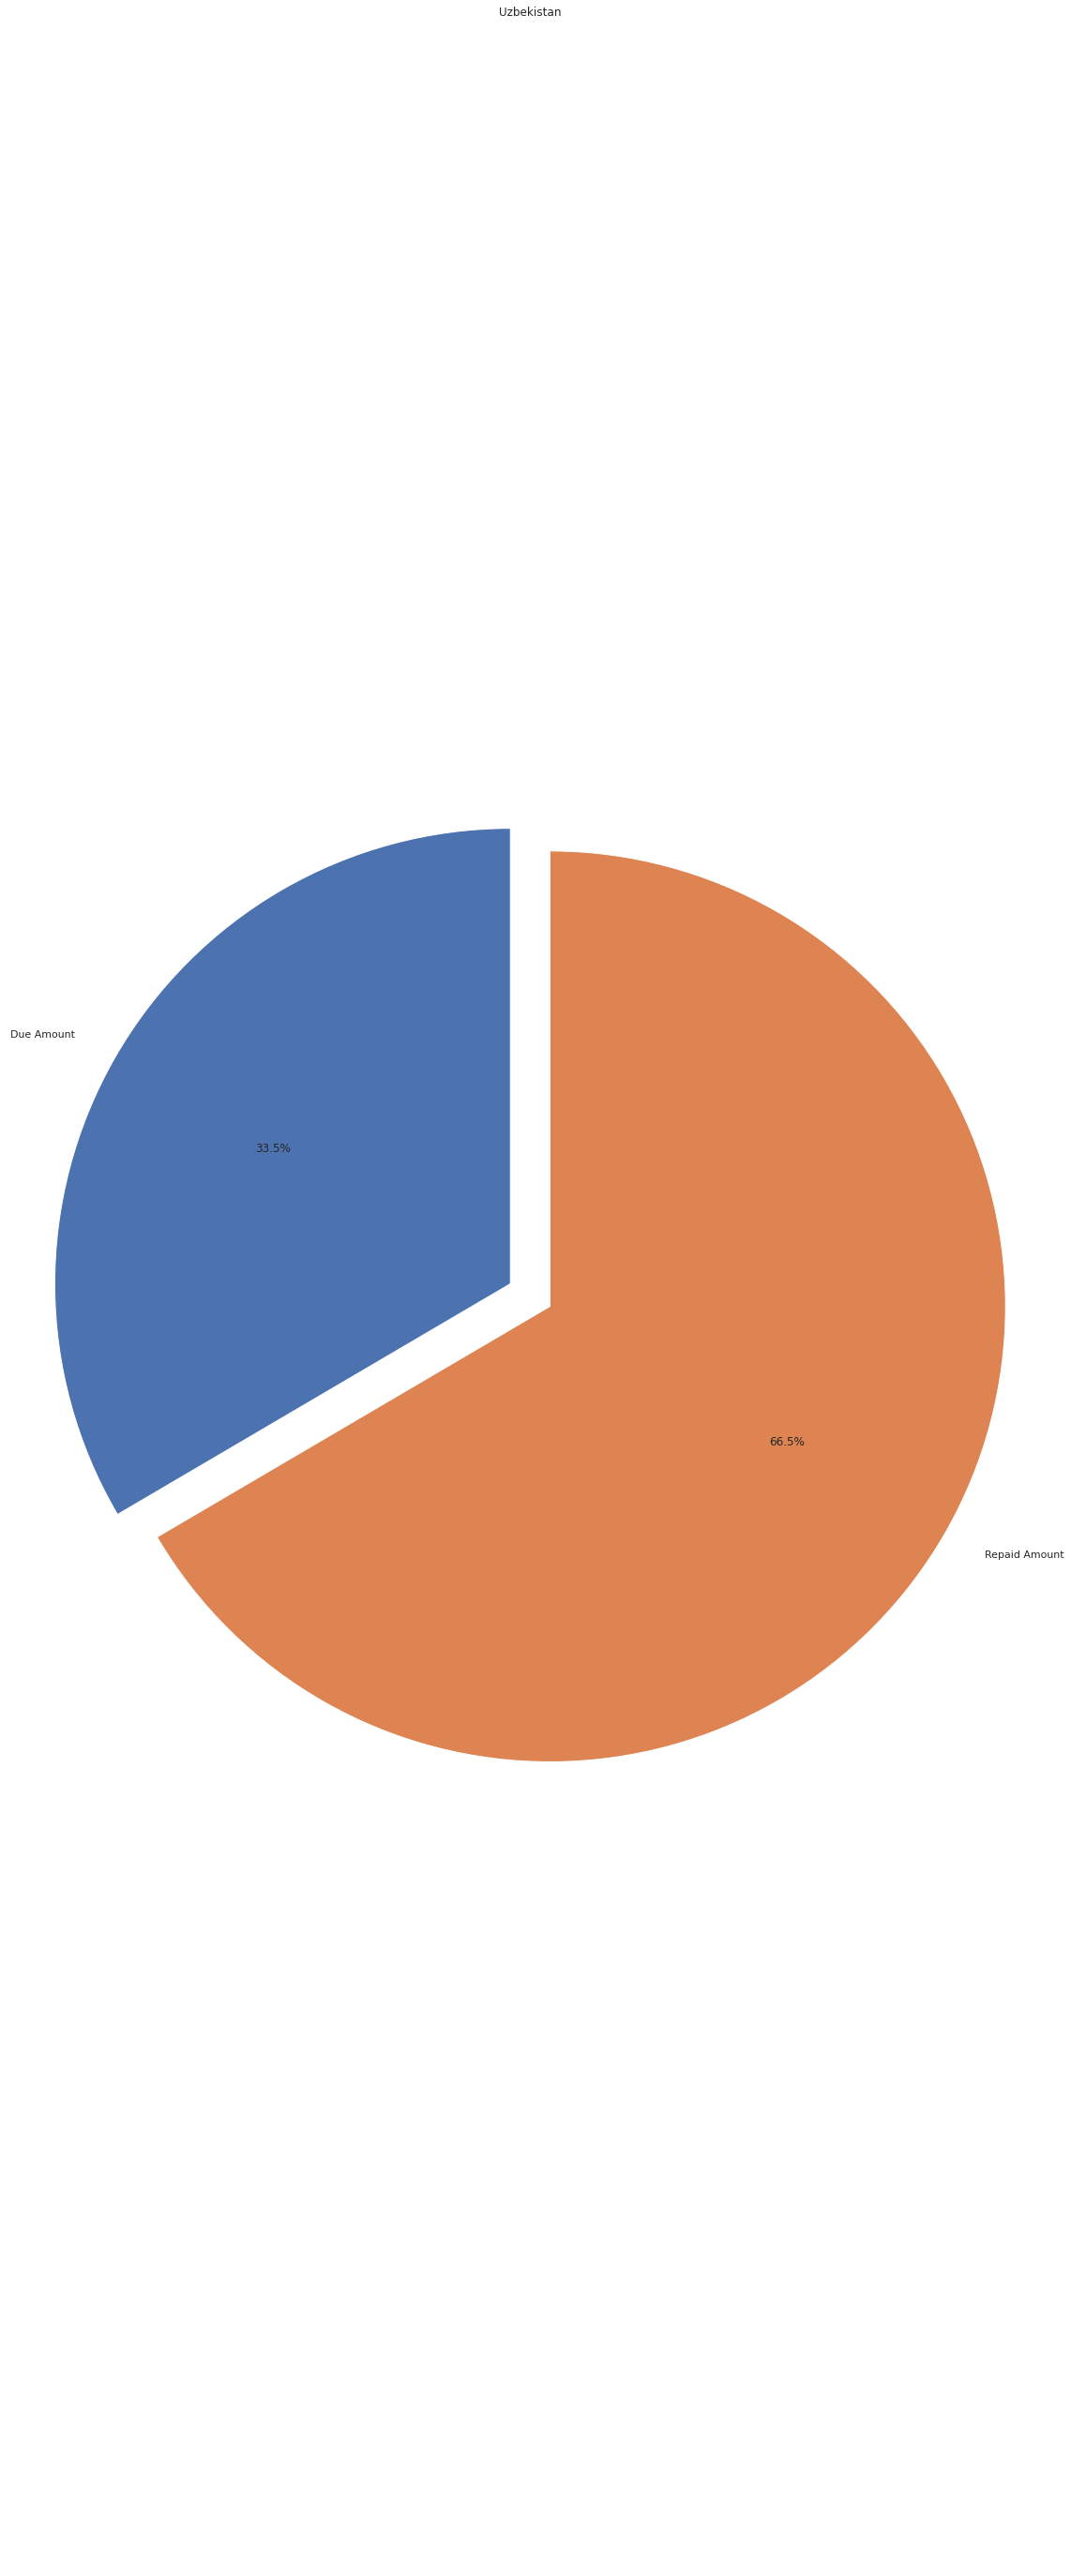

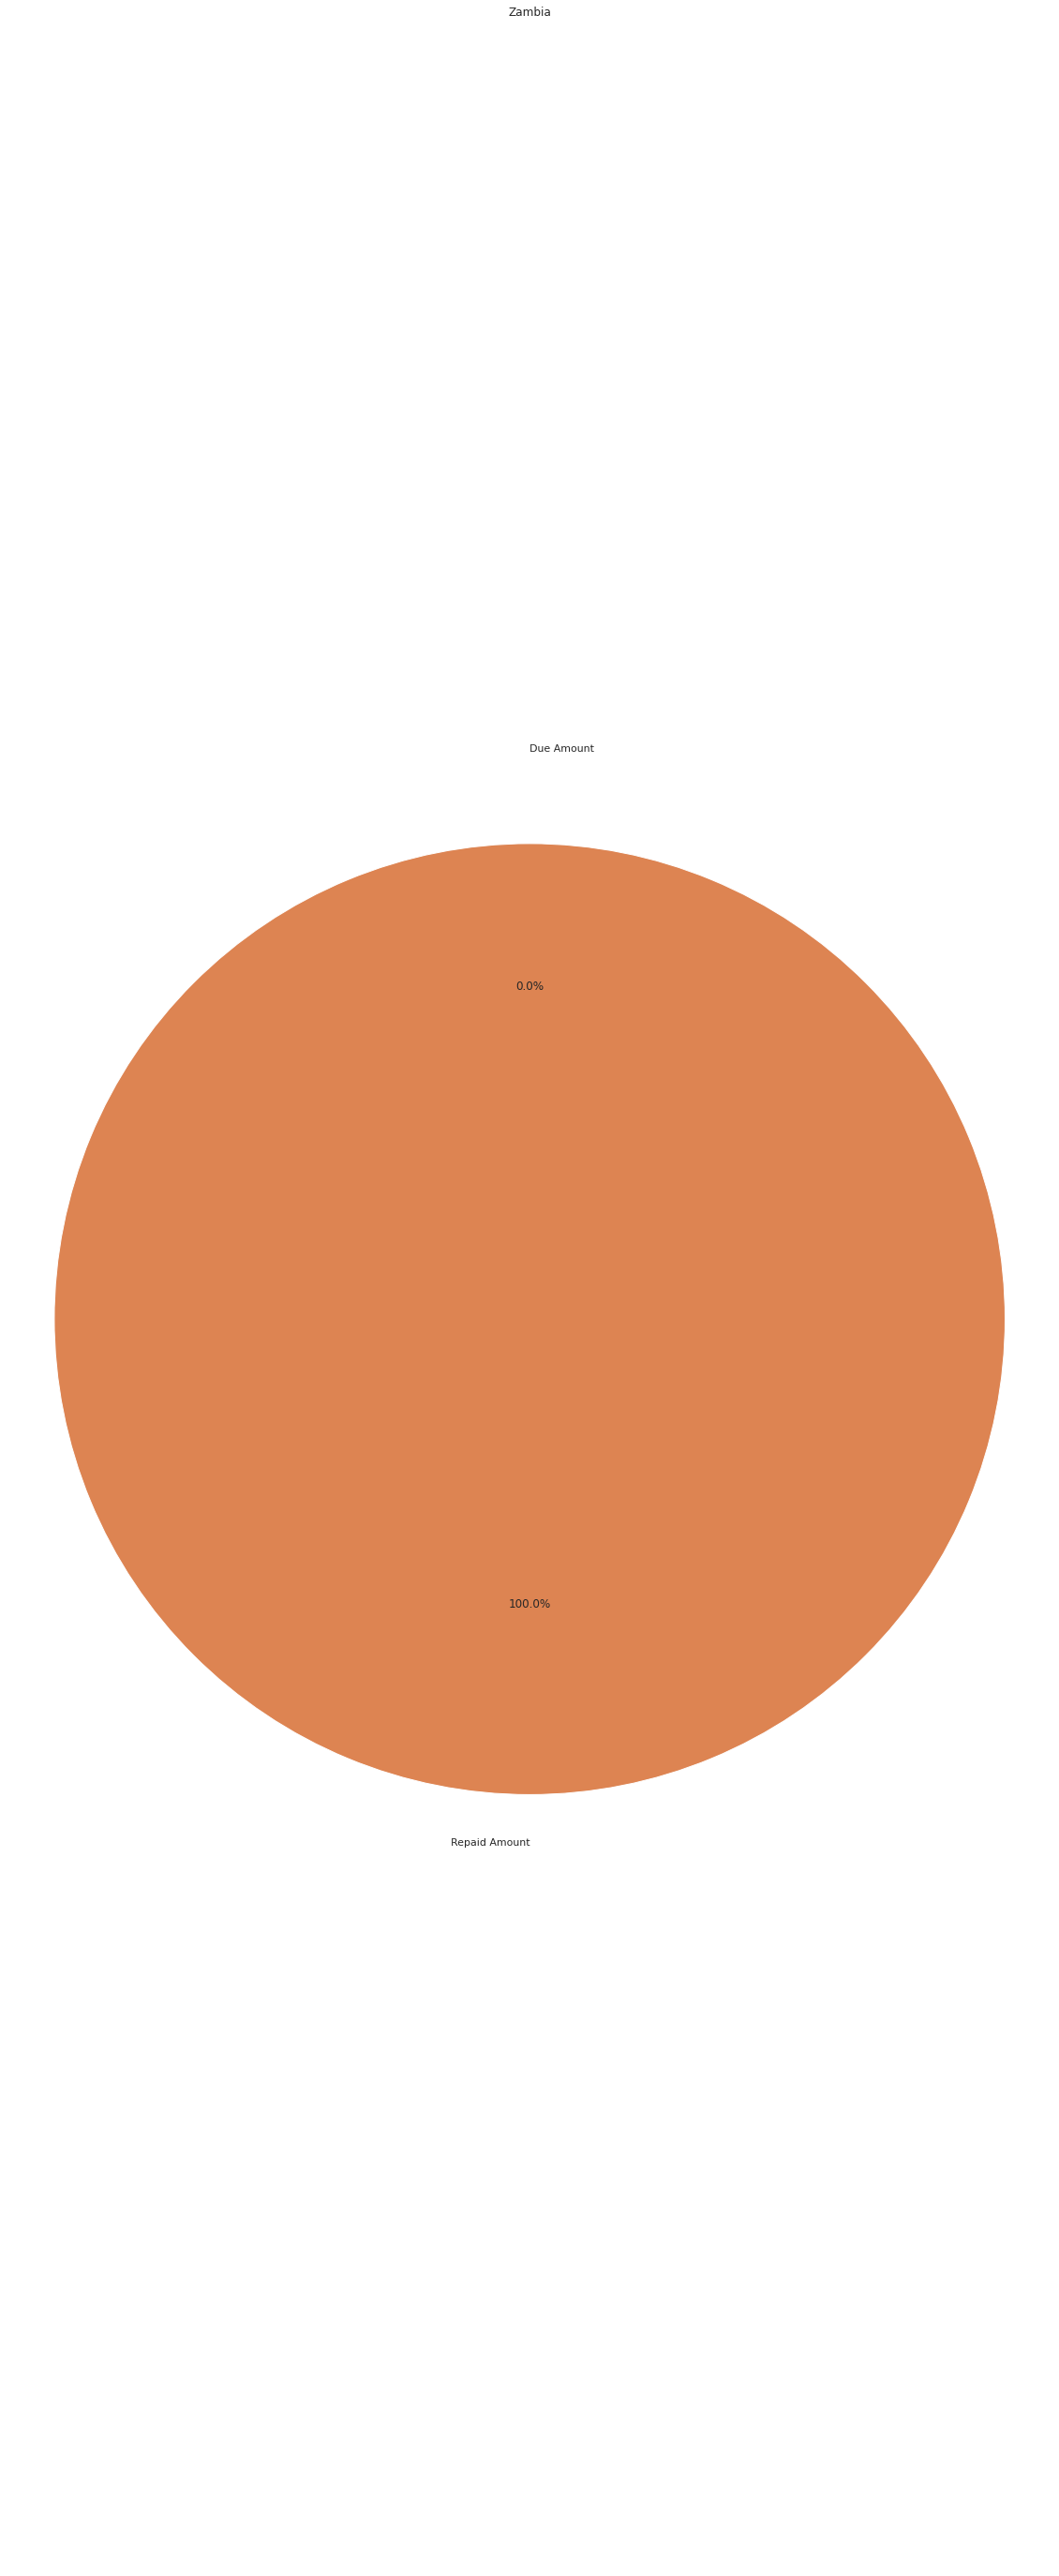

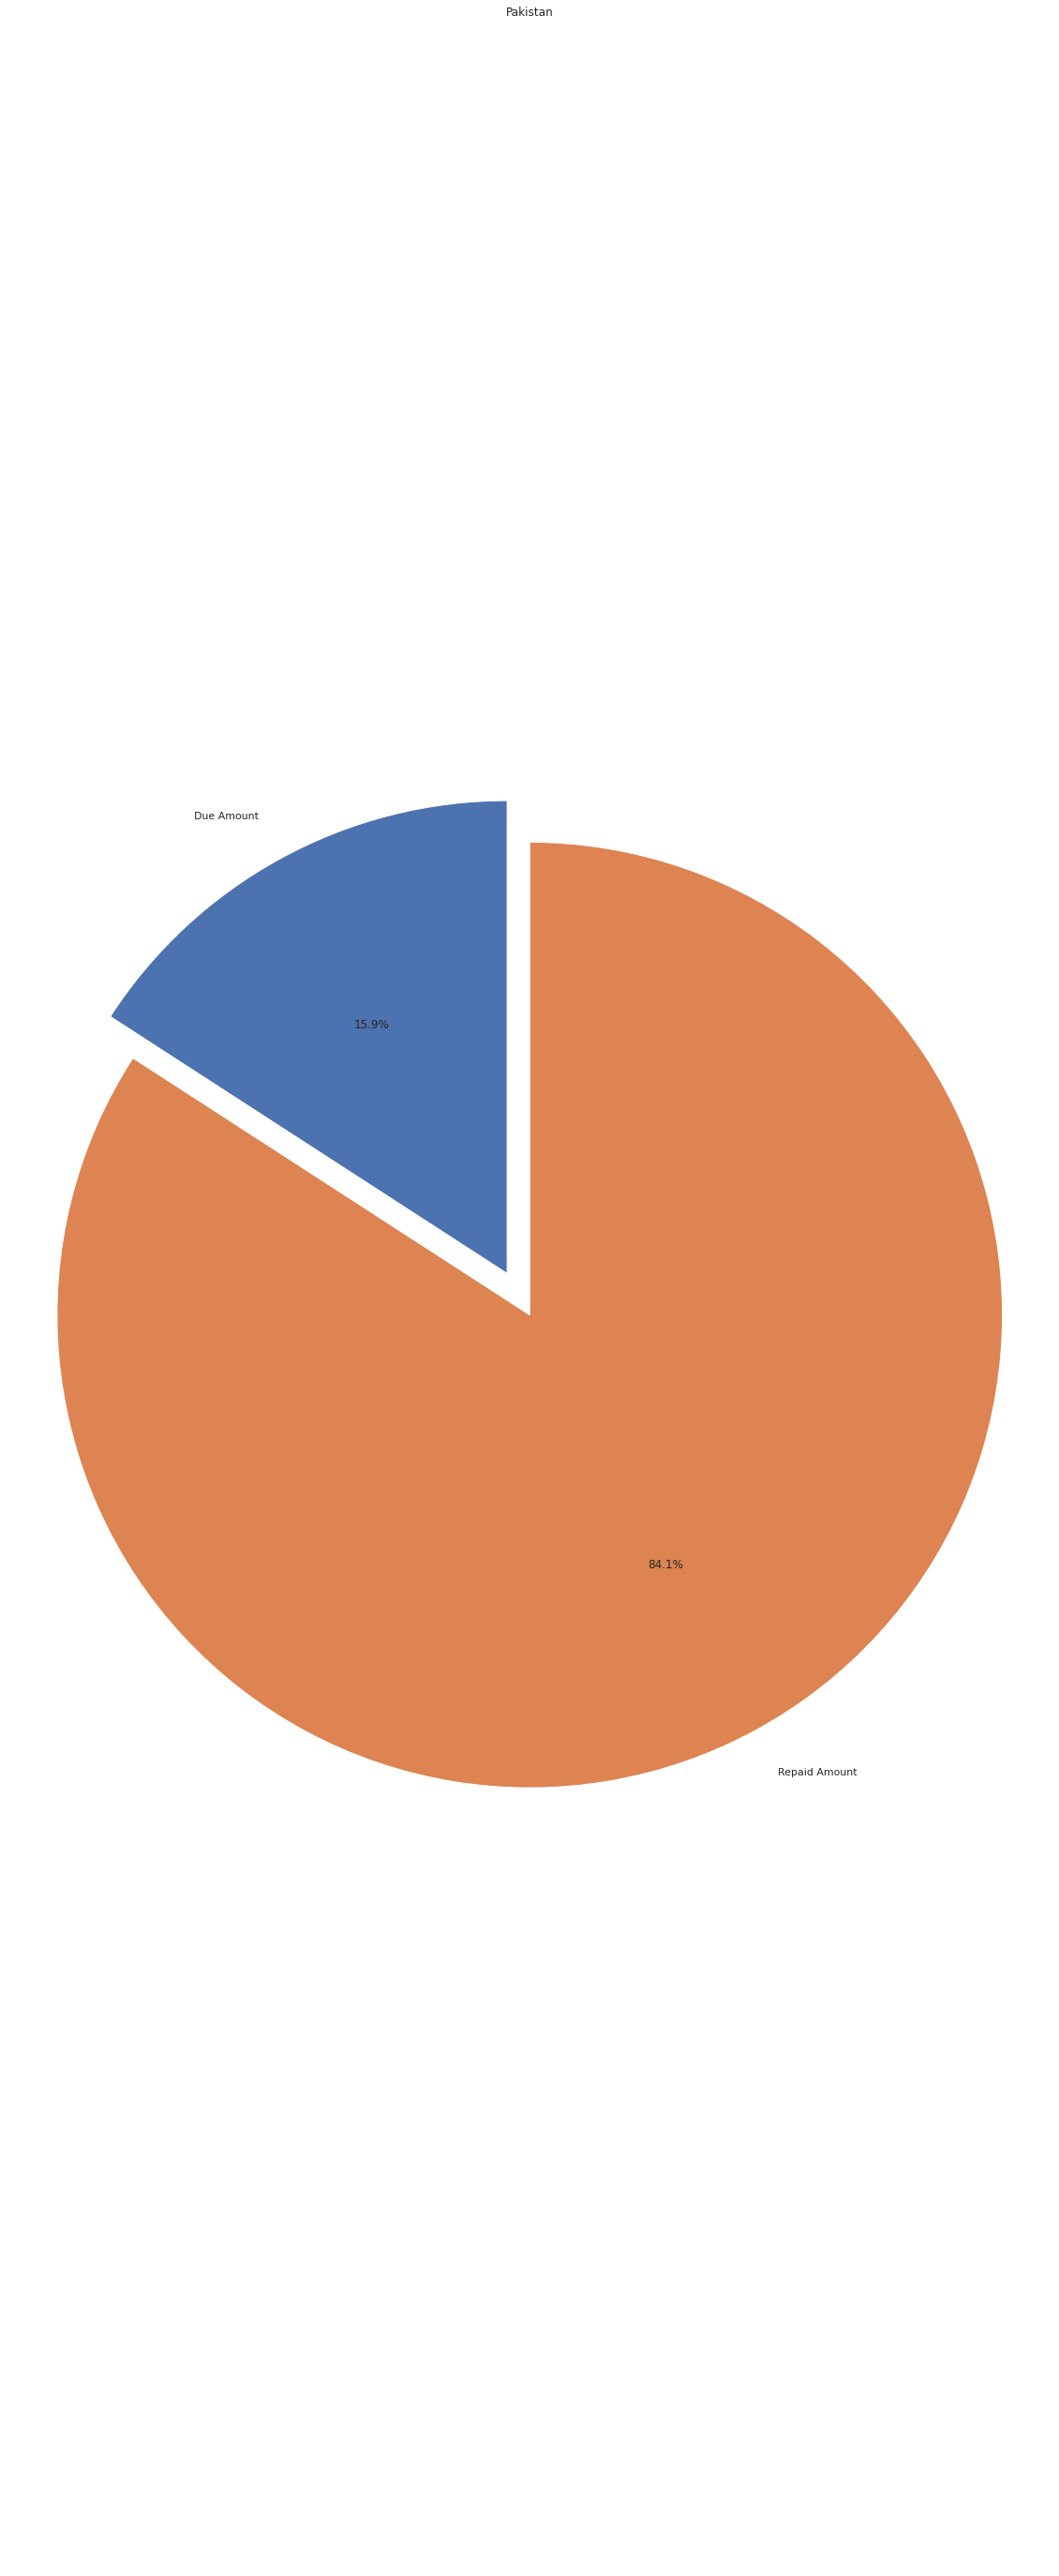

In [ ]:
arr1=['India','China','Japan','France','Italy','Brazil','Korea, Republic of','Russian Federation','Spain','Australia','Myanmar','Congo, Republic of','Mozambique','Uganda','Haiti','Ethiopia','Tanzania','Uzbekistan','Zambia','Pakistan']
arr2=[]
arr3=[]
for a in arr1:
  arr2.append((bd.loc[bd['Country']==a])['Due to IBRD'].sum())
  arr3.append((bd.loc[bd['Country']==a])['Repaid to IBRD'].sum())
for i in range(20):
  arr2[i]=int(arr2[i])
  arr3[i]=int(arr3[i])
  if(arr2[i]>0):
    arr2[i]=(arr2[i]*100)/(arr2[i]+arr3[i])
  if(arr3[i]>0):
    arr3[i]=(arr3[i]*100)/(arr2[i]+arr3[i])
  fig1, ax1 = plt.subplots()
  ax1.pie([arr2[i],arr3[i]], explode=[0.1,0], labels=['Due Amount','Repaid Amount'],radius=1, autopct='%1.1f%%',shadow=False, startangle=90)
  ax1.axis('equal')
  ax1.set_title(arr1[i])
  plt.show()